<a href="https://colab.research.google.com/github/Favourwendee/Fraud-Detection-and-Prevention-in-a-Banking-Sector/blob/main/Final_Bank_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fraud Detection Using Machine Learning

In [ ]:
%%writefile requirements.txt
altair==5.0.1
attrs==23.1.0
beautifulsoup4==4.12.2
blinker==1.6.2
cachetools==5.3.1
certifi==2023.7.22
charset-normalizer==3.2.0
click==8.1.6
colorama==0.4.6
contourpy==1.1.0
cycler==0.11.0
decorator==5.1.1
filelock==3.12.2
fonttools==4.42.0
gdown==4.7.1
gitdb==4.0.10
GitPython==3.1.32
idna==3.4
imbalanced-learn==0.11.0
importlib-metadata==6.8.0
importlib-resources==6.0.0
Jinja2==3.1.2
joblib==1.3.1
jsonschema==4.18.6
jsonschema-specifications==2023.7.1
kiwisolver==1.4.4
markdown-it-py==3.0.0
MarkupSafe==2.1.3
matplotlib==3.7.2
mdurl==0.1.2
numpy==1.25.2
packaging==23.1
pandas==2.0.3
Pillow==9.5.0
protobuf==4.23.4
pyarrow==12.0.1
pydeck==0.8.0
Pygments==2.15.1
Pympler==1.0.1
pyparsing==3.0.9
PySocks==1.7.1
python-dateutil==2.8.2
pytz==2023.3
pytz-deprecation-shim==0.1.0.post0
referencing==0.30.2
requests==2.31.0
rich==13.5.2
rpds-py==0.9.2
scikit-learn==1.3.0
scipy==1.11.1
seaborn==0.12.2
six==1.16.0
sklearn==0.0.post5
smmap==5.0.0
soupsieve==2.4.1
streamlit==1.25.0
tenacity==8.2.2
threadpoolctl==3.2.0
toml==0.10.2
toolz==0.12.0
tornado==6.3.2
tqdm==4.65.0
typing-extensions==4.7.1
tzdata==2023.3
tzlocal==4.3.1
urllib3==2.0.4
validators==0.20.0
watchdog==3.0.0
zipp==3.16.2


Overwriting requirements.txt


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import gdown
import random

# Set Matplotlib to display plots inline in the notebook
%matplotlib inline

In [ ]:
# Increase the maximum number of columns displayed in Pandas to 200
pd.set_option('display.max_columns', 200)

# Set the default style of Matplotlib plots to "ggplot"
plt.style.use('ggplot')

<h3 id="wrangling">Data Wrangling</h3>

In [ ]:
file_url = 'https://drive.google.com/uc?id=1VTVTFLJDaxwpfv1ziHuX7ppK0R2kzbd8'
output_file = 'Base.csv'

gdown.download(file_url, output_file, quiet=False)


# df = pd.read_csv(output_file)

Downloading...
From: https://drive.google.com/uc?id=1VTVTFLJDaxwpfv1ziHuX7ppK0R2kzbd8
To: /content/Base.csv
100%|██████████| 217M/217M [00:01<00:00, 164MB/s]


'Base.csv'

In [ ]:
var_output_file = 'VariantI.csv'

var_file_url = 'https://drive.google.com/uc?id=1anhsj3Vgk5h6bk9aZTH5i7ocYf0jTjRz'



gdown.download(var_file_url, var_output_file, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1anhsj3Vgk5h6bk9aZTH5i7ocYf0jTjRz
To: /content/VariantI.csv
100%|██████████| 217M/217M [00:03<00:00, 57.0MB/s]


'VariantI.csv'

In [ ]:
chunk_size = 10000  # Adjust the chunk size as per your memory capacity
desired_rows = 100000  # 10% of 1 million rows

total_rows = 0
random_rows = []

# Load and randomly sample the dataset in chunks
chunks = pd.read_csv(output_file, chunksize=chunk_size)
for chunk in chunks:
    total_rows += len(chunk)
    keep_prob = min(desired_rows / total_rows, 1.0)
    for _, row in chunk.iterrows():
        if random.random() < keep_prob:
            random_rows.append(row)

    if len(random_rows) >= desired_rows:
        break

# Convert the selected rows back to a DataFrame
df = pd.DataFrame(random_rows)

new_df = df.copy()


In [ ]:
var_chunk_size = 10000  # Adjust the chunk size as per your memory capacity
var_desired_rows = 100000  # 10% of 1 million rows

var_total_rows = 0
var_random_rows = []

# Load and randomly sample the dataset in chunks
var_chunks = pd.read_csv(var_output_file, chunksize=var_chunk_size)
for var_chunk in var_chunks:
    var_total_rows += len(var_chunk)
    var_keep_prob = min(var_desired_rows / var_total_rows, 1.0)
    for _, var_row in var_chunk.iterrows():
        if random.random() < var_keep_prob:
            var_random_rows.append(var_row)

    if len(var_random_rows) >= var_desired_rows:
        break

# Convert the selected rows back to a DataFrame
var_df = pd.DataFrame(var_random_rows)

new_var_df = var_df.copy()


Duplicate the data and extract it in smaller portions to efficiently select around 10% of the original rows.
This is because the original dataset contains 1 million instances, which is too much for the computer processor to train the moodel,it had to be reduced to 100,000 random subset of it.

<h4 id="data-cleaning">Data Cleaning</h4>'

In [ ]:
print("Base Data\n",df.isnull().sum())

Base Data
 fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
s

In [ ]:
print("Variant Data\n",var_df.isnull().sum())

Variant Data
 fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              

There are no missing values in the base and variant datset

In [ ]:
print("Base Data\n",df.duplicated().sum())

Base Data
 0


In [ ]:
print("Variant Data\n",var_df.duplicated().sum())

Variant Data
 0


There are no duplicated values in the datset

In [ ]:
# Get the number of unique data for each column
print("Base Data\n",df.nunique())
print("Variant Data\n",var_df.nunique())

Base Data
 fraud_bool                              2
income                                  9
name_email_similarity               99989
prev_address_months_count             356
current_address_months_count          395
customer_age                            9
days_since_request                  99882
intended_balcon_amount              99938
payment_type                            5
zip_count_4w                         4181
velocity_6h                         99978
velocity_24h                        99972
velocity_4w                         99904
bank_branch_count_8w                 2034
date_of_birth_distinct_emails_4w       37
employment_status                       7
credit_risk_score                     475
email_is_free                           2
housing_status                          7
phone_home_valid                        2
phone_mobile_valid                      2
bank_months_count                      32
has_other_cards                         2
proposed_credit_limit  

<h3 id="exploratory-data-analysis">Exploratory Data Analysis</h3>
    

In [ ]:
 # Display the first 100 rows
print("Base Data\n",df.head(100))

Base Data
     fraud_bool  income  name_email_similarity  prev_address_months_count  \
0            1     0.9               0.166828                         -1   
1            1     0.9               0.296286                         -1   
2            1     0.9               0.044985                         -1   
3            1     0.9               0.159511                         -1   
4            1     0.9               0.596414                         -1   
..         ...     ...                    ...                        ...   
95           1     0.6               0.473524                         -1   
96           1     0.6               0.862635                         -1   
97           1     0.3               0.880943                         -1   
98           1     0.8               0.156660                         -1   
99           1     0.9               0.710661                         -1   

    current_address_months_count  customer_age  days_since_request  \
0     

In [ ]:
print("Variant Data\n",var_df.head(100))

Variant Data
     fraud_bool  income  name_email_similarity  prev_address_months_count  \
0            0     0.6               0.252681                         -1   
1            0     0.9               0.185206                         -1   
2            0     0.1               0.505509                         -1   
3            0     0.2               0.612030                         -1   
4            0     0.4               0.592596                        319   
..         ...     ...                    ...                        ...   
95           0     0.7               0.826270                         29   
96           0     0.6               0.501584                         -1   
97           0     0.9               0.943109                         -1   
98           0     0.1               0.175801                         11   
99           0     0.5               0.533798                         26   

    current_address_months_count  customer_age  days_since_request  \
0  

In [ ]:
print("Base Data information: \n", df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   fraud_bool                        100000 non-null  int64  
 1   income                            100000 non-null  float64
 2   name_email_similarity             100000 non-null  float64
 3   prev_address_months_count         100000 non-null  int64  
 4   current_address_months_count      100000 non-null  int64  
 5   customer_age                      100000 non-null  int64  
 6   days_since_request                100000 non-null  float64
 7   intended_balcon_amount            100000 non-null  float64
 8   payment_type                      100000 non-null  object 
 9   zip_count_4w                      100000 non-null  int64  
 10  velocity_6h                       100000 non-null  float64
 11  velocity_24h                      100000 non-null  fl

In [ ]:
print("Variant Data information: \n", var_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   fraud_bool                        100000 non-null  int64  
 1   income                            100000 non-null  float64
 2   name_email_similarity             100000 non-null  float64
 3   prev_address_months_count         100000 non-null  int64  
 4   current_address_months_count      100000 non-null  int64  
 5   customer_age                      100000 non-null  int64  
 6   days_since_request                100000 non-null  float64
 7   intended_balcon_amount            100000 non-null  float64
 8   payment_type                      100000 non-null  object 
 9   zip_count_4w                      100000 non-null  int64  
 10  velocity_6h                       100000 non-null  float64
 11  velocity_24h                      100000 non-null  fl

In [ ]:
print('Base Data description: \n',df.describe().transpose())

Base Data description: 
                                      count         mean          std  \
fraud_bool                        100000.0     0.028200     0.165545   
income                            100000.0     0.617442     0.279579   
name_email_similarity             100000.0     0.483571     0.276270   
prev_address_months_count         100000.0    21.541830    47.768577   
current_address_months_count      100000.0    71.384810    78.971049   
customer_age                      100000.0    33.227700    11.247232   
days_since_request                100000.0     0.885584     5.339284   
intended_balcon_amount            100000.0     5.685165    17.223472   
zip_count_4w                      100000.0  1005.195220   670.321198   
velocity_6h                       100000.0  3670.097823  2038.277928   
velocity_24h                      100000.0  3313.674589  1195.649340   
velocity_4w                       100000.0  3393.415771   676.154852   
bank_branch_count_8w              10000

In [ ]:
print('Variant Data description: \n',var_df.describe().transpose())

Variant Data description: 
                                      count         mean          std  \
fraud_bool                        100000.0     0.010860     0.103644   
income                            100000.0     0.560429     0.290097   
name_email_similarity             100000.0     0.493917     0.288659   
prev_address_months_count         100000.0    17.109460    44.207018   
current_address_months_count      100000.0    83.731030    86.711139   
customer_age                      100000.0    32.025400    10.922955   
days_since_request                100000.0     1.047261     5.402432   
intended_balcon_amount            100000.0     8.748692    20.238920   
zip_count_4w                      100000.0  1570.781090  1000.386161   
velocity_6h                       100000.0  5657.921730  3018.484515   
velocity_24h                      100000.0  4767.736271  1483.798497   
velocity_4w                       100000.0  4857.722731   921.752027   
bank_branch_count_8w              10

In [ ]:
 # Display the statistical information of the dataset
print("Summary of statistical information: \n", df.describe(include=["object", "bool"]).transpose())

Summary of statistical information: 
                     count unique       top   freq
payment_type       100000      5        AB  41866
employment_status  100000      7        CA  77327
housing_status     100000      7        BC  38488
source             100000      2  INTERNET  99589
device_os          100000      5     linux  34367


In [ ]:
print('Summary of Varaiant Statistical Information: \n',var_df.describe(include=["object", "bool"]).transpose())

Summary of Varaiant Statistical Information: 
                     count unique       top   freq
payment_type       100000      5        AB  36759
employment_status  100000      7        CA  74051
housing_status     100000      7        BC  38077
source             100000      2  INTERNET  99338
device_os          100000      5     other  35081


In the "payment_type" category, there is a reduction in the count of category "AB" in the Variant dataset compared to the Base dataset (36,759 vs. 41,866).

For the "device_os" category, the Variant dataset has a decrease in the count of "linux" and an increase in the count of "other" compared to the Base dataset (35,081 vs. 34,367).

However, the other categories like "employment_status," "housing_status," and "source" show relatively consistent counts between the Base and Variant datasets.

The "source" category seems to have a high concentration of the "INTERNET" source, with over 99,000 occurrences in both datasets. This suggests that the "INTERNET" source is dominant and consistent across both datasets.

The change in the "device_os" category, where the count of "linux" decreased and "other" increased, might indicate a shift in the types of device operating systems being used between the Base and Variant datasets.

The "housing_status" and "employment_status" categories show similar counts across both datasets, with small differences that don't seem to indicate significant shifts.


<h5 id=""> Number of Transactions by Fraud Status</h5>

In [ ]:
# Create a new DataFrame showing the count of unique values in the 'fraud_bool' column
fraud_vals = pd.DataFrame(df['fraud_bool'].value_counts())
var_fraud_vals = pd.DataFrame(var_df['fraud_bool'].value_counts())

In [ ]:
print('Base Fraud Values: \n',fraud_vals)
print('Variant Fraud Value: \n',var_fraud_vals)

Base Fraud Values: 
    fraud_bool
0       97180
1        2820
Variant Fraud Value: 
    fraud_bool
0       98914
1        1086


In [ ]:
# Reset the index of the DataFrame and rename the columns
fraud_vals.reset_index(inplace=True)
fraud_vals.rename(columns={'index': 'fraud_bool', 'fraud_bool': 'count'}, inplace=True)
print('Base Fraud Values: \n',fraud_vals)

# Reset the index of the DataFrame and rename the columns
var_fraud_vals.reset_index(inplace=True)
var_fraud_vals.rename(columns={'index': 'fraud_bool', 'fraud_bool': 'count'}, inplace=True)
print('Variant Fraud Value: \n',var_fraud_vals)

Base Fraud Values: 
    fraud_bool  count
0           0  97180
1           1   2820
Variant Fraud Value: 
    fraud_bool  count
0           0  98914
1           1   1086


The "Base" dataset initially had more cases of fraud (2,820) than the "Variant" dataset (1,086).

However, the "Variant" dataset shows a decrease in the number of fraudulent cases while the number of non-fraudulent cases increases.

This suggests that the variant might have undergone some changes, possibly through an intervention to reduce fraud instances.        

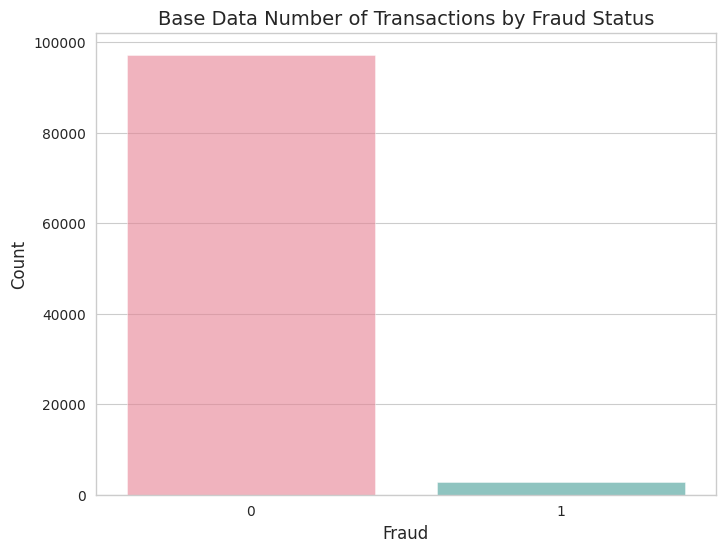

In [ ]:
# Define custom color palette
my_palette = sns.color_palette("husl", 2)
sns.set_style("whitegrid")

# Set up plot
plt.figure(figsize=(8, 6))

# Create bar plot
sns.barplot(data=fraud_vals, x="fraud_bool", y="count", palette=my_palette, alpha=.6)

# Customize labels and legend
plt.xlabel("Fraud", fontsize=12)  # Increased fontsize to 12
plt.ylabel("Count", fontsize=12)  # Increased fontsize to 12
plt.xticks(fontsize=10)  # Increased fontsize to 10
plt.yticks(fontsize=10)  # Increased fontsize to 10
plt.title("Base Data Number of Transactions by Fraud Status", fontsize=14)  # Increased fontsize to 14

# Save the plot as an image (e.g., in PNG format)
plt.savefig("base_fraud_plot.png", bbox_inches='tight')

# Display plot
plt.show()


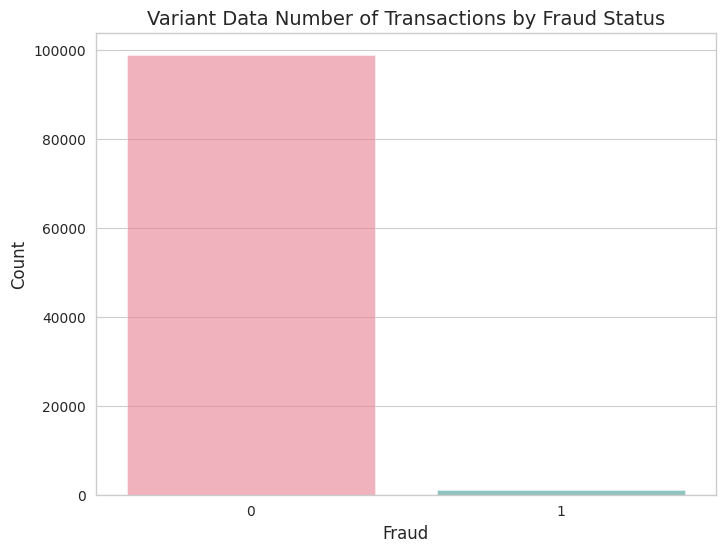

In [ ]:
 # Define custom color palette
my_palette = sns.color_palette("husl", 2)
sns.set_style("whitegrid")

# Set up plot
plt.figure(figsize=(8, 6))

# Create bar plot
sns.barplot(data=var_fraud_vals, x="fraud_bool", y="count", palette=my_palette, alpha=.6)

# Customize labels and legend
plt.xlabel("Fraud", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Variant Data Number of Transactions by Fraud Status", fontsize=14)

plt.savefig("variant_fraud_plot.png", bbox_inches='tight')

# Display plot
plt.show()

The plot depicting the binary target feature displays a significant imbalance in distribution, with an exceedingly low occurrence of the positive class for both the base and variant dataset.

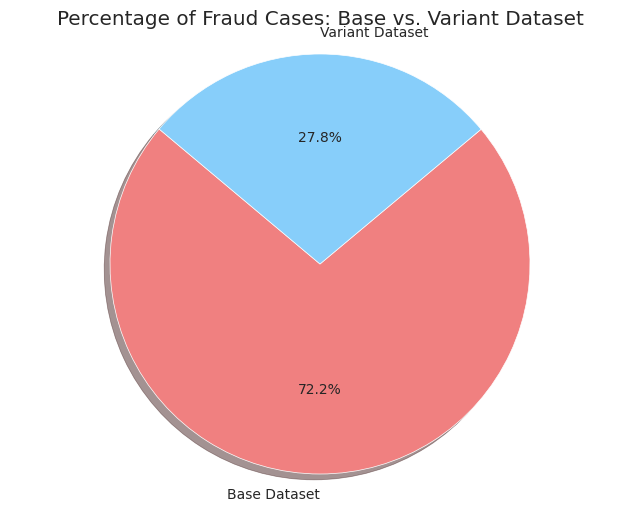

In [ ]:
import matplotlib.pyplot as plt

# Fraud counts for base dataset
base_fraud_count = fraud_vals.loc[fraud_vals['fraud_bool'] == 1, 'count'].values[0]

# Fraud counts for variant dataset
variant_fraud_count = var_fraud_vals.loc[var_fraud_vals['fraud_bool'] == 1, 'count'].values[0]

# Combine the fraud counts for both datasets
total_fraud_counts = [base_fraud_count, variant_fraud_count]
total_labels = ['Base Dataset', 'Variant Dataset']

# Create a single pie chart with distinct colors
colors = ['lightcoral', 'lightskyblue']

# Create a pie chart to show the percentage of fraud cases
plt.figure(figsize=(8, 6))
plt.pie(total_fraud_counts, labels=total_labels, autopct='%1.1f%%', shadow=True, startangle=140, colors=colors)
plt.title('Percentage of Fraud Cases: Base vs. Variant Dataset')

plt.savefig("percentage_of_fraud_cases.png", bbox_inches='tight')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

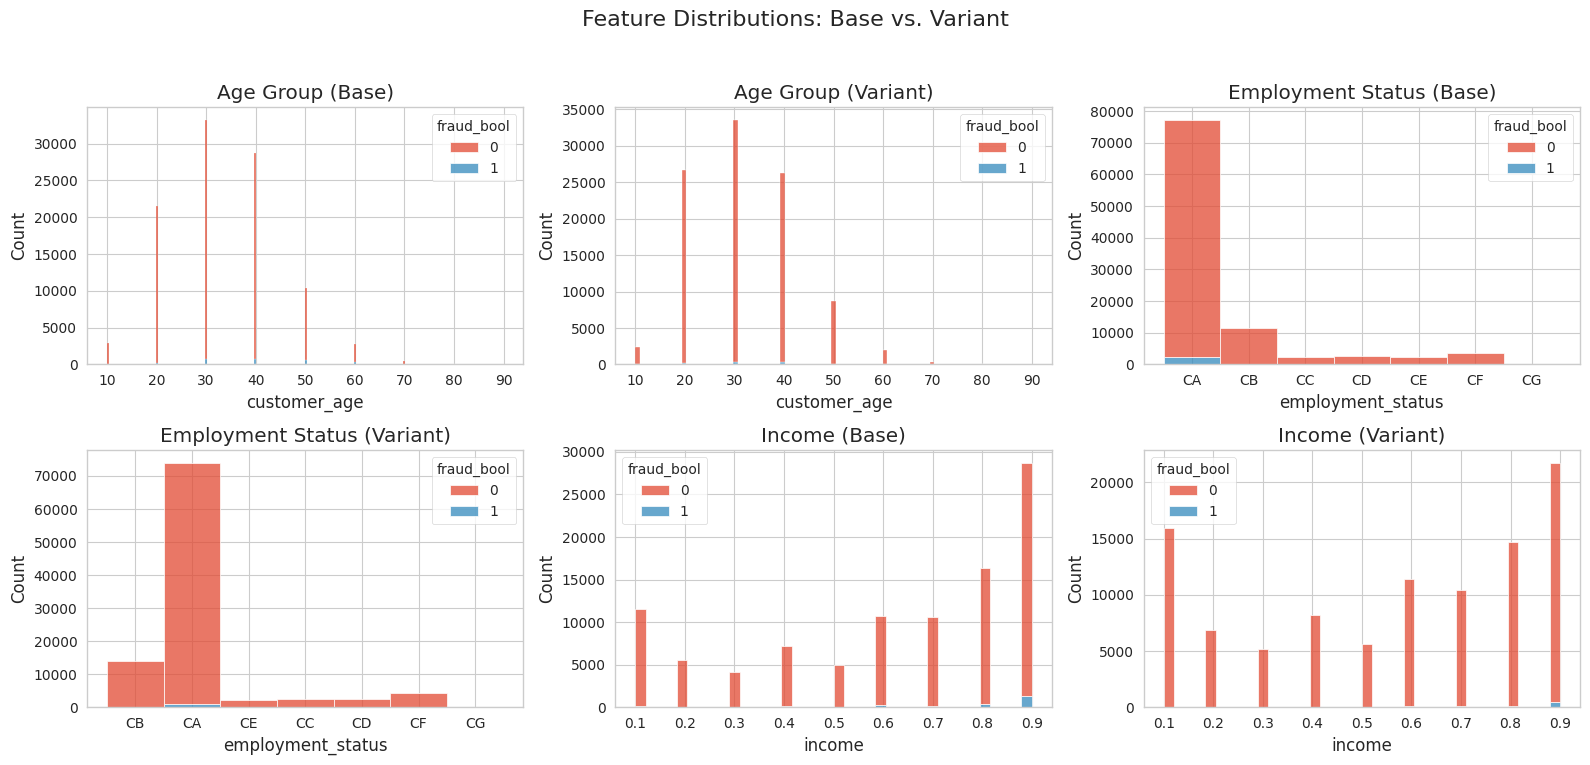

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the relevant columns from the base and variant datasets
base_data = df[['fraud_bool', 'customer_age', 'employment_status', 'income']]
variant_data = var_df[['fraud_bool', 'customer_age', 'employment_status', 'income']]

# Set up subplots for multiple histograms
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
fig.suptitle('Feature Distributions: Base vs. Variant', fontsize=16)

# Feature: Age Group
sns.histplot(data=base_data, x='customer_age', hue='fraud_bool', multiple='stack', ax=axes[0, 0])
axes[0, 0].set_title('Age Group (Base)')

sns.histplot(data=variant_data, x='customer_age', hue='fraud_bool', multiple='stack', ax=axes[0, 1])
axes[0, 1].set_title('Age Group (Variant)')

# Feature: Employment Status
sns.histplot(data=base_data, x='employment_status', hue='fraud_bool', multiple='stack', ax=axes[0, 2])
axes[0, 2].set_title('Employment Status (Base)')

sns.histplot(data=variant_data, x='employment_status', hue='fraud_bool', multiple='stack', ax=axes[1, 0])
axes[1, 0].set_title('Employment Status (Variant)')

# Feature: Percentage Income
sns.histplot(data=base_data, x='income', hue='fraud_bool', multiple='stack', ax=axes[1, 1])
axes[1, 1].set_title('Income (Base)')

sns.histplot(data=variant_data, x='income', hue='fraud_bool', multiple='stack', ax=axes[1, 2])
axes[1, 2].set_title('Income (Variant)')

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig("feature_distribution.png", bbox_inches='tight')

# Show the histograms
plt.show()


<h3 id="feature-engineering">Feature Engineering</h3>

In [ ]:
# Initialize an empty DataFrame to hold the percentage of missing values for each feature
missing_vals = pd.DataFrame()

# List of features to check for missing values
missing_features = ['prev_address_months_count', 'current_address_months_count', 'intended_balcon_amount', 'bank_months_count', 'session_length_in_minutes', 'device_distinct_emails_8w']

# For each feature, replace -1 values with NaN, calculate the percentage of missing values, and add to the missing_vals DataFrame
for feature in missing_features:
    df.loc[df[feature] < 0, feature] = np.nan # df[feature] = df[feature].replace(-1, np.nan)
    missing_vals_col = df.groupby('fraud_bool')[feature].apply(lambda x: round(x.isna().sum()/len(x) * 100, 2))
    missing_vals[feature] = missing_vals_col

print('Missing Values in Base Dataset: \n',missing_vals)

Missing Values in Base Dataset: 
             prev_address_months_count  current_address_months_count  \
fraud_bool                                                            
0                               64.89                          0.86   
1                               90.32                          0.21   

            intended_balcon_amount  bank_months_count  \
fraud_bool                                              
0                            81.22              28.35   
1                            89.79              39.26   

            session_length_in_minutes  device_distinct_emails_8w  
fraud_bool                                                        
0                                0.21                       0.02  
1                                0.11                       0.00  


In [ ]:
# Initialize an empty DataFrame to hold the percentage of missing values for each feature
var_missing_vals = pd.DataFrame()

# List of features to check for missing values
var_missing_features = ['prev_address_months_count', 'current_address_months_count', 'intended_balcon_amount', 'bank_months_count', 'session_length_in_minutes', 'device_distinct_emails_8w']

# For each feature, replace -1 values with NaN, calculate the percentage of missing values, and add to the missing_vals DataFrame
for feature in var_missing_features:
    var_df.loc[var_df[feature] < 0, feature] = np.nan # df[feature] = df[feature].replace(-1, np.nan)
    var_missing_vals_col = var_df.groupby('fraud_bool')[feature].apply(lambda x: round(x.isna().sum()/len(x) * 100, 2))
    var_missing_vals[feature] = var_missing_vals_col

print('Missing Values in Variant Dataset: \n',var_missing_vals)

Missing Values in Variant Dataset: 
             prev_address_months_count  current_address_months_count  \
fraud_bool                                                            
0                               70.08                          0.43   
1                               90.88                          0.09   

            intended_balcon_amount  bank_months_count  \
fraud_bool                                              
0                            73.75              25.24   
1                            87.57              38.31   

            session_length_in_minutes  device_distinct_emails_8w  
fraud_bool                                                        
0                                0.19                       0.04  
1                                0.18                       0.00  


In [ ]:
# Reshape the missing_vals DataFrame from wide to long format
missing_vals = pd.DataFrame(missing_vals.T.stack())

# Reset the index and rename the columns
missing_vals.reset_index(inplace=True)
missing_vals.rename(columns={'level_0': 'feature', 0: 'missing_vals'}, inplace=True)

# Display the modified DataFrame
print("Base Data Missing Values: \n", missing_vals)

Base Data Missing Values: 
                          feature  fraud_bool  missing_vals
0      prev_address_months_count           0         64.89
1      prev_address_months_count           1         90.32
2   current_address_months_count           0          0.86
3   current_address_months_count           1          0.21
4         intended_balcon_amount           0         81.22
5         intended_balcon_amount           1         89.79
6              bank_months_count           0         28.35
7              bank_months_count           1         39.26
8      session_length_in_minutes           0          0.21
9      session_length_in_minutes           1          0.11
10     device_distinct_emails_8w           0          0.02
11     device_distinct_emails_8w           1          0.00


In [ ]:
# Reshape the missing_vals DataFrame from wide to long format
var_missing_vals = pd.DataFrame(var_missing_vals.T.stack())

# Reset the index and rename the columns
var_missing_vals.reset_index(inplace=True)
var_missing_vals.rename(columns={'level_0': 'feature', 0: 'missing_vals'}, inplace=True)

# Display the modified DataFrame
print("Variant Data Missing Values: \n", var_missing_vals)

Variant Data Missing Values: 
                          feature  fraud_bool  missing_vals
0      prev_address_months_count           0         70.08
1      prev_address_months_count           1         90.88
2   current_address_months_count           0          0.43
3   current_address_months_count           1          0.09
4         intended_balcon_amount           0         73.75
5         intended_balcon_amount           1         87.57
6              bank_months_count           0         25.24
7              bank_months_count           1         38.31
8      session_length_in_minutes           0          0.19
9      session_length_in_minutes           1          0.18
10     device_distinct_emails_8w           0          0.04
11     device_distinct_emails_8w           1          0.00


This code looks at the dataset, marks them as missing if they have a special value of -1, and then calculates the percentage of missing information for different categories. This helps us understand how much information is missing and if it's related to whether something is labeled as "fraud" or not

Missing Value Analysis:

For "prev_address_months_count," "intended_balcon_amount," and "bank_months_count," both the "Base" and "Variant" datasets exhibit higher percentages of missing values in the "1" (fraudulent) category compared to the "0" (non-fraudulent) category. This might suggest that missing values in these features are more common when associated with fraudulent cases.

For "current_address_months_count" and "session_length_in_minutes," the percentage of missing values is generally low across both categories in both datasets.

The "device_distinct_emails_8w" feature has minimal missing values in both categories for both datasets.


Comparison Insights:

Both datasets seem to have a similar pattern of missing values across most features and categories, with slightly higher percentages of missing values in the "1" (fraudulent) category.

The "prev_address_months_count" and "intended_balcon_amount" features show notable increases in missing values for the "1" (fraudulent) category compared to the "0" (non-fraudulent) category in both datasets. This suggests that these features might have a connection with fraudulent cases.

In some cases, such as "bank_months_count" and "device_distinct_emails_8w," there's a relatively consistent distribution of missing values between the two categories, indicating a potentially weaker association with fraud status.

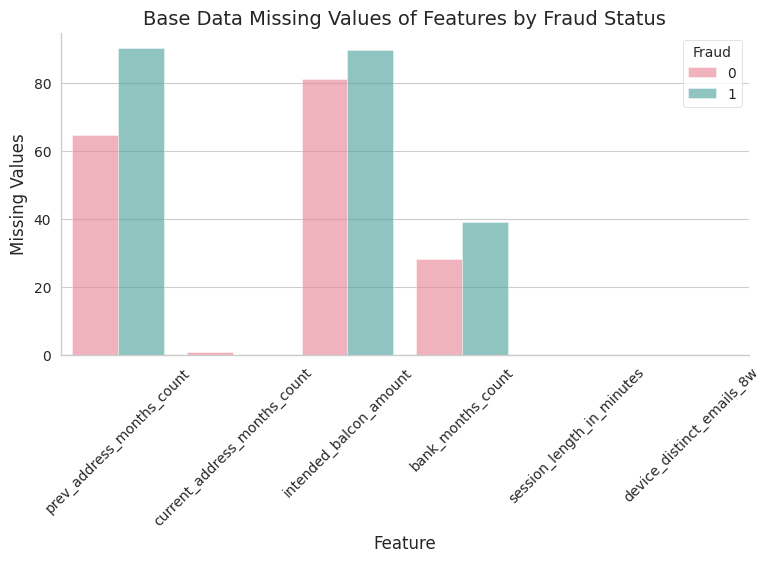

In [ ]:
# Set up plot
# plt.figure(figsize=(12, 8))  # Adjusted the figure size for better visibility

# Create bar plot
sns.catplot(
    data=missing_vals,
    kind="bar",
    x="feature",
    y="missing_vals",
    hue="fraud_bool",
    palette=my_palette,
    alpha=0.6,
    height=4,
    aspect=2,
    legend=False
)

# Customize labels and legend
plt.xlabel("Feature", fontsize=12)  # Increased fontsize to 12
plt.ylabel("Missing Values", fontsize=12)  # Increased fontsize to 12
plt.xticks(rotation=45, fontsize=10)  # Increased fontsize to 10 and rotated x-axis labels
plt.yticks(fontsize=10)  # Increased fontsize to 10
plt.title("Base Data Missing Values of Features by Fraud Status", fontsize=14)  # Increased fontsize to 14
plt.legend(title="Fraud", fontsize=10)  # Increased fontsize of the legend title to 10

plt.savefig("base_missing_values_plot.png", bbox_inches='tight')

# Display plot
plt.show()


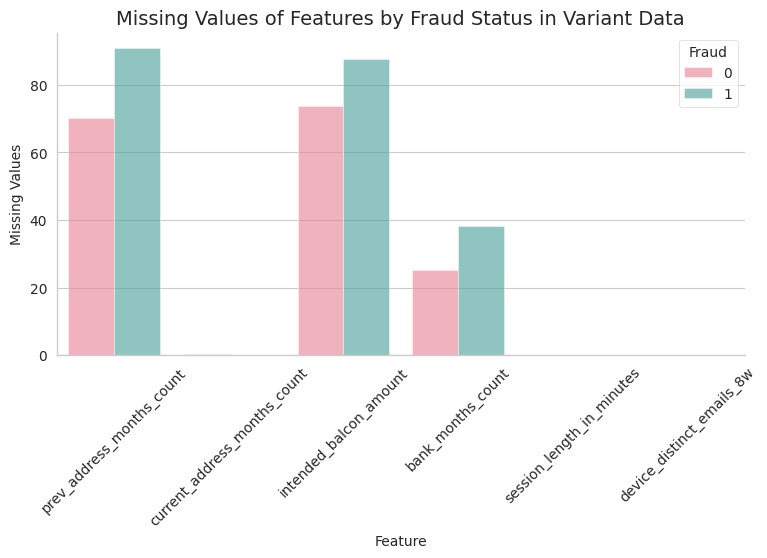

In [ ]:
# Set up plot
# plt.figure(figsize=(12, 8))

# Create bar plot
sns.catplot(data=var_missing_vals, kind="bar", x="feature", y="missing_vals", hue="fraud_bool", palette=my_palette, alpha=.6, height=4, aspect=2, legend=False)

# Customize labels and legend
plt.xlabel("Feature", fontsize=10)
plt.ylabel("Missing Values", fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Missing Values of Features by Fraud Status in Variant Data", fontsize=14)
plt.legend(title="Fraud", fontsize=10)

plt.savefig("variant_missing_plot.png", bbox_inches='tight')

# Display plot
plt.show()

Examining features like prev_address_months_count, intended_balcon_amount, and bank_months_count reveals a notable presence of missing values within their original distribution. Despite the absence of these values, these features still retain valuable information and demonstrate a relationship with the target feature.

It's essential to emphasize that the missing values in these features are effectively denoted by negative values, rather than being converted into explicit null values during the data preparation process. The potential consequences of such a conversion have not been assessed, as it could potentially lead to a loss of information, even though the negative values themselves lack specific significance

<h4 id="distribution-and-outliers-of-features-by-fraud-status">Distribution and Outliers of Features by Fraud Status</h4>

In [ ]:
numeric_features = [x for x in df.columns if df[x].nunique() >= 10]

print('Base Data description: \n',numeric_features)

var_numeric_features = [x for x in var_df.columns if var_df[x].nunique() >= 10]

print('Variant Data description: \n',var_numeric_features)

Base Data description: 
 ['name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit', 'session_length_in_minutes']
Variant Data description: 
 ['name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit', 'session_length_in_minutes']


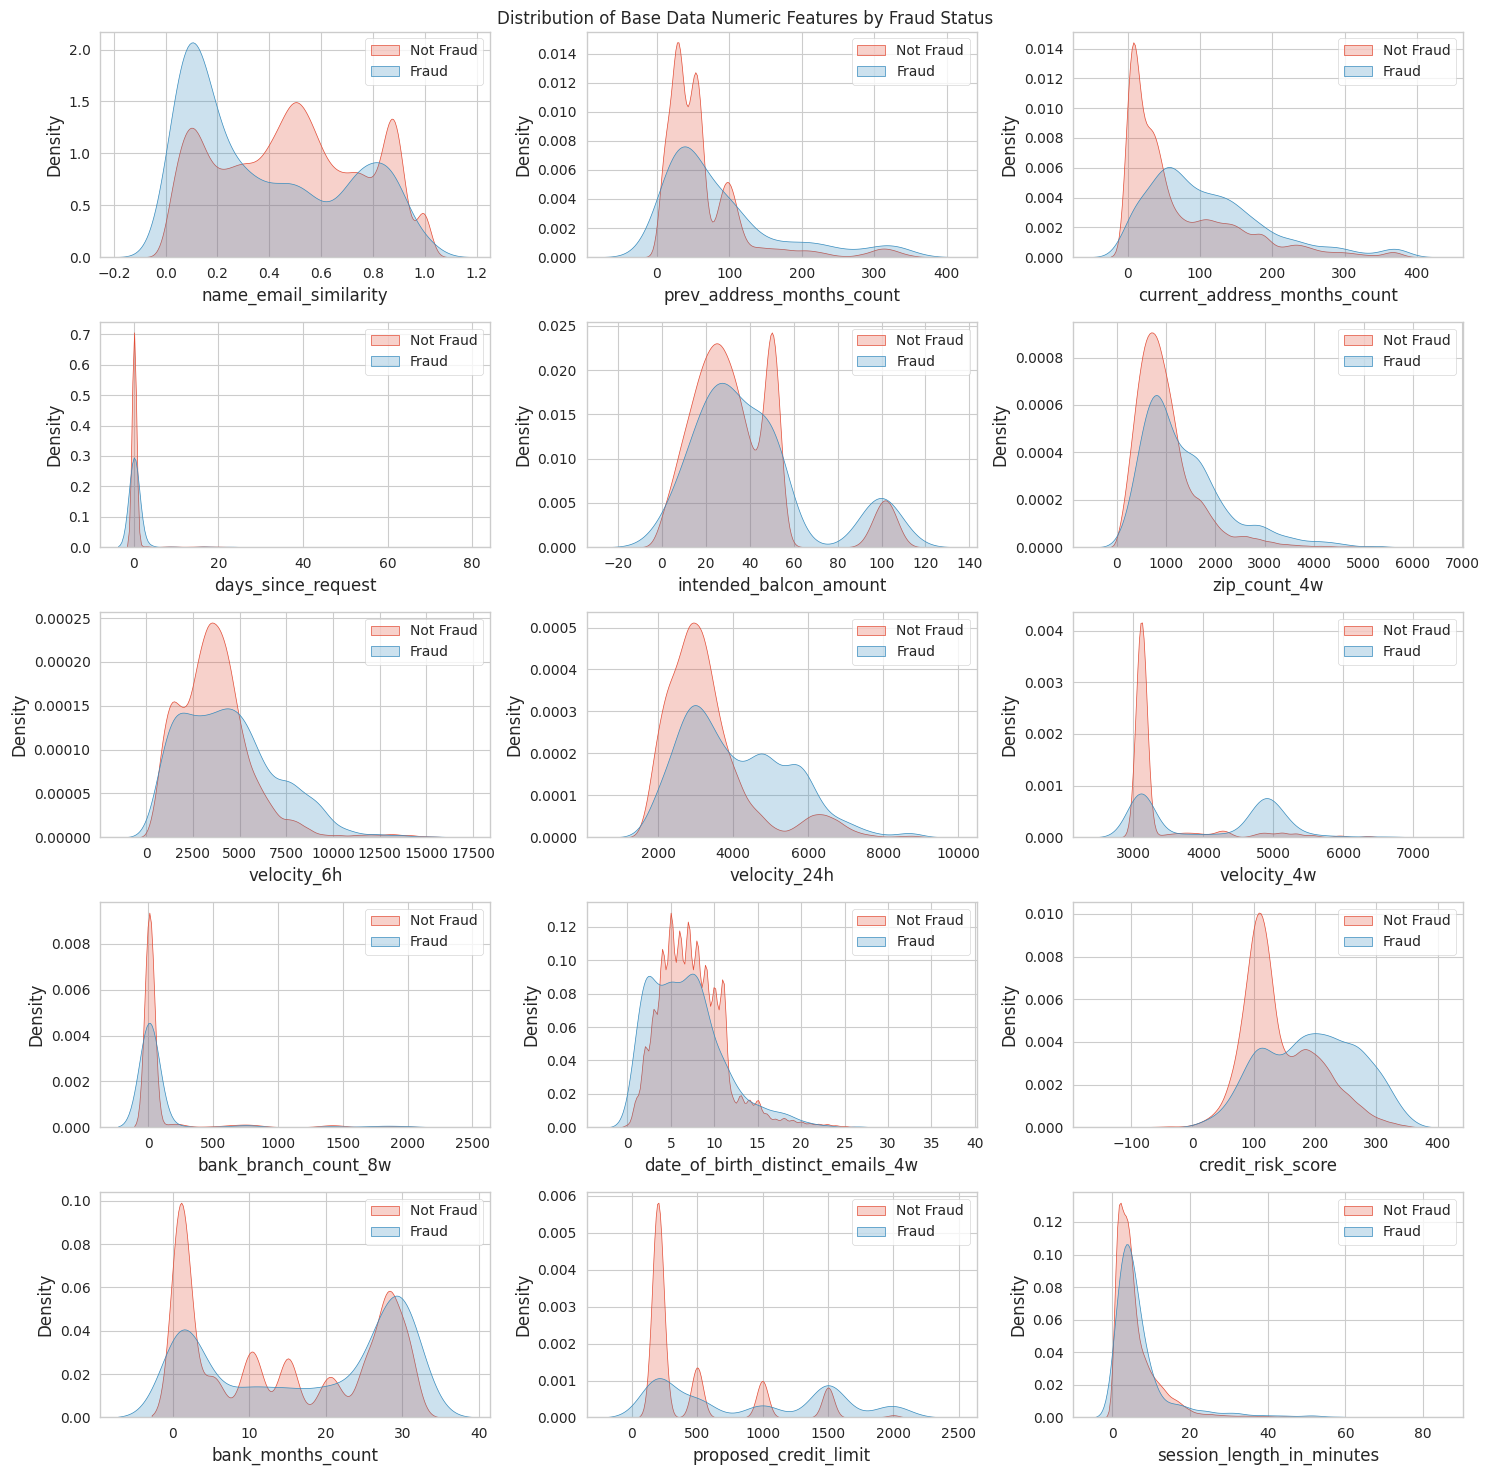

In [ ]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Add a title to the figure
fig.suptitle('Distribution of Base Data Numeric Features by Fraud Status')

# Loop through the numeric features and plot a kernel density plot for each feature
for i, feature in enumerate(numeric_features):
    ax = axes[i // 3][i % 3]
    sns.kdeplot(data=df[df['fraud_bool'] == 0][feature], fill=True, ax=ax, label='Not Fraud')
    sns.kdeplot(data=df[df['fraud_bool'] == 1][feature], fill=True, ax=ax, label='Fraud')
    ax.set_xlabel(feature)
    ax.legend()

# Adjust the layout and display the plot
plt.tight_layout()

plt.savefig("base_numeric_plot.png", bbox_inches='tight')

plt.show()

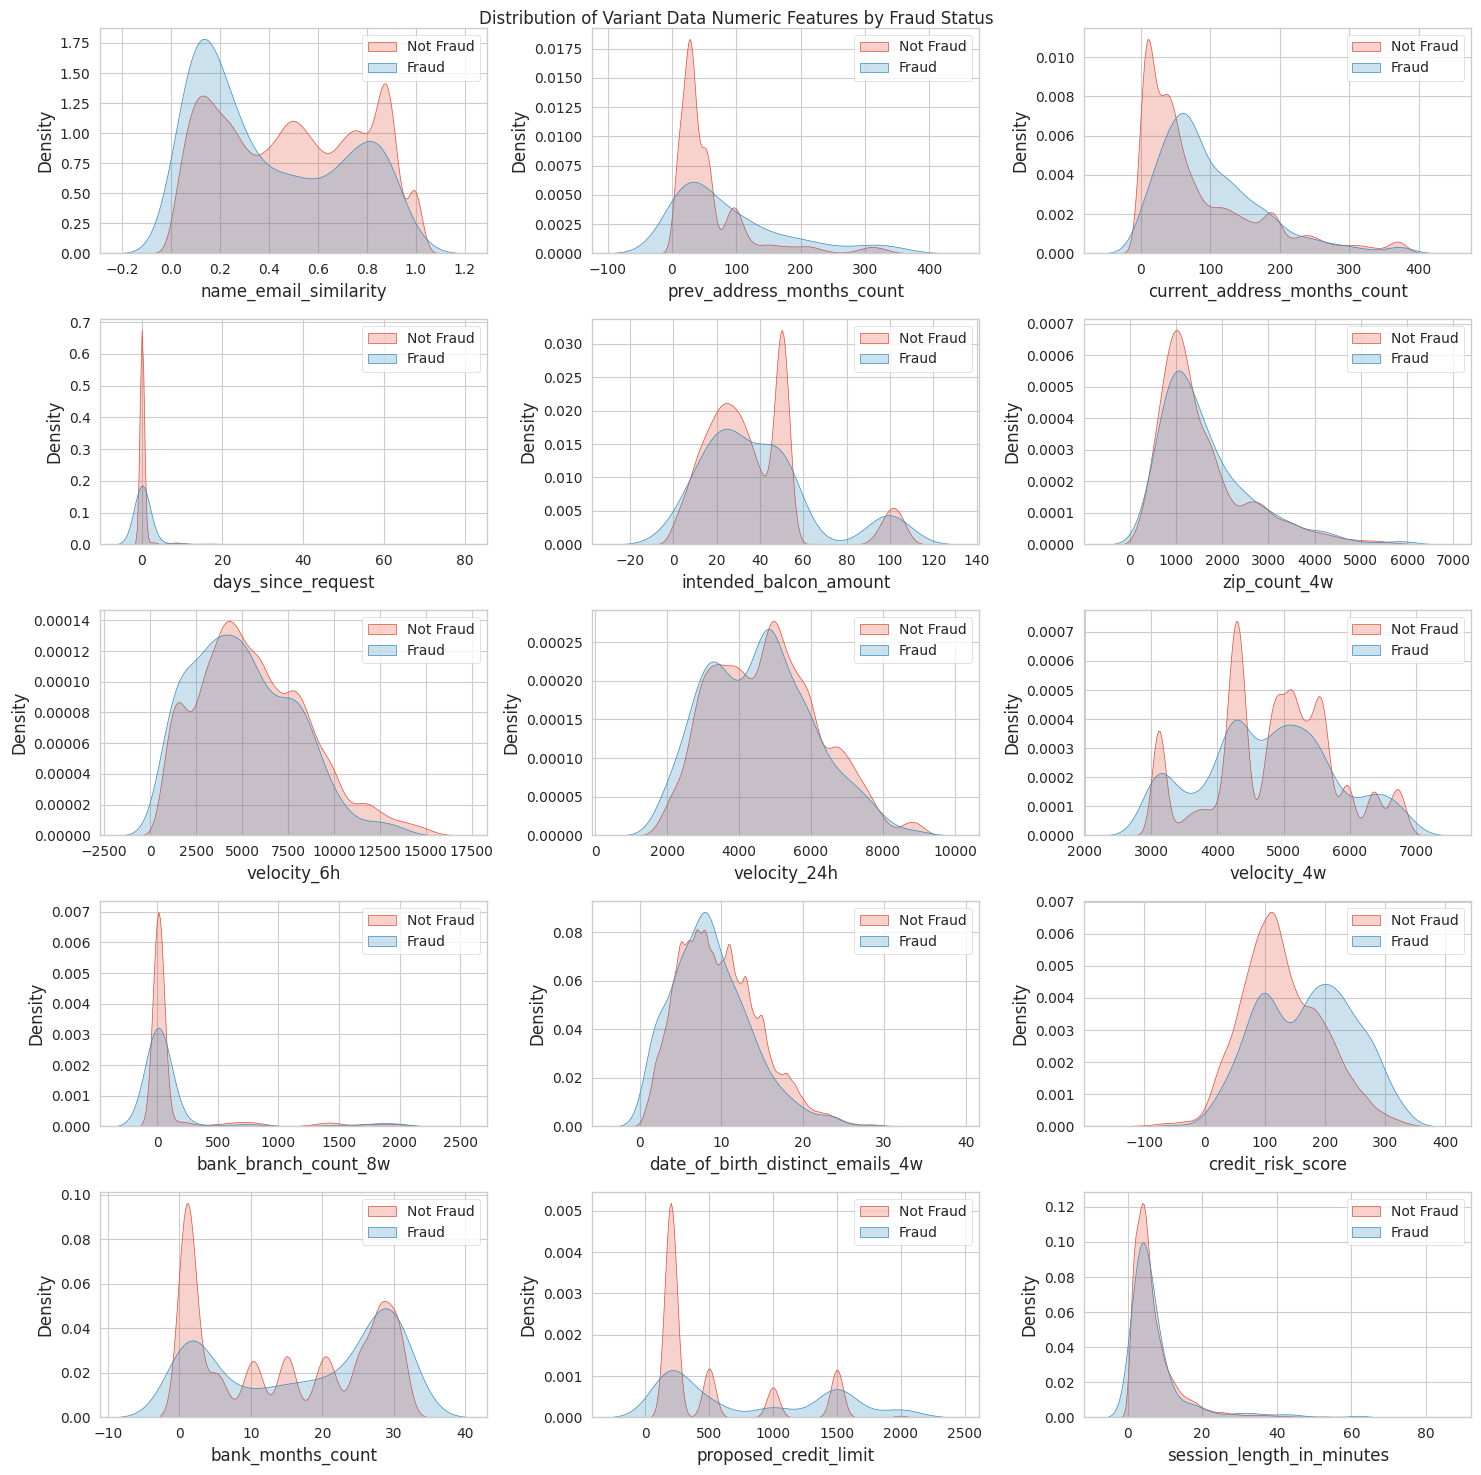

In [ ]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Add a title to the figure
fig.suptitle('Distribution of Variant Data Numeric Features by Fraud Status')

# Loop through the numeric features and plot a kernel density plot for each feature
for i, feature in enumerate(var_numeric_features):
    ax = axes[i // 3][i % 3]
    sns.kdeplot(data=var_df[var_df['fraud_bool'] == 0][feature], fill=True, ax=ax, label='Not Fraud')
    sns.kdeplot(data=var_df[var_df['fraud_bool'] == 1][feature], fill=True, ax=ax, label='Fraud')
    ax.set_xlabel(feature)
    ax.legend()

# Adjust the layout and display the plot
plt.tight_layout()

plt.savefig("variant_numeric_plot.png", bbox_inches='tight')

plt.show()

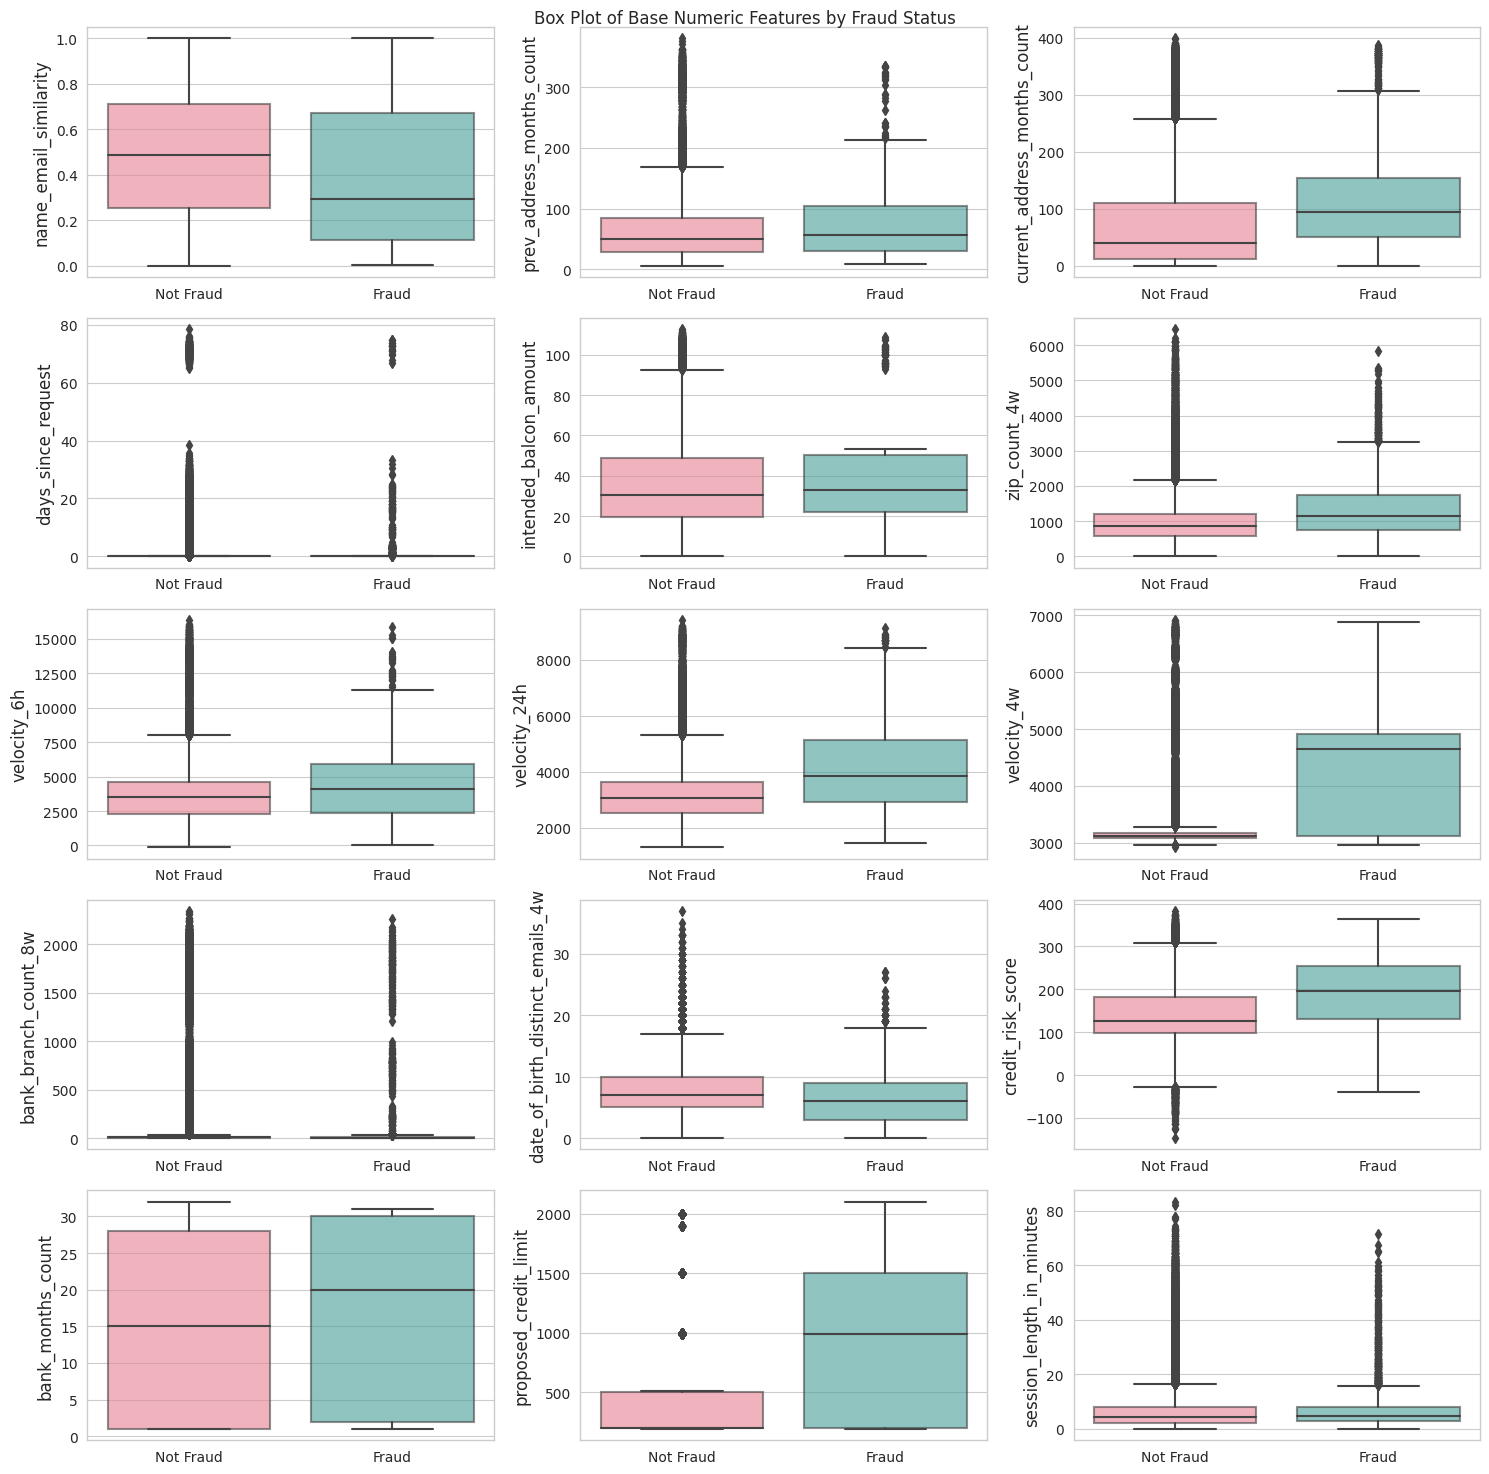

In [ ]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Add a title to the figure
fig.suptitle('Box Plot of Base Numeric Features by Fraud Status')

# Loop through the numeric features and plot a box plot for each feature
for i, feature in enumerate(numeric_features):
    ax = axes[i // 3][i % 3]
    sns.boxplot(data=df, x='fraud_bool', y=feature, ax=ax, palette=my_palette, boxprops=dict(alpha=.6))
    ax.set_xlabel('')
    ax.set_ylabel(feature)
    ax.set_xticklabels(['Not Fraud', 'Fraud'])

# Adjust the layout and display the plot
plt.tight_layout()

plt.savefig("base_numeric_box_plot.png", bbox_inches='tight')

plt.show()

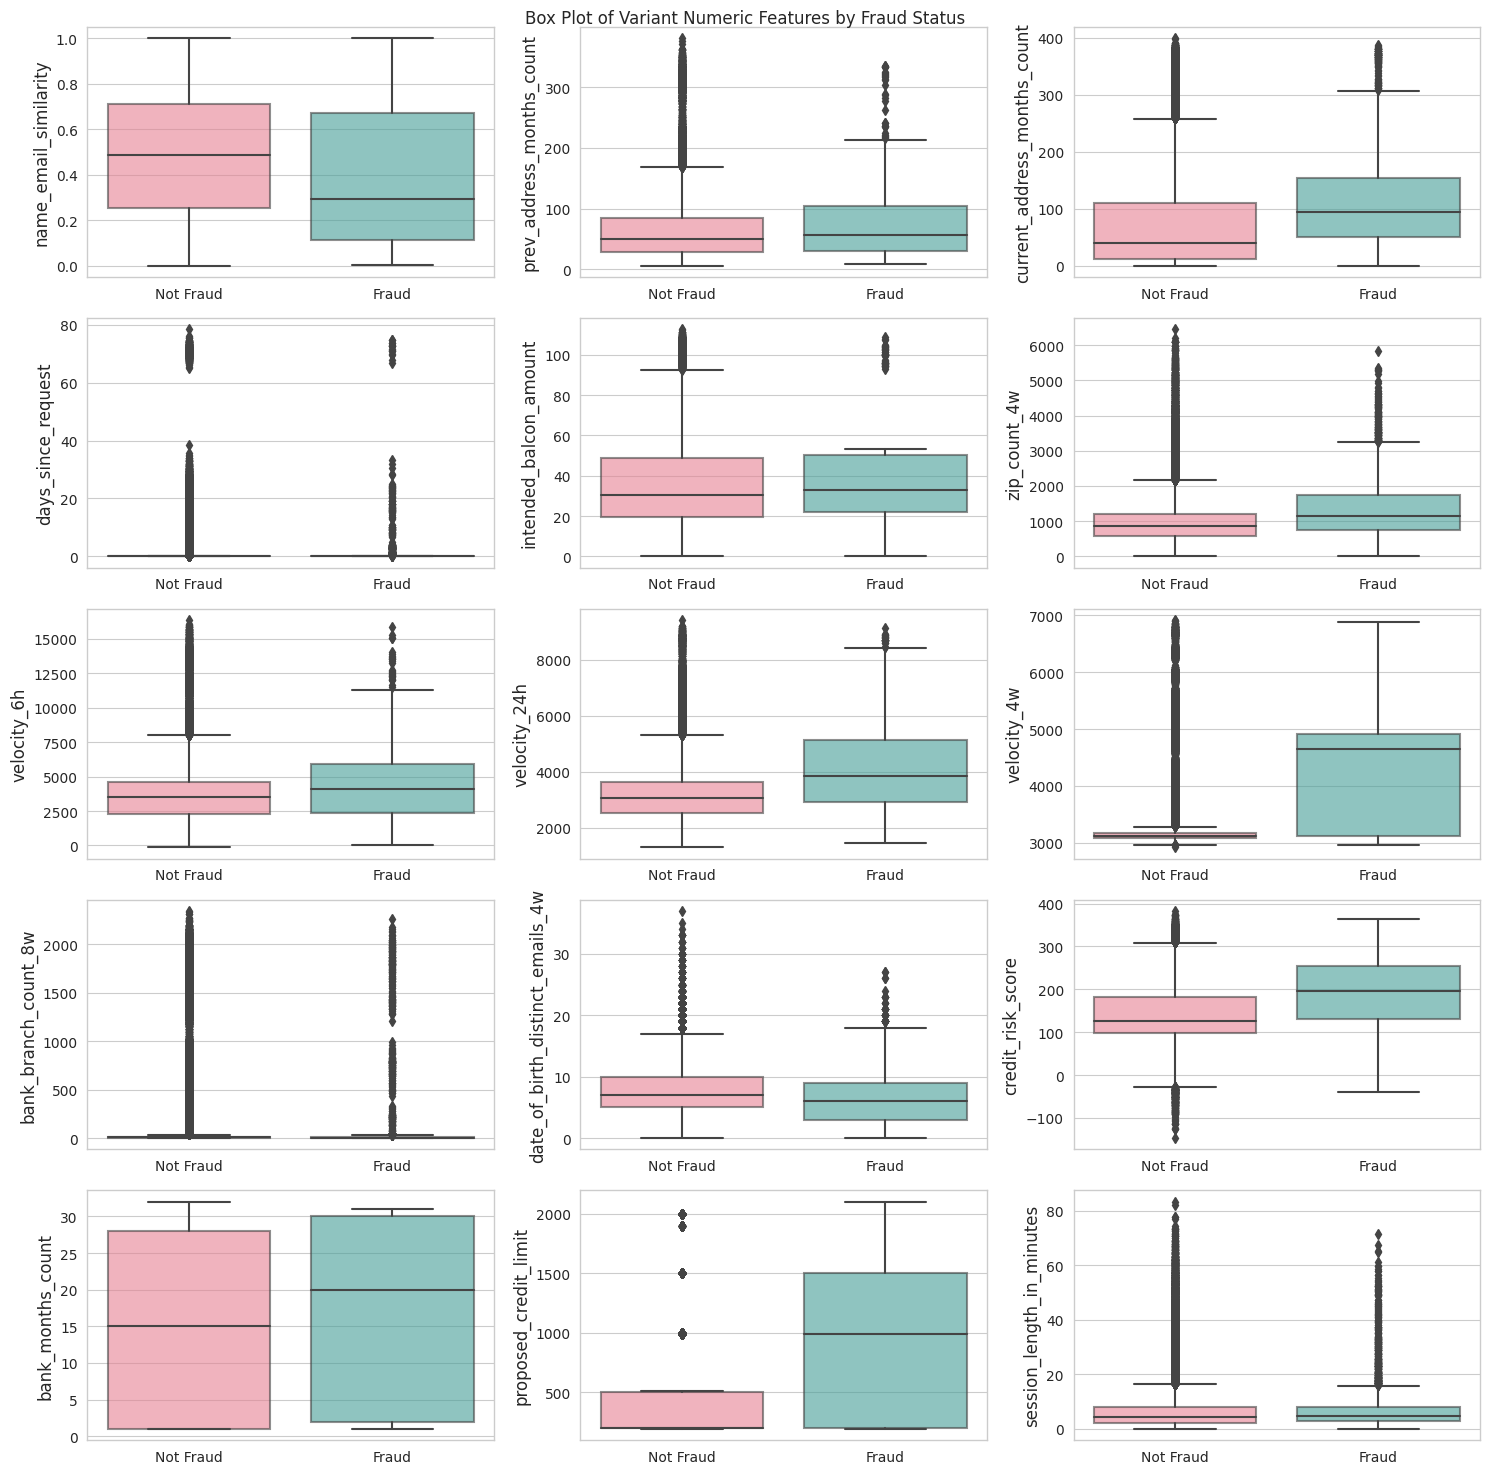

In [ ]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Add a title to the figure
fig.suptitle('Box Plot of Variant Numeric Features by Fraud Status')

# Loop through the numeric features and plot a box plot for each feature
for i, feature in enumerate(numeric_features):
    ax = axes[i // 3][i % 3]
    sns.boxplot(data=df, x='fraud_bool', y=feature, ax=ax, palette=my_palette, boxprops=dict(alpha=.6))
    ax.set_xlabel('')
    ax.set_ylabel(feature)
    ax.set_xticklabels(['Not Fraud', 'Fraud'])

# Adjust the layout and display the plot
plt.tight_layout()

plt.savefig("variant_numeric_box_plot.png", bbox_inches='tight')

plt.show()

<h4 id="one-hot-encoding-for-categorical-features">One-Hot Encoding for Categorical Features</h4>

In [ ]:
# Create a list of categorical features in the DataFrame new_df whose data type is `object`
categorical_features = [x for x in new_df.columns if new_df[x].dtypes == "O"]

print(categorical_features)

['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']


In [ ]:
var_categorical_features = [x for x in new_var_df.columns if new_var_df[x].dtypes == "O"]

print('Variant Data Categorical Features: \n',var_categorical_features)

Variant Data Categorical Features: 
 ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']


Both datasets seem to contain the same set of categorical features, suggesting consistency in the types of information being captured for these categories.

In [ ]:
# Convert categorical variables into dummy variables using one-hot encoding
new_df = pd.DataFrame(pd.get_dummies(new_df, prefix=categorical_features))

# Display the first 5 rows of the DataFrame
print('Base Data: \n',new_df.head())


new_var_df = pd.DataFrame(pd.get_dummies(new_var_df, prefix=categorical_features))

print('Variant Data: \n',new_var_df.head())

Base Data: 
    fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           1     0.9               0.166828                         -1   
1           1     0.9               0.296286                         -1   
2           1     0.9               0.044985                         -1   
3           1     0.9               0.159511                         -1   
4           1     0.9               0.596414                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                            88            50            0.020925   
1                           144            50            0.005418   
2                           132            40            3.108549   
3                            22            50            0.019079   
4                           218            50            0.004441   

   intended_balcon_amount  zip_count_4w   velocity_6h  velocity_24h  \
0               -1.331345           769  10650.765

Convert categorical data (like types of payments or employment statuses) into a computer-friendly format using one-hot encoding by creating new columns to represent categories of the transformed data.

In [ ]:
X = new_df.drop(['fraud_bool'], axis=1)
y = new_df['fraud_bool']

var_X = new_var_df.drop(['fraud_bool'], axis=1)
var_y = new_var_df['fraud_bool']

Separate the dataset into two parts: the feature matrix (X) and the target variable (y).

The feature matrix contains all the information except the 'fraud_bool' column, which holds whether the instance is labeled as fraudulent or not.

The target variable (y) consists of just the 'fraud_bool' column.

<h4 id="min-max-scaling-for-numerical-features">Min-Max Scaling for Numerical Features</h4>

In [ ]:
 # Import the necessary libraries for data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

In [ ]:
numeric_transformer = MinMaxScaler()
preprocessor = ColumnTransformer([('scaled', numeric_transformer, numeric_features)], remainder='passthrough')
X_scaled = preprocessor.fit_transform(X)

var_preprocessor = ColumnTransformer([('scaled', numeric_transformer, var_numeric_features)], remainder='passthrough')
var_X_scaled = var_preprocessor.fit_transform(var_X)

This code adjusts the range of numeric values in a dataset using a method called Min-Max scaling. This ensures that numerical features have consistent scales, which is essential for accurate analysis and modeling. The transformation only affects numeric features, leaving non-numeric features unchanged.

In [ ]:
feature_names = preprocessor.get_feature_names_out()
feature_names = [feature.replace('remainder__', '') for feature in feature_names]
print('Base Features: \n',feature_names)

var_feature_names = var_preprocessor.get_feature_names_out()
var_feature_names = [feature.replace('remainder__', '') for feature in var_feature_names]
print('Variant Feature: \n',var_feature_names)

Base Features: 
 ['scaled__name_email_similarity', 'scaled__prev_address_months_count', 'scaled__current_address_months_count', 'scaled__days_since_request', 'scaled__intended_balcon_amount', 'scaled__zip_count_4w', 'scaled__velocity_6h', 'scaled__velocity_24h', 'scaled__velocity_4w', 'scaled__bank_branch_count_8w', 'scaled__date_of_birth_distinct_emails_4w', 'scaled__credit_risk_score', 'scaled__bank_months_count', 'scaled__proposed_credit_limit', 'scaled__session_length_in_minutes', 'income', 'customer_age', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count', 'month', 'payment_type_AA', 'payment_type_AB', 'payment_type_AC', 'payment_type_AD', 'payment_type_AE', 'employment_status_CA', 'employment_status_CB', 'employment_status_CC', 'employment_status_CD', 'employment_status_CE', 'employment_status_CF', 'employment_status_CG', 'housing_status_BA', 'housing_status_BB', 

The presence of the same features in both datasets after pre-processing ensures consistency and enables fair comparison between the "Base" and "Variant" datasets.
        
The addition of prefixes helps distinguish scaled features from their original counterparts.        

In [ ]:
X_scaled = pd.DataFrame(X_scaled, columns=feature_names)
var_X_scaled = pd.DataFrame(var_X_scaled, columns=var_feature_names)

This code takes the scaled and transformed feature matrices for both the training and testing sets and converts them into familiar pandas DataFrames. These DataFrames hold the scaled features as columns with corresponding names.

In simpler terms, the code arranges the scaled data in a way that's easy to understand and work with, just like a table with rows and columns.

<h3 id="feature-selection-for-fraud-detection-of-bank-account-applications">Feature Selection for Fraud Detection of Bank Account Applications</h3>

In [ ]:
# Import the necessary libraries for feature selection
from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, chi2, mutual_info_classif
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import ExtraTreesClassifier

<h4 id="resampling-for-effective-feature-selection-tests">Resampling for Effective Feature Selection Tests</h4>

In [ ]:
# Import the necessary libraries for undersampling imbalanced datasets
from imblearn.under_sampling import NearMiss
from collections import Counter

In [ ]:
# conda install -c conda-forge imbalanced-learn --user

In [ ]:
 %%time

# Perform NearMiss undersampling to handle imbalanced data
print(f'Test Base dataset samples per class {Counter(y)}')

# Define the NearMiss undersampling object with a sampling strategy of 1 and all available CPU cores
nm = NearMiss(sampling_strategy=1, n_jobs=-1)

# Perform NearMiss undersampling on the feature matrix X and target variable y
X_scaled_nm, y_scaled_nm = nm.fit_resample(X_scaled, y)

# Print the number of occurrences of each class in the resampled dataset
print('Resampled Base dataset shape %s' % Counter(y_scaled_nm))

Test Base dataset samples per class Counter({0: 97180, 1: 2820})
Resampled Base dataset shape Counter({0: 2820, 1: 2820})
CPU times: user 3.51 s, sys: 80.8 ms, total: 3.59 s
Wall time: 2.08 s


In [ ]:
 %%time

# Perform NearMiss undersampling to handle imbalanced data
print(f'Test Variant dataset samples per class {Counter(var_y)}')

# Define the NearMiss undersampling object with a sampling strategy of 1 and all available CPU cores
var_nm = NearMiss(sampling_strategy=1, n_jobs=-1)

# Perform NearMiss undersampling on the feature matrix X and target variable y
var_X_scaled_nm, var_y_scaled_nm = var_nm.fit_resample(var_X_scaled, var_y)

# Print the number of occurrences of each class in the resampled dataset
print('Resampled Variant dataset shape %s' % Counter(var_y_scaled_nm))

Test Variant dataset samples per class Counter({0: 98914, 1: 1086})
Resampled Variant dataset shape Counter({0: 1086, 1: 1086})
CPU times: user 1.56 s, sys: 25.8 ms, total: 1.59 s
Wall time: 958 ms


Handles imbalanced data using a technique called NearMiss undersampling.

It aims to balance the classes by reducing the dominant class to match the size of the minority class.

The time taken for the process is also measured, and the class distribution before and after undersampling is displayed.

The goal of NearMiss undersampling is to balance the class distribution by reducing the dominant class to match the size of the minority class.

In both the "Base" and "Variant" datasets, NearMiss undersampling achieves this balance, resulting in equal instances for both classes.
    
In summary, the class distribution in both the "Base" and "Variant" datasets has been successfully balanced through NearMiss undersampling, which aids in addressing the issue of imbalanced data for more accurate analysis and modeling.

In [ ]:
# Create a list of categorical features in the DataFrame X_scaled_nm
categorical_features = [feature for feature in X_scaled_nm.columns if X_scaled_nm[feature].nunique() >= 2 and X_scaled_nm[feature].nunique() < 10]

print('Base Categorical Feature: \n',categorical_features)

var_categorical_features = [var_feature for var_feature in var_X_scaled_nm.columns if var_X_scaled_nm[var_feature].nunique() >= 2 and var_X_scaled_nm[var_feature].nunique() < 10]

print('Variant Categorical Feature: \n',var_categorical_features)

Base Categorical Feature: 
 ['income', 'customer_age', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'keep_alive_session', 'device_distinct_emails_8w', 'month', 'payment_type_AA', 'payment_type_AB', 'payment_type_AC', 'payment_type_AD', 'payment_type_AE', 'employment_status_CA', 'employment_status_CB', 'employment_status_CC', 'employment_status_CD', 'employment_status_CE', 'employment_status_CF', 'employment_status_CG', 'housing_status_BA', 'housing_status_BB', 'housing_status_BC', 'housing_status_BD', 'housing_status_BE', 'housing_status_BF', 'housing_status_BG', 'source_INTERNET', 'source_TELEAPP', 'device_os_linux', 'device_os_macintosh', 'device_os_other', 'device_os_windows', 'device_os_x11']
Variant Categorical Feature: 
 ['scaled__proposed_credit_limit', 'income', 'customer_age', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'keep_alive_session', 'device_distinct_emails_8w', 'mo

This code snippet identifies categorical features in the scaled and resampled dataset X_scaled_nm. These features have more than 1 unique value but fewer than 10 unique values. The identified categorical features are then printed.

 List of categorical features in both the "Base" and "Variant" datasets after preprocessing and undersampling. These features are crucial for understanding patterns and making predictions based on the data.

In [ ]:
numeric_features = [feature for feature in X_scaled_nm.columns if X_scaled_nm[feature].nunique() >= 10]

print('Base Numeric Feature: \n',numeric_features)

var_numeric_features = [var_feature for var_feature in var_X_scaled_nm.columns if var_X_scaled_nm[var_feature].nunique() >= 10]

print('Variant Numeric Feature: \n',var_numeric_features)

Base Numeric Feature: 
 ['scaled__name_email_similarity', 'scaled__prev_address_months_count', 'scaled__current_address_months_count', 'scaled__days_since_request', 'scaled__intended_balcon_amount', 'scaled__zip_count_4w', 'scaled__velocity_6h', 'scaled__velocity_24h', 'scaled__velocity_4w', 'scaled__bank_branch_count_8w', 'scaled__date_of_birth_distinct_emails_4w', 'scaled__credit_risk_score', 'scaled__bank_months_count', 'scaled__proposed_credit_limit', 'scaled__session_length_in_minutes']
Variant Numeric Feature: 
 ['scaled__name_email_similarity', 'scaled__prev_address_months_count', 'scaled__current_address_months_count', 'scaled__days_since_request', 'scaled__intended_balcon_amount', 'scaled__zip_count_4w', 'scaled__velocity_6h', 'scaled__velocity_24h', 'scaled__velocity_4w', 'scaled__bank_branch_count_8w', 'scaled__date_of_birth_distinct_emails_4w', 'scaled__credit_risk_score', 'scaled__bank_months_count', 'scaled__session_length_in_minutes']


This code snippet identifies numerical features in the scaled and resampled dataset X_scaled_nm. These features have more than or equal to 10 unique values. The identified numerical features are then printed.

In simpler terms, the code is finding characteristics in the data that have a variety of different values, like age, income, or counts. These types of features often carry a wide range of information and can be useful for analysis or modeling.        

 numerical features in both the "Base" and "Variant" datasets after preprocessing and undersampling. These features are crucial for understanding patterns, trends, and relationships within the data.

<h4 id="variance-threshold-test-for-constant-features">Variance Threshold Test for Constant Features</h4>

In [ ]:
selector = VarianceThreshold()
selector.fit(X_scaled_nm)

constant_features = [feature for feature in X_scaled_nm.columns
                     if feature not in X_scaled_nm.columns[selector.get_support()]]

print('Base Constant Features: \n',constant_features)

var_selector = VarianceThreshold()
var_selector.fit(var_X_scaled_nm)

var_constant_features = [var_feature for var_feature in var_X_scaled_nm.columns
                     if var_feature not in var_X_scaled_nm.columns[var_selector.get_support()]]

print('Variant Constant Features: \n',var_constant_features)


Base Constant Features: 
 ['device_fraud_count']
Variant Constant Features: 
 ['device_fraud_count', 'payment_type_AE', 'housing_status_BG']


The names of features that have constant values (very low variance) in the scaled and resampled dataset. These features might not provide useful information for analysis or modeling and can be considered for removal.

"device_fraud_count" remains a constant feature in both datasets. This means it likely carries the same value across all instances and may not contribute much to analysis or modeling.
             
The information provides insights into constant features that have been identified in both the "Base" and "Variant" datasets after preprocessing and feature selection. These features might be considered for removal to simplify analysis and modeling efforts.
        

In [ ]:
# Dropping constant features
X_scaled_nm.drop(['device_fraud_count'], axis=1, inplace=True)

var_X_scaled_nm.drop(['device_fraud_count'], axis=1, inplace=True)

 Drop the constant feature "device_fraud_count" from the scaled and resampled dataset X_scaled_nm. This is done to remove features that have the same value across all instances, as they might not contribute valuable information for analysis or modeling. The removal is achieved by modifying the dataset in place.

<h4 id="pearson-correlation-test-for-multicollinearity">Pearson Correlation Test for Multicollinearity</h4>

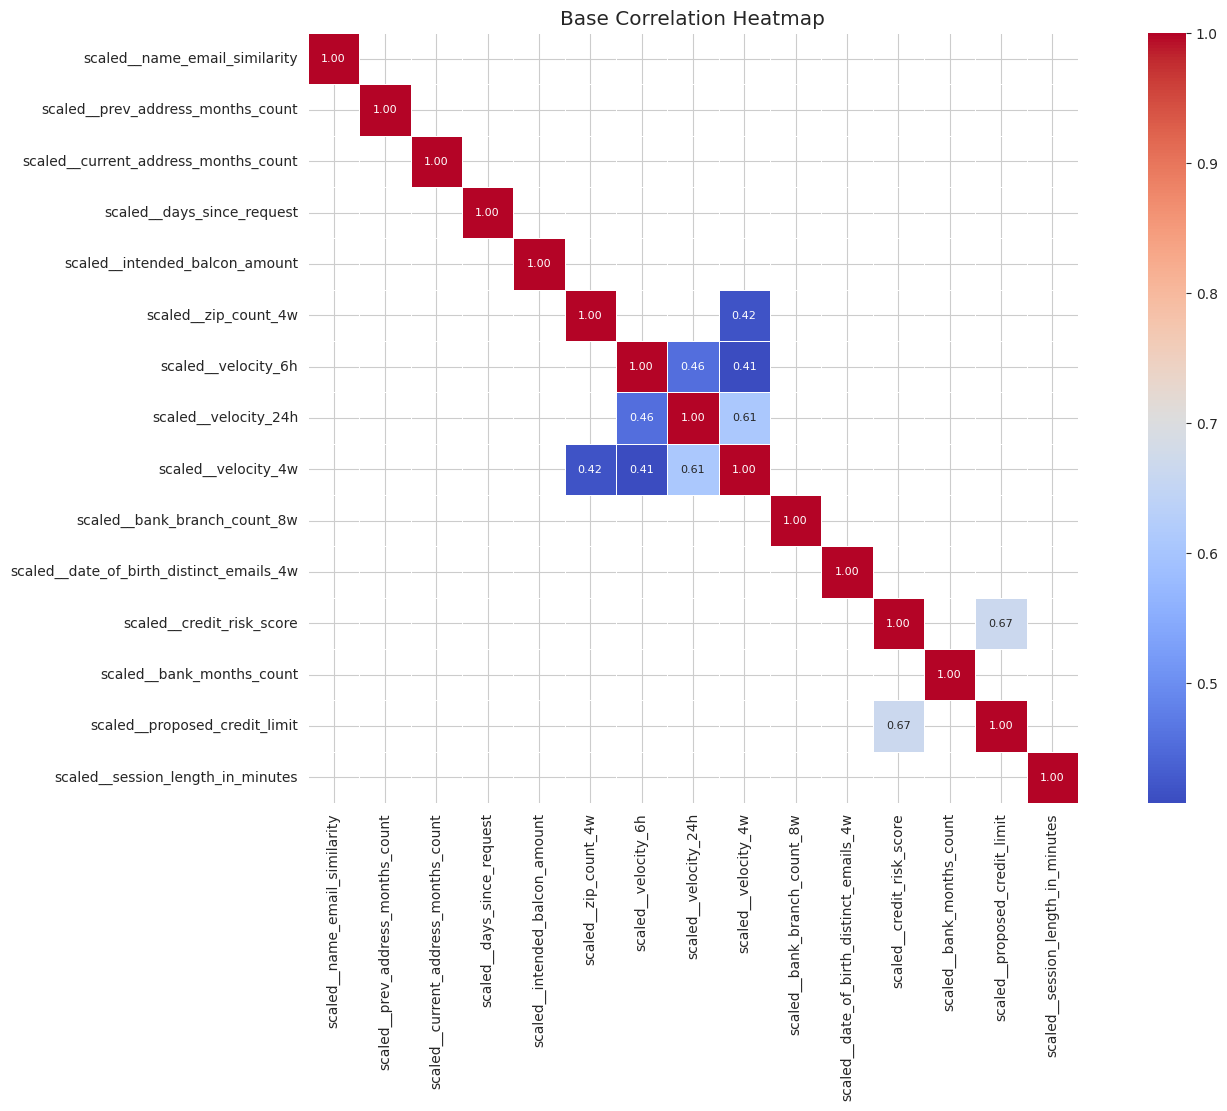

In [ ]:
# Compute correlation matrix
X_train_corr = X_scaled_nm[numeric_features].corr()

# Plot correlation matrix with annotated values
fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(X_train_corr[(X_train_corr >= 0.4) | (X_train_corr <= -0.4)], annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, square=True, ax=ax, annot_kws={"fontsize": 8})
plt.title('Base Correlation Heatmap')

plt.savefig("base_correlation_plot.png", bbox_inches='tight')

plt.show()

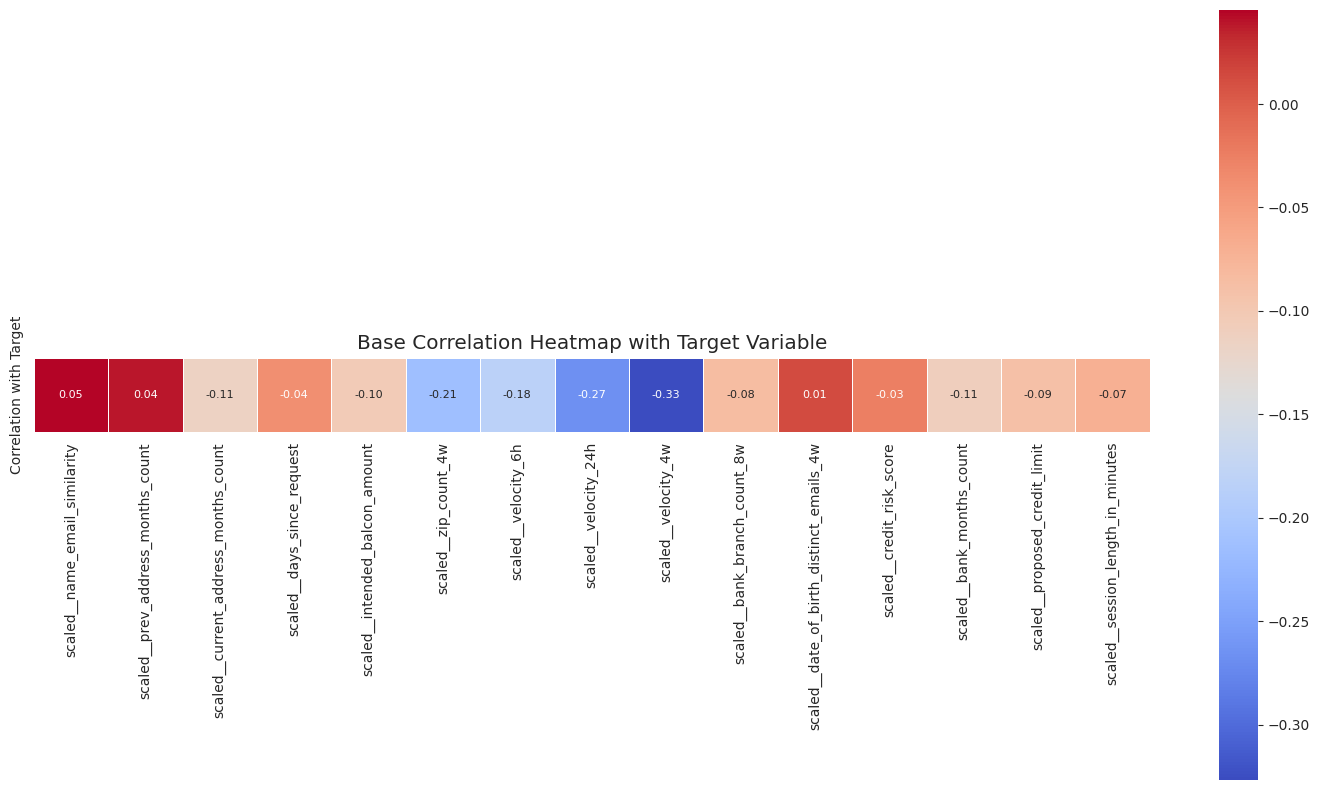

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation between features and the target variable
correlation_with_target = X_scaled_nm[numeric_features].corrwith(y)

# Create a DataFrame to hold the correlation values
correlation_df = pd.DataFrame(correlation_with_target, columns=['Correlation with Target'])

# Plot correlation matrix with annotated values
fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(correlation_df.T, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, square=True, ax=ax, annot_kws={"fontsize": 8})
plt.title('Base Correlation Heatmap with Target Variable')

plt.savefig("base_correlation_with_target_plot.png", bbox_inches='tight')


In [ ]:
correlation_df

Correlation with Target
scaled__name_email_similarity                            0.045486
scaled__prev_address_months_count                        0.038373
scaled__current_address_months_count                    -0.114589
scaled__days_since_request                              -0.038464
scaled__intended_balcon_amount                          -0.102924
scaled__zip_count_4w                                    -0.214139
scaled__velocity_6h                                     -0.183606
scaled__velocity_24h                                    -0.266153
scaled__velocity_4w                                     -0.326803
scaled__bank_branch_count_8w                            -0.084887
scaled__date_of_birth_distinct_emails_4w                 0.013392
scaled__credit_risk_score                               -0.025329
scaled__bank_months_count                               -0.109771
scaled__proposed_credit_limit                           -0.089731
scaled__session_length_in_minutes                       -0.070043

**Positive Correlation:** Features with a positive correlation coefficient have a positive relationship with the target variable. In your results, *scaled__name_email_similarity* and *scaled__prev_address_months_count* have positive correlations with the target. This suggests that higher values of these features are associated with a higher likelihood of fraud.

**Negative Correlation:** Features with a negative correlation coefficient have a negative relationship with the target variable. In your results, several features such as *scaled__current_address_months_count*, *scaled__intended_balcon_amount*, *scaled__zip_count_4w*, *scaled__velocity_6h*, *scaled__velocity_24h*, *scaled__velocity_4w*, *scaled__bank_branch_count_8w*, *scaled__bank_months_count*, *scaled__proposed_credit_limit*, and *scaled__session_length_in_minutes* have negative correlations with the target. This implies that higher values of these features are associated with a lower likelihood of fraud.

**Weak Correlation:** Features with correlation coefficients close to zero, like *scaled__credit_risk_score* and *scaled__days_since_request*, have weak or negligible relationships with the target. Their values are not strongly indicative of whether a transaction is fraudulent or not.

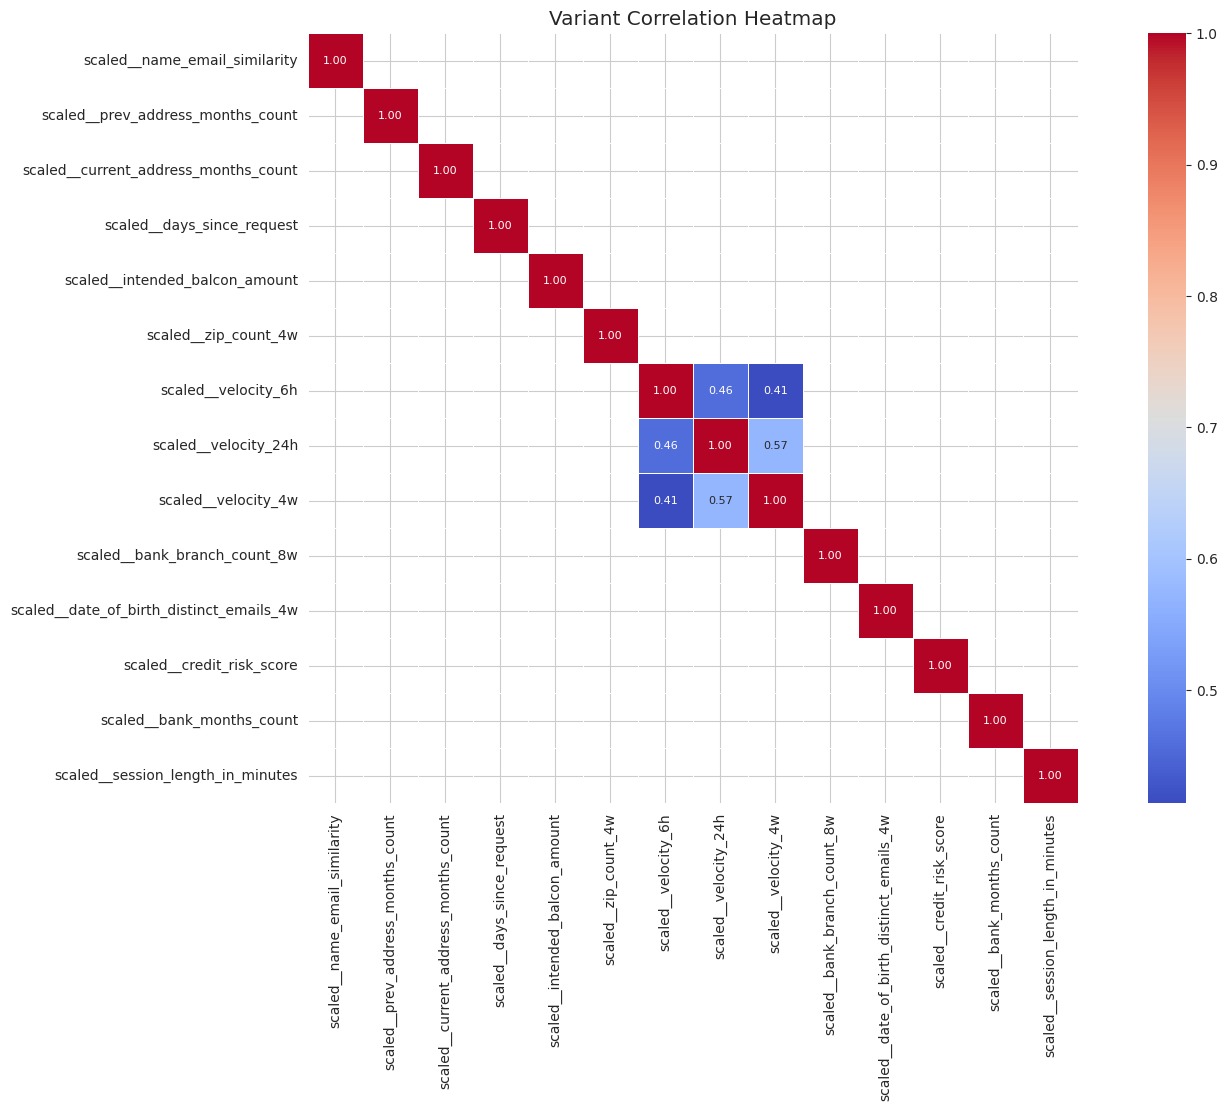

In [ ]:
# Compute correlation matrix
var_X_train_corr = var_X_scaled_nm[var_numeric_features].corr()

# Plot correlation matrix with annotated values
fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(var_X_train_corr[(var_X_train_corr >= 0.4) | (var_X_train_corr <= -0.4)], annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, square=True, ax=ax, annot_kws={"fontsize": 8})
plt.title('Variant Correlation Heatmap')

plt.savefig("variant_correlation_plot.png", bbox_inches='tight')

plt.show()

Display plot to show how different numerical features are related to each other. It creates a heatmap where colors show the degree of correlation between features. This visualization helps us identify potential relationships and patterns in the data.

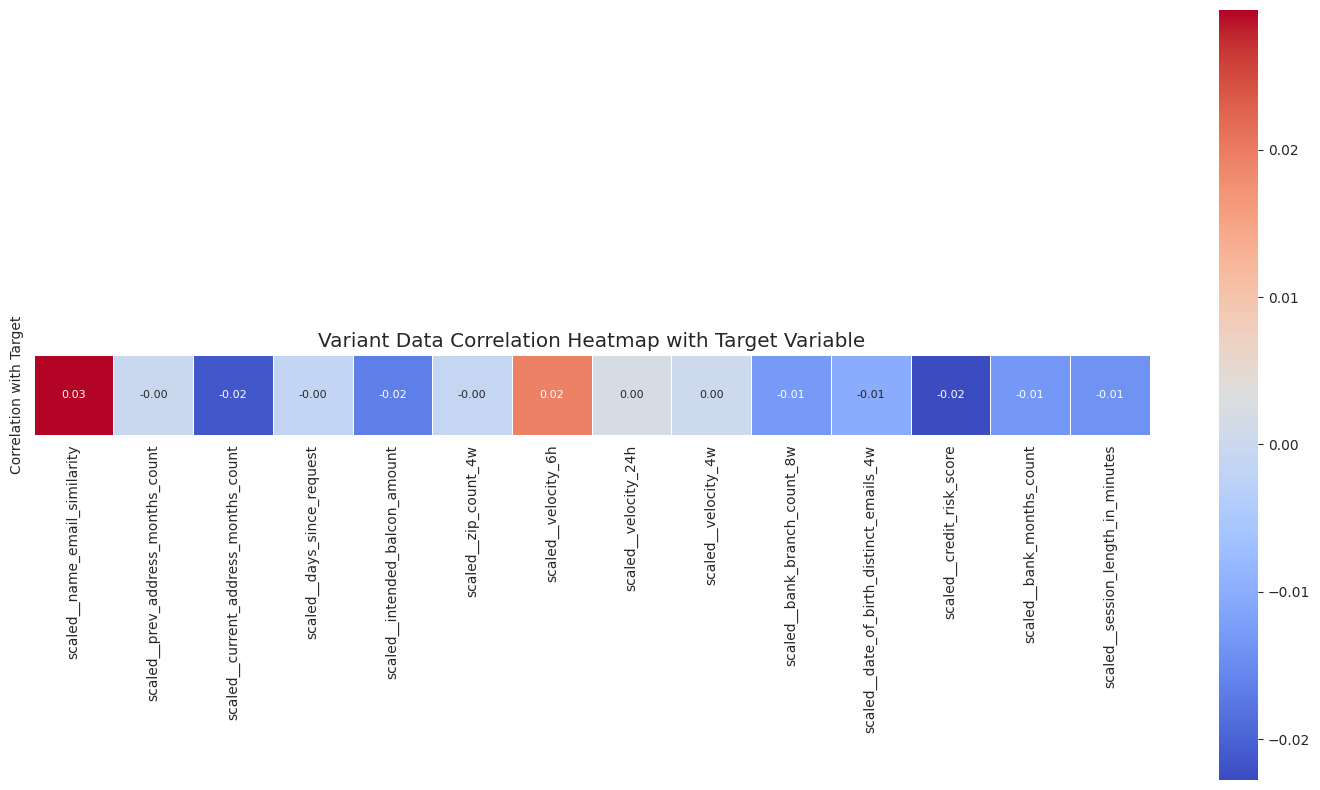

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation between features and the target variable
var_correlation_with_target = var_X_scaled_nm[var_numeric_features].corrwith(var_y)

# Create a DataFrame to hold the correlation values
var_correlation_df = pd.DataFrame(var_correlation_with_target, columns=['Correlation with Target'])

# Plot correlation matrix with annotated values
fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(var_correlation_df.T, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, square=True, ax=ax, annot_kws={"fontsize": 8})
plt.title('Variant Data Correlation Heatmap with Target Variable')

plt.savefig("variant_correlation_with_target_plot.png", bbox_inches='tight')


**Weak Correlation:** In the results, most of the features have correlation coefficients close to zero, which suggests that there is a weak linear relationship between these features and the target variable. Weak correlations imply that these features may not be strongly indicative of whether a transaction is fraudulent or not.

**Positive and Negative Correlation:** Some features have small positive correlations (e.g., *scaled__name_email_similarity*, *scaled__velocity_6h*, *scaled__velocity_24h*, *scaled__velocity_4w*) with the target, while others have small negative correlations (e.g., *scaled__prev_address_months_count*, *scaled__current_address_months_count*, *scaled__days_since_request*, *scaled__intended_balcon_amount*, *scaled__zip_count_4w*, *scaled__bank_branch_count_8w*, *scaled__date_of_birth_distinct_emails_4w*, *scaled__credit_risk_score*, scaled__bank_months_count, *scaled__session_length_in_minutes*). However, these correlations are relatively weak, and their absolute values are small, indicating that the relationship is not strong.

In [ ]:
var_correlation_df

Correlation with Target
scaled__name_email_similarity                            0.029469
scaled__prev_address_months_count                       -0.000268
scaled__current_address_months_count                    -0.021389
scaled__days_since_request                              -0.001423
scaled__intended_balcon_amount                          -0.016534
scaled__zip_count_4w                                    -0.001094
scaled__velocity_6h                                      0.019278
scaled__velocity_24h                                     0.001944
scaled__velocity_4w                                      0.000374
scaled__bank_branch_count_8w                            -0.012832
scaled__date_of_birth_distinct_emails_4w                -0.010225
scaled__credit_risk_score                               -0.022761
scaled__bank_months_count                               -0.013251
scaled__session_length_in_minutes                       -0.013966

**Comparing the results of the two correlation analyses for your "base data" and "variant data" with the target variable yields some valuable insights:**

**Base Data Correlation with Target Variable:**

scaled__name_email_similarity has a relatively stronger positive correlation (0.045486) with the target variable, indicating that as this feature increases, the likelihood of fraud increases. It suggests that email and name similarity might be associated with fraudulent transactions.

scaled__zip_count_4w, scaled__velocity_6h, scaled__velocity_24h, and scaled__velocity_4w have moderate to strong negative correlations with the target variable. This suggests that higher values of these features are associated with a lower likelihood of fraud. It's possible that these features relate to transaction volume and speed, which might be indicative of legitimate transactions.

Other features such as scaled__prev_address_months_count, scaled__current_address_months_count, scaled__days_since_request, scaled__intended_balcon_amount, scaled__bank_branch_count_8w, scaled__bank_months_count, scaled__proposed_credit_limit, and scaled__session_length_in_minutes have negative correlations with the target but are not as strong as the velocity-related features.

scaled__date_of_birth_distinct_emails_4w and scaled__credit_risk_score have weak positive correlations with the target, indicating that there might be some association between these features and fraud, but the relationship is not strong.

Variant Data Correlation with Target Variable:

The correlations in the variant dataset are generally weaker compared to the base data. None of the features have strong correlations with the target variable.

scaled__name_email_similarity still has the highest positive correlation (0.029469) with the target, but it's weaker than in the base data.

Most other features in the variant data have correlations close to zero or very small values, both positive and negative. This suggests that, in isolation, these features may not be good indicators of fraud in the variant dataset.

**Key Insights:**

**Feature Importance Variability:** The correlation patterns between features and the target variable differ significantly between the base data and the variant data. In the base data, some features show moderate to strong correlations, while in the variant data, correlations are generally weaker.

**Consider Feature Engineering:** Since the correlations are relatively weak in both datasets, it may be beneficial to explore feature engineering techniques to create more informative features or capture non-linear relationships that may be important for fraud detection.

**Ensemble and Model Selection:** Given the weak correlations, it's essential to consider more advanced machine learning techniques, such as ensemble methods or gradient boosting, which can combine weakly correlated features to make more accurate predictions.

**Data Variability**: The differences in correlation patterns between the base and variant datasets could be due to changes in the data distribution or data collection process. It's important to understand the reasons behind these variations and adapt your fraud detection model accordingly.

In summary, while both datasets show some correlations between features and the target variable, the variant dataset has weaker correlations overall. This suggests that building an effective fraud detection model may be more challenging in the variant dataset, and additional feature engineering and modeling techniques may be necessary to achieve robust performance.

In [ ]:
 # Check the distribution of values in a column
print('Base Data: \n',X_scaled_nm.device_distinct_emails_8w.value_counts())

print('Variant Data: \n',var_X_scaled_nm.device_distinct_emails_8w.value_counts())

Base Data: 
 1.0    5434
2.0     175
0.0      31
Name: device_distinct_emails_8w, dtype: int64
Variant Data: 
 1.0    2063
2.0      83
0.0      26
Name: device_distinct_emails_8w, dtype: int64


The value "1" is the most frequent in both datasets for the "device_distinct_emails_8w" column.

The distribution of values differs between the "Base" and "Variant" datasets.        

In [ ]:
# Identify the rows to drop based on a condition on a specific feature
rows_to_drop = np.where(X_scaled_nm['device_distinct_emails_8w'] < 0)[0]
# rows_to_drop

X_train_cat = X_scaled_nm[categorical_features].copy()
X_train_cat.drop(rows_to_drop, axis=0, inplace=True)

y_train_cat = y_scaled_nm.copy()
y_train_cat.drop(rows_to_drop, axis=0, inplace=True)


var_rows_to_drop = np.where(var_X_scaled_nm['device_distinct_emails_8w'] < 0)[0]
# var_rows_to_drop

var_X_train_cat = var_X_scaled_nm[var_categorical_features].copy()
var_X_train_cat.drop(var_rows_to_drop, axis=0, inplace=True)

var_y_train_cat = var_y_scaled_nm.copy()
var_y_train_cat.drop(var_rows_to_drop, axis=0, inplace=True)

Remove rows from the data where the value in the "device_distinct_emails_8w" column is less than 0. This helps clean the data and ensures that we're only working with valid and relevant instances.

In [ ]:
# Use chi-squared test to evaluate the relationship between categorical features and the target variable
chi2_results = chi2(X_train_cat, y_train_cat)
data={'feature': X_train_cat.columns, 'chi2': chi2_results[0], 'p_value': chi2_results[1]}
chi2_results_df = pd.DataFrame(data)

var_chi2_results = chi2(var_X_train_cat, var_y_train_cat)
var_data={'feature': var_X_train_cat.columns, 'chi2': var_chi2_results[0], 'p_value': var_chi2_results[1]}
var_chi2_results_df = pd.DataFrame(var_data)

Check if there's a significant relationship between categorical features and the target variable. It does this using the chi-squared test, and the results are organized in a DataFrame for analysis.

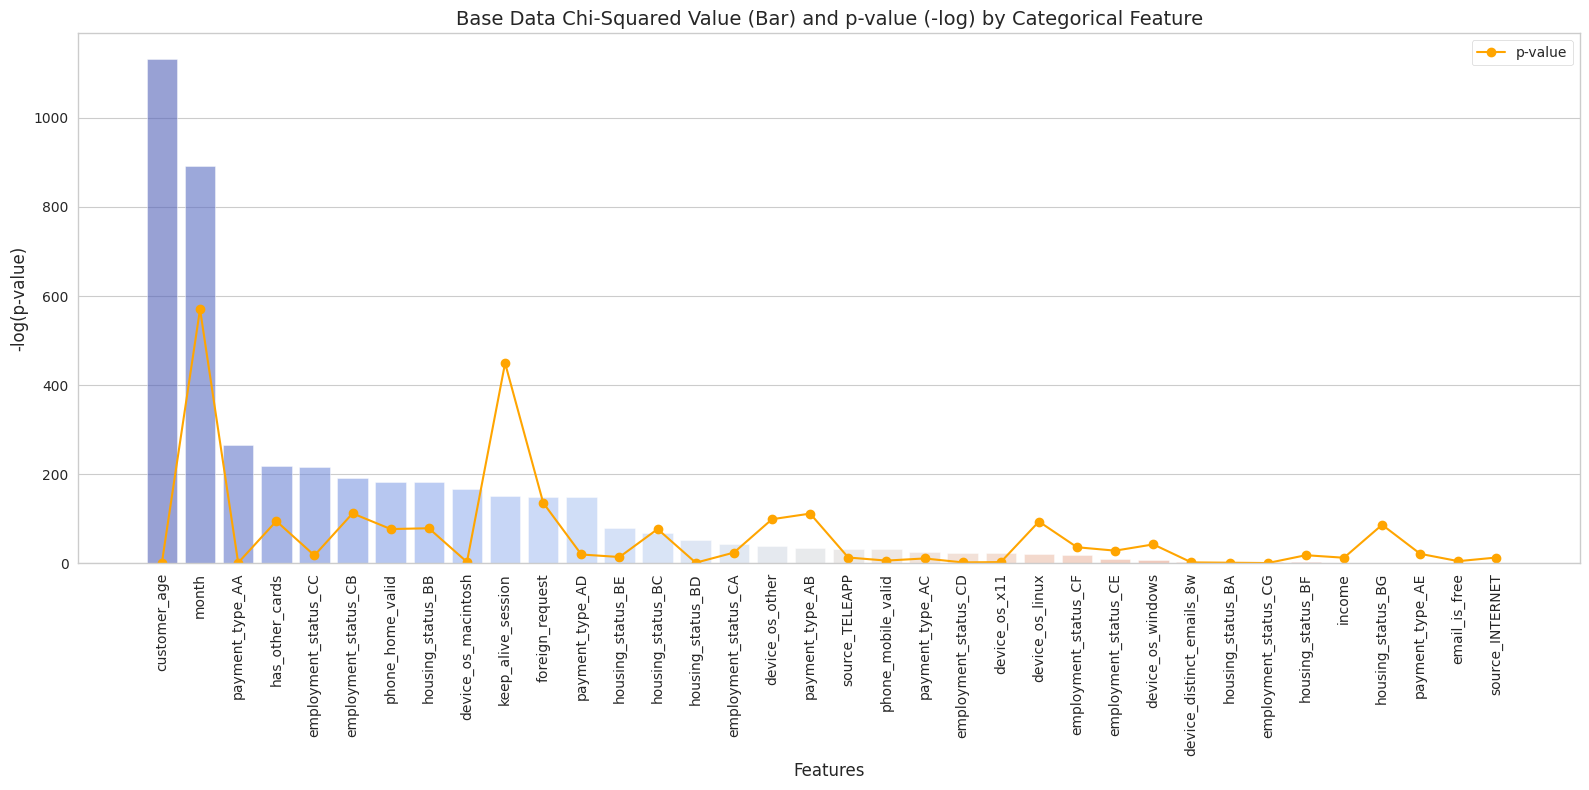

In [ ]:
# Set up plot
plt.figure(figsize=(16, 8))

# Create bar plot for chi-square values
sns.barplot(data=chi2_results_df.sort_values(by='chi2', ascending=False), x="feature", y="chi2", palette="coolwarm", alpha=.6)

# Customize labels and legend for chi-square values
plt.xlabel("Features", fontsize=12)
plt.ylabel("chi2", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Create a line graph for p-values
x = np.arange(len(chi2_results_df))  # Generate x-values for the line graph
plt.plot(x, -np.log(chi2_results_df['p_value']), color="orange", marker='o', label='p-value')

# Customize labels and legend for p-values
plt.ylabel("-log(p-value)", fontsize=12)
plt.title("Base Data Chi-Squared Value (Bar) and p-value (-log) by Categorical Feature", fontsize=14)
plt.legend()

# Adjust the spacing between subplots
plt.tight_layout()

plt.savefig("base_chi_sq_and_p_value_plot.png", bbox_inches='tight')

# Show the plot
plt.show()


**Chi-Square Statistic:** The chi-square statistic measures the strength of association between the feature and the target variable. A higher chi-square value indicates a stronger association.

**p-value**: The p-value represents the probability that the observed association (or a more extreme association) between the feature and the target variable occurred by chance. A smaller p-value suggests a more significant association.

**Result Analysis:**

customer_age has a very high chi-square statistic (1133.254) and an extremely low p-value (close to zero). This indicates a strong association between customer age and the target variable. It suggests that customer age is likely an important predictor for your fraud detection model.

month also has a high chi-square statistic (891.419) and an extremely low p-value, indicating a strong association. This suggests that the month may be a critical factor in fraud detection.

Several other features, such as phone_home_valid, phone_mobile_valid, has_other_cards, foreign_request, keep_alive_session, payment_type_AA, payment_type_AC, payment_type_AD, employment_status_CB, employment_status_CC, housing_status_BB, housing_status_BC, housing_status_BE, device_os_macintosh, device_os_other, and device_os_windows, all have significant associations with the target variable, as indicated by their low p-values.

Features with higher p-values, such as income, email_is_free, device_distinct_emails_8w, payment_type_AE, employment_status_CA, employment_status_CD, employment_status_CE, employment_status_CF, employment_status_CG, housing_status_BA, housing_status_BD, housing_status_BF, housing_status_BG, source_INTERNET, source_TELEAPP, device_os_linux, and device_os_x11, have weaker associations with the target variable.

**Key Insights:**

The chi-square test results provide valuable information about the association between each feature and the target variable. Features with low p-values indicate stronger associations and are potentially important for your fraud detection model.

customer_age, month, and several other features show strong associations with the target and should be considered as important features when building your fraud detection model.

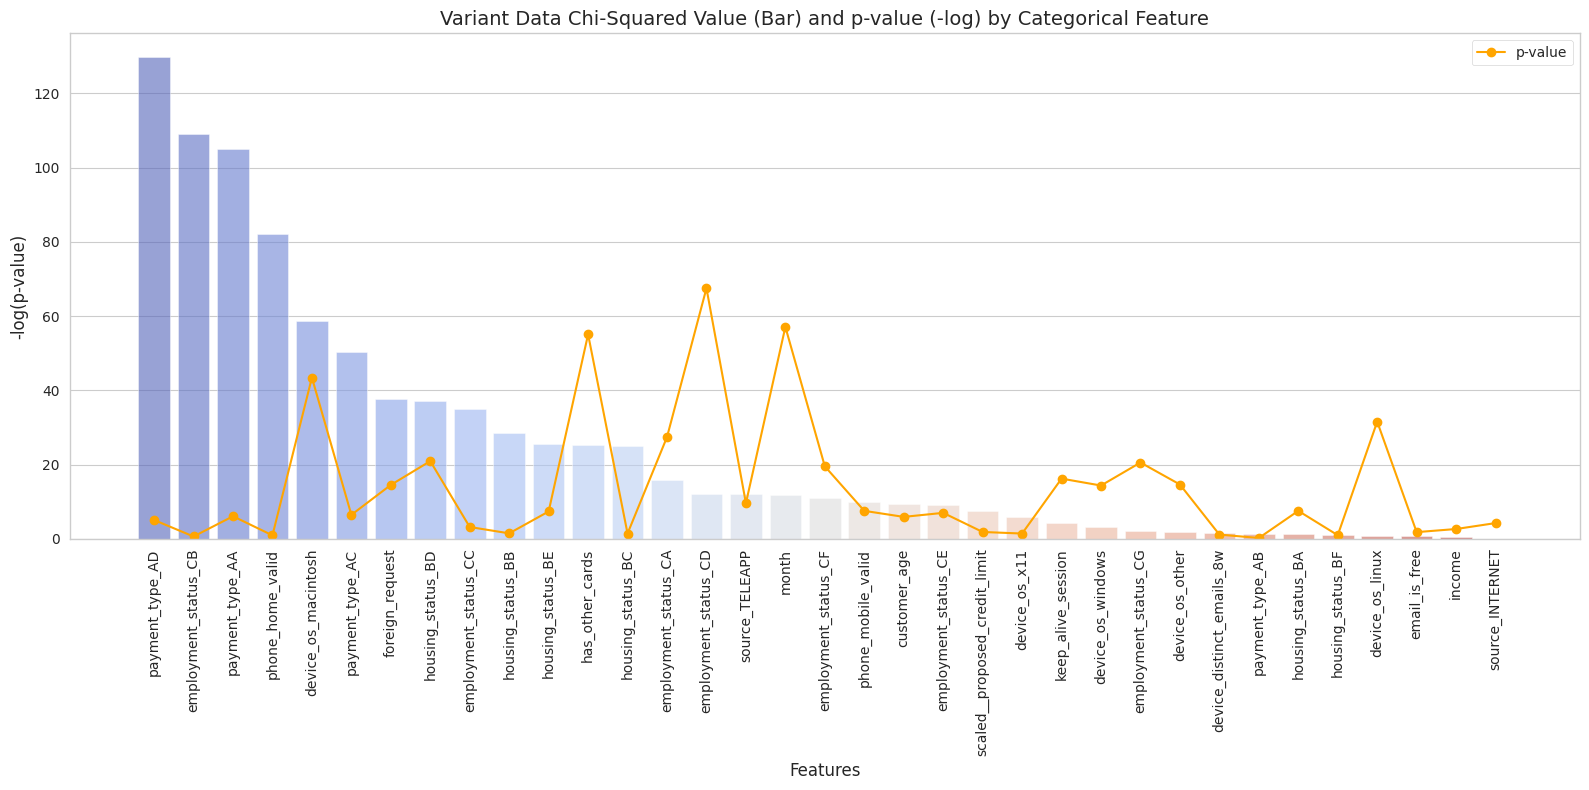

In [ ]:
# Set up plot
plt.figure(figsize=(16, 8))

# Create bar plot for chi-square values
sns.barplot(data=var_chi2_results_df.sort_values(by='chi2', ascending=False), x="feature", y="chi2", palette="coolwarm", alpha=.6)

# Customize labels and legend for chi-square values
plt.xlabel("Features", fontsize=12)
plt.ylabel("chi2", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Create a line graph for p-values
x = np.arange(len(var_chi2_results_df))  # Generate x-values for the line graph
plt.plot(x, -np.log(var_chi2_results_df['p_value']), color="orange", marker='o', label='p-value')

# Customize labels and legend for p-values
plt.ylabel("-log(p-value)", fontsize=12)
plt.title("Variant Data Chi-Squared Value (Bar) and p-value (-log) by Categorical Feature", fontsize=14)
plt.legend()

# Adjust the spacing between subplots
plt.tight_layout()

plt.savefig("variant_chi_sq_and_p_value_plot.png", bbox_inches='tight')

# Show the plot
plt.show()


**Chi-Square Values (Bar Chart):**

Features with higher chi-square values indicate a stronger association with the target variable. In your variant data, the following features have relatively high chi-square values:

***phone_home_valid (chi2 = 82.0):*** This suggests a strong association between the validity of the home phone number and the target variable.

***payment_type_AA (chi2 = 105.03):*** The payment type "AA" appears to have a strong association with the target.

***payment_type_AD (chi2 = 129.67):*** Similarly, the payment type "AD" shows a strong association with the target.

***employment_status_CB (chi2 = 109.0):*** Employment status "CB" is also strongly associated with the target.

Features with lower chi-square values have weaker associations with the target variable. For example, income (chi2 = 0.394) and email_is_free (chi2 = 0.739) have low chi-square values, suggesting weaker associations.

**P-Values (Line Graph with -log Transformation):**

The line graph of -log(p-values) helps you visualize the significance of each feature's association with the target variable.

Features with smaller -log(p-values) are more statistically significant. In your variant data, features with small -log(p-values) include:

phone_home_valid: This feature has a very low p-value, indicating a highly significant association with the target variable.
payment_type_AA: Similarly, this payment type has a highly significant association.
payment_type_AD: Another payment type with strong statistical significance.
employment_status_CB: Employment status "CB" is also highly significant.
customer_age: Although not as high as the previous features, customer age (chi2 = 9.31) has a relatively small -log(p-value), suggesting statistical significance.
Features with larger -log(p-values) are less statistically significant. For instance, income and email_is_free have higher -log(p-values), indicating weaker associations.

**Key Insights:**

In the variant data, several categorical features show strong associations and statistical significance with the target variable. These include features related to payment types, employment status, phone validity, and customer age.

Some features, such as income and email_is_free, have weaker associations and are less statistically significant in predicting the target variable.

It's essential to consider both chi-square values and p-values when selecting features for your model. Features with both high chi-square values and low -log(p-values) are likely to be the most informative for predicting the target variable.

In [ ]:
# Use SelectKBest with chi-squared test to select the top 5 categorical features that are most strongly associated with the target variable
best_chi2_cols = SelectKBest(chi2, k=15)
best_chi2_cols.fit(X_train_cat, y_train_cat)

# Get the names of the top 5 features
best_chi2_features = [X_train_cat.columns[best_chi2_cols.get_support()]]

# Print the names of the top 5 features
print(best_chi2_features)

[Index(['customer_age', 'phone_home_valid', 'has_other_cards',
       'foreign_request', 'keep_alive_session', 'month', 'payment_type_AA',
       'payment_type_AD', 'employment_status_CB', 'employment_status_CC',
       'housing_status_BB', 'housing_status_BC', 'housing_status_BD',
       'housing_status_BE', 'device_os_macintosh'],
      dtype='object')]


Identify the categorical features that have the strongest relationship with the target variable based on the chi-squared test. It selects the top 15 features and prints their names for further analysis.

In [ ]:
best_chi2_cols = SelectKBest(chi2, k=15)
best_chi2_cols.fit(X_train_cat, y_train_cat)

best_chi2_features = [X_train_cat.columns[best_chi2_cols.get_support()]]
print('Base Data: \n',best_chi2_features)


var_best_chi2_cols = SelectKBest(chi2, k=15)
var_best_chi2_cols.fit(var_X_train_cat, var_y_train_cat)

var_best_chi2_features = [var_X_train_cat.columns[var_best_chi2_cols.get_support()]]
print('Variant Data: \n',var_best_chi2_features)

Base Data: 
 [Index(['customer_age', 'phone_home_valid', 'has_other_cards',
       'foreign_request', 'keep_alive_session', 'month', 'payment_type_AA',
       'payment_type_AD', 'employment_status_CB', 'employment_status_CC',
       'housing_status_BB', 'housing_status_BC', 'housing_status_BD',
       'housing_status_BE', 'device_os_macintosh'],
      dtype='object')]
Variant Data: 
 [Index(['phone_home_valid', 'has_other_cards', 'foreign_request',
       'payment_type_AA', 'payment_type_AC', 'payment_type_AD',
       'employment_status_CA', 'employment_status_CB', 'employment_status_CC',
       'housing_status_BB', 'housing_status_BC', 'housing_status_BD',
       'housing_status_BE', 'source_TELEAPP', 'device_os_macintosh'],
      dtype='object')]


 The top categorical features in the "Base" dataset that are most strongly associated with the target variable include attributes like "customer_age," "phone_home_valid," "payment_type_AA," and others.

The top categorical features in the "Variant" dataset that are most strongly associated with the target variable include attributes like "phone_home_valid," "payment_type_AA," "employment_status_CA," and others.

Both datasets share some common top categorical features, but there are variations in the features that are most strongly associated with the target variable.

<h4 id="mutual-information-test-for-numeric-features">Mutual Information Test for Numeric Features</h4>

In [ ]:
# Create a new DataFrame with only the numeric features from the preprocessed training data
X_train_num = X_scaled_nm[numeric_features].copy()

# Create a copy of the target variable
y_train_num = y_scaled_nm.copy()

# Use mutual information test to evaluate the relationship between numerical features and the target variable
mutual_info_results = mutual_info_classif(X_train_num, y_train_num)

# Create a pandas DataFrame to store the mutual information test results
mutual_info_results_df = pd.DataFrame(data={'feature': X_train_num.columns, 'mutual_info': mutual_info_results})

In [ ]:
# Create a new DataFrame with only the numeric features from the preprocessed training data
var_X_train_num = var_X_scaled_nm[var_numeric_features].copy()

# Create a copy of the target variable
var_y_train_num = var_y_scaled_nm.copy()

# Use mutual information test to evaluate the relationship between numerical features and the target variable
var_mutual_info_results = mutual_info_classif(var_X_train_num, var_y_train_num)

# Create a pandas DataFrame to store the mutual information test results
var_mutual_info_results_df = pd.DataFrame(data={'feature': var_X_train_num.columns, 'mutual_info': var_mutual_info_results})

This helps to understand how strongly the numerical features are related to the target variable. It calculates mutual information scores and organizes the results in a DataFrame for analysis.

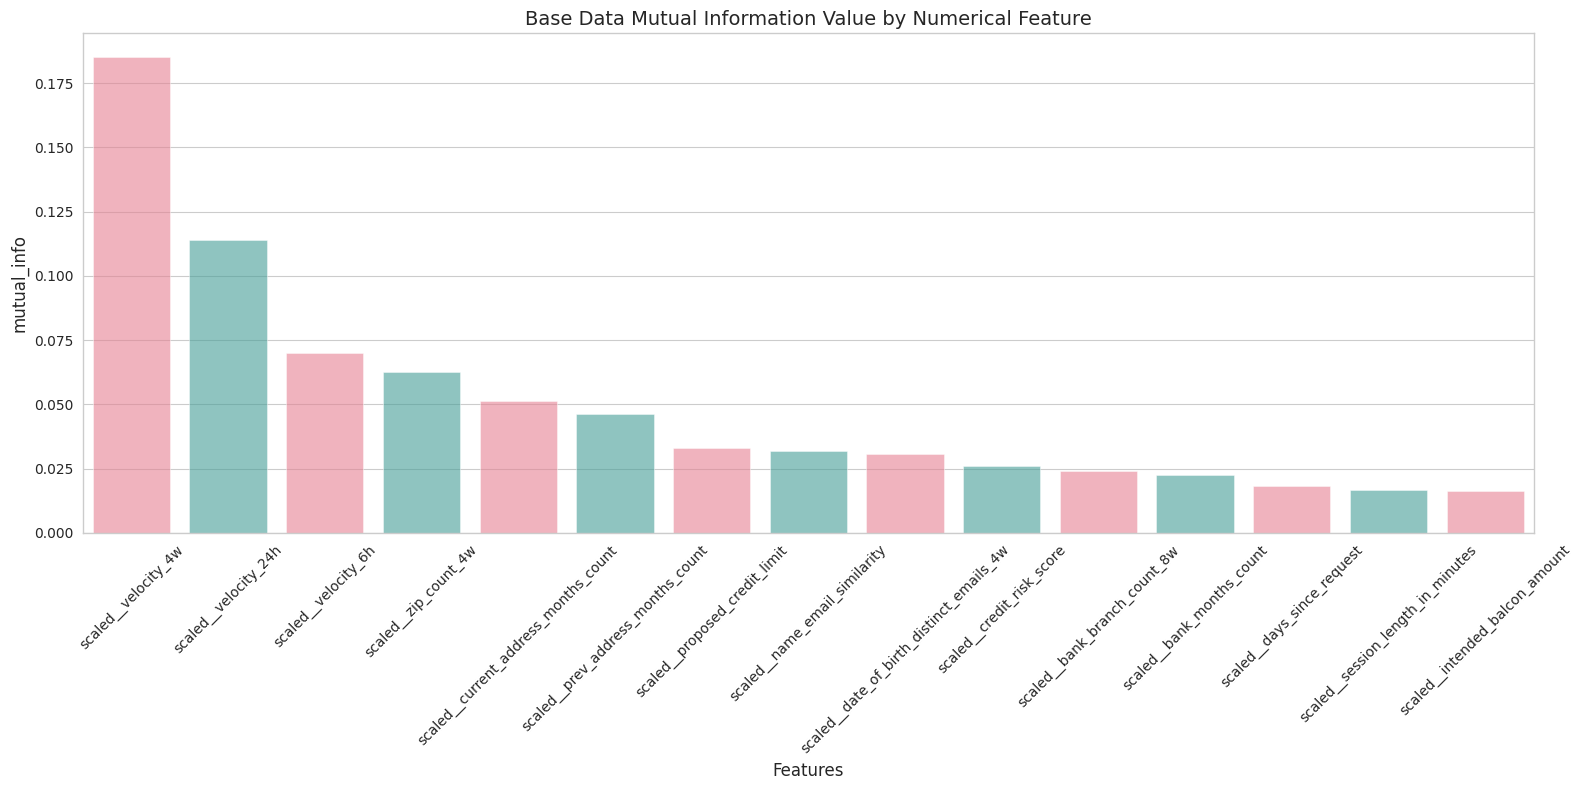

In [ ]:
 # Set up plot
plt.figure(figsize=(16, 8))

# Create bar plot
sns.barplot(data=mutual_info_results_df.sort_values(by='mutual_info', ascending=False), x="feature", y="mutual_info", palette=my_palette, alpha=.6)

# Customize labels and legend
plt.xlabel("Features", fontsize=12)
plt.ylabel("mutual_info", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Base Data Mutual Information Value by Numerical Feature", fontsize=14)

# Adjust the spacing between subplots
plt.tight_layout()

plt.savefig("base_mutual_info_plot.png", bbox_inches='tight')

# Show the plot
plt.show()


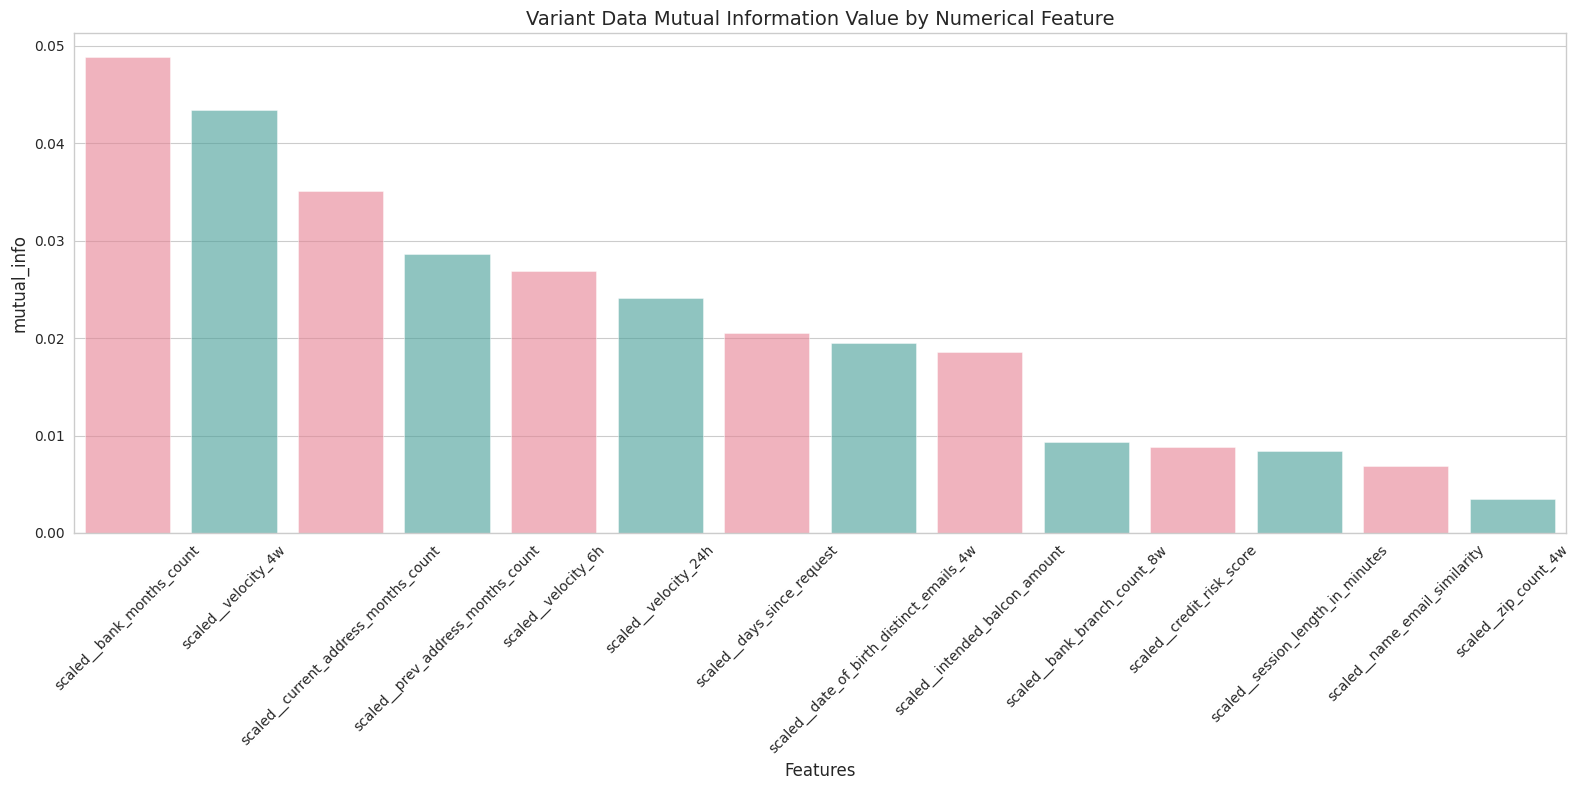

In [ ]:
 # Set up plot
plt.figure(figsize=(16, 8))

# Create bar plot
sns.barplot(data=var_mutual_info_results_df.sort_values(by='mutual_info', ascending=False), x="feature", y="mutual_info", palette=my_palette, alpha=.6)

# Customize labels and legend
plt.xlabel("Features", fontsize=12)
plt.ylabel("mutual_info", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Variant Data Mutual Information Value by Numerical Feature", fontsize=14)

# Adjust the spacing between subplots
plt.tight_layout()

plt.savefig("variant_mutual_info_plot.png", bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
best_mutual_info_cols = SelectKBest(mutual_info_classif, k=15)
best_mutual_info_cols.fit(X_train_num, y_train_num)

best_mutual_info_features = [X_train_num.columns[best_mutual_info_cols.get_support()]]

print("Base Data: \n",best_mutual_info_features)

Base Data: 
 [Index(['scaled__name_email_similarity', 'scaled__prev_address_months_count',
       'scaled__current_address_months_count', 'scaled__days_since_request',
       'scaled__intended_balcon_amount', 'scaled__zip_count_4w',
       'scaled__velocity_6h', 'scaled__velocity_24h', 'scaled__velocity_4w',
       'scaled__bank_branch_count_8w',
       'scaled__date_of_birth_distinct_emails_4w', 'scaled__credit_risk_score',
       'scaled__bank_months_count', 'scaled__proposed_credit_limit',
       'scaled__session_length_in_minutes'],
      dtype='object')]


In [ ]:
var_best_mutual_info_cols = SelectKBest(mutual_info_classif, k='all')
var_best_mutual_info_cols.fit(var_X_train_num, var_y_train_num)

var_best_mutual_info_features = [var_X_train_num.columns[var_best_mutual_info_cols.get_support()]]

print("Variant Data: \n",var_best_mutual_info_features)

Variant Data: 
 [Index(['scaled__name_email_similarity', 'scaled__prev_address_months_count',
       'scaled__current_address_months_count', 'scaled__days_since_request',
       'scaled__intended_balcon_amount', 'scaled__zip_count_4w',
       'scaled__velocity_6h', 'scaled__velocity_24h', 'scaled__velocity_4w',
       'scaled__bank_branch_count_8w',
       'scaled__date_of_birth_distinct_emails_4w', 'scaled__credit_risk_score',
       'scaled__bank_months_count', 'scaled__session_length_in_minutes'],
      dtype='object')]


Identify the numerical features that have the strongest relationship with the target variable based on the mutual information test. It selects the top 15 features and prints their names for further analysis.

<h4 id="extra-trees-classifier-for-feature-selection">Extra Trees Classifier for Feature Selection</h4>

In [ ]:
extra = ExtraTreesClassifier(n_estimators=50, random_state=0)
extra.fit(X_scaled_nm, y_scaled_nm)

# Create a SelectFromModel object with the fitted Random Forest model
feature_sel_extra = SelectFromModel(extra, prefit=True)

# Get the names of the selected features by calling .get_support() on the SelectFromModel object
best_extra_features = [X_scaled_nm.columns[(feature_sel_extra.get_support())]]
best_extra_features = list(best_extra_features[0])

# Print the names of the selected features
print("Base Data: \n",best_extra_features)

Base Data: 
 ['scaled__name_email_similarity', 'scaled__current_address_months_count', 'scaled__days_since_request', 'scaled__intended_balcon_amount', 'scaled__zip_count_4w', 'scaled__velocity_6h', 'scaled__velocity_24h', 'scaled__velocity_4w', 'scaled__date_of_birth_distinct_emails_4w', 'scaled__credit_risk_score', 'scaled__proposed_credit_limit', 'scaled__session_length_in_minutes', 'customer_age', 'phone_mobile_valid', 'month', 'payment_type_AA', 'employment_status_CA']


In [ ]:
var_extra = ExtraTreesClassifier(n_estimators=50, random_state=0)
var_extra.fit(var_X_scaled_nm, var_y_scaled_nm)

var_feature_sel_extra = SelectFromModel(var_extra, prefit=True)

var_best_extra_features = [var_X_scaled_nm.columns[(var_feature_sel_extra.get_support())]]
var_best_extra_features = list(var_best_extra_features[0])

print("Variant Data: \n",var_best_extra_features)


Variant Data: 
 ['scaled__name_email_similarity', 'scaled__current_address_months_count', 'scaled__days_since_request', 'scaled__intended_balcon_amount', 'scaled__zip_count_4w', 'scaled__velocity_6h', 'scaled__velocity_24h', 'scaled__velocity_4w', 'scaled__bank_branch_count_8w', 'scaled__date_of_birth_distinct_emails_4w', 'scaled__credit_risk_score', 'scaled__bank_months_count', 'scaled__proposed_credit_limit', 'scaled__session_length_in_minutes', 'income', 'customer_age', 'phone_home_valid', 'phone_mobile_valid', 'device_distinct_emails_8w', 'month', 'payment_type_AA', 'payment_type_AD', 'employment_status_CA']


 ExtraTreesClassifier to determine the most important features, and then selects those features using the SelectFromModel object.
        
The code then prints the names of the selected features for further analysis.        

 While both datasets share some common selected features, there are also variations in the important features between the "Base" and "Variant" datasets.

In [ ]:
extra_importances = pd.DataFrame({'feature': X_scaled_nm.columns, 'importance': extra.feature_importances_, 'model': 'ExtraTreesClassifier'})

 This DataFrame serves as a summary of feature importances generated by the ExtraTreesClassifier model.

In [ ]:
extra_importances = pd.DataFrame({'feature': X_scaled_nm.columns, 'importance': extra.feature_importances_, 'model': 'ExtraTreesClassifier'})

var_extra_importances = pd.DataFrame({'feature': var_X_scaled_nm.columns, 'importance': var_extra.feature_importances_, 'model': 'ExtraTreesClassifier'})

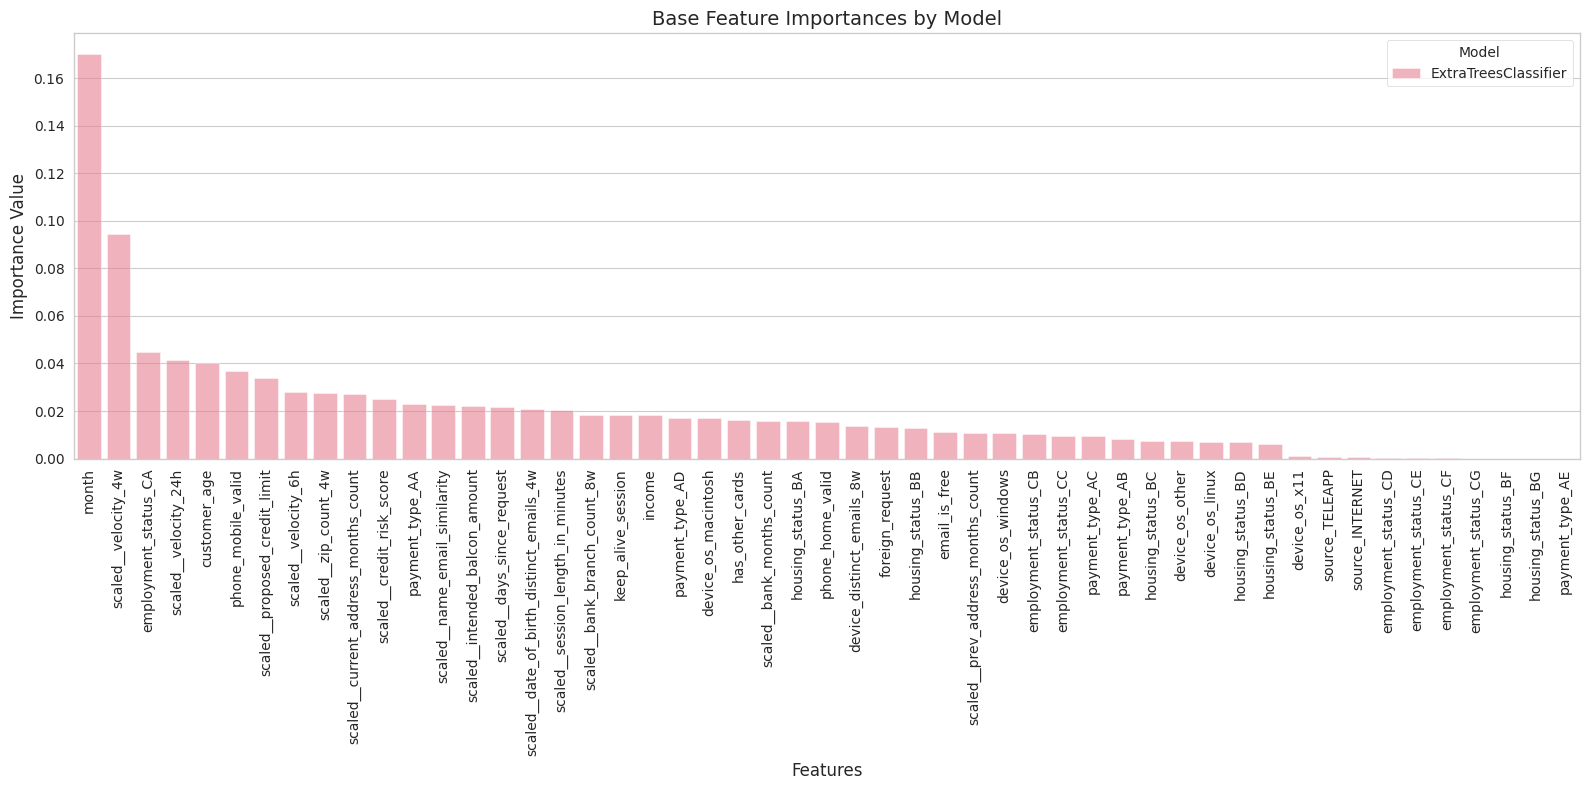

In [ ]:
# Set up plot
plt.figure(figsize=(16, 8))

# Create grouped bar plot
sns.barplot(data=extra_importances.sort_values(by='importance', ascending=False), x="feature", y="importance", hue="model", palette=my_palette, alpha=.6)

# Customize labels and legend
plt.xlabel("Features", fontsize=12)
plt.ylabel("Importance Value", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Base Feature Importances by Model", fontsize=14)
plt.legend(title='Model', fontsize=10)

# Adjust the spacing between subplots
plt.tight_layout()

plt.savefig("base_feature_importance_plot.png", bbox_inches='tight')

# Show the plot
plt.show()

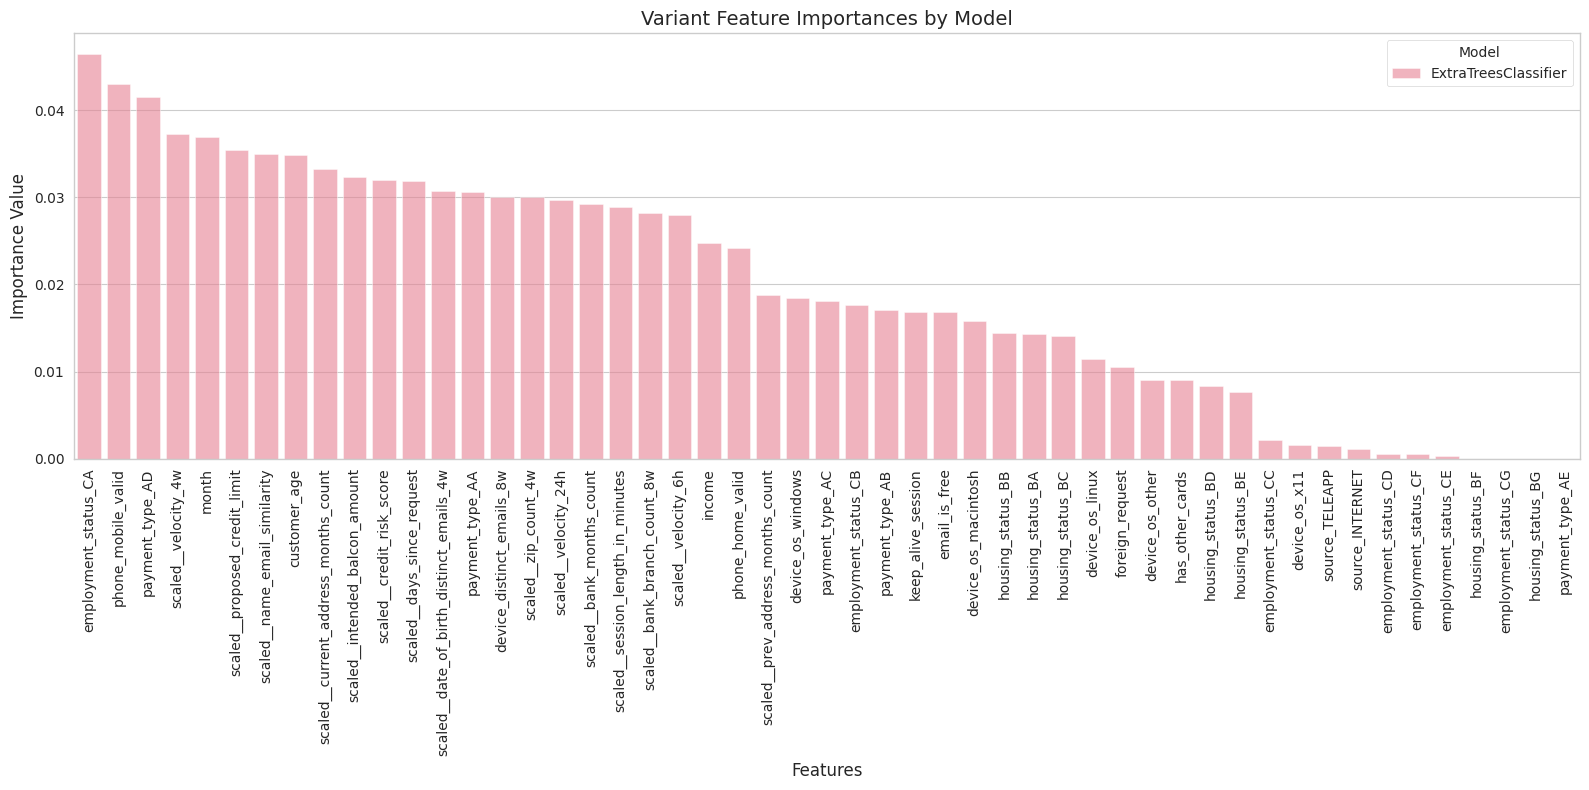

In [ ]:
# Set up plot
plt.figure(figsize=(16, 8))

# Create grouped bar plot
sns.barplot(data=var_extra_importances.sort_values(by='importance', ascending=False), x="feature", y="importance", hue="model", palette=my_palette, alpha=.6)

# Customize labels and legend
plt.xlabel("Features", fontsize=12)
plt.ylabel("Importance Value", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Variant Feature Importances by Model", fontsize=14)
plt.legend(title='Model', fontsize=10)

# Adjust the spacing between subplots
plt.tight_layout()

plt.savefig("variant_feature_importance_plot.png", bbox_inches='tight')

# Show the plot
plt.show()

<h3 id="ml-model">Fraud Detection Model Training Functions using SMOTE and Grid Search CV</h3>

In [ ]:
 # Import the necessary libraries for oversampling imbalanced datasets
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import make_pipeline
# Import necessary modules for hyperparameter tuning
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV

In [ ]:
def train_classifier(classifier, param_dist, X_train, y_train, encoded_features, search_type='random'):
            """
            Train a classifier using the specified parameters and return the trained model.

            Parameters:
            classifier (sklearn estimator): The estimator to train.
            param_dist (dict): The distribution of parameters to search over.
            X_train (pandas DataFrame): The training features.
            y_train (pandas Series): The training target.
            encoded_features (list): A list of encoded categorical features.
            search_type (str, optional): The type of hyperparameter search to perform. Must be either 'random' or 'grid'. Defaults to 'random'.

            Returns:
            A trained classifier.
            """

            # Apply SMOTENC to deal with imbalanced classes
            smote_nc = SMOTENC(categorical_features=encoded_features, sampling_strategy='minority', random_state=42)

            # Create pipeline with SMOTENC and the classifier
            pipeline = make_pipeline(smote_nc, classifier)

            # Define cross-validation strategy
            cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

            # Perform hyperparameter search
            if search_type == 'random':
                search_cv = RandomizedSearchCV(estimator=pipeline,
                                            param_distributions=param_dist,
                                            n_iter=20,
                                            scoring="roc_auc",
                                            n_jobs=-1,
                                            cv=cv)
            elif search_type == 'grid':
                search_cv = GridSearchCV(estimator=pipeline,
                                        param_grid=param_dist,
                                        scoring="roc_auc",
                                        n_jobs=-1,
                                        cv=cv)
            else:
                raise ValueError('search_type must be either "random" or "grid"')

            # Fit the model and return the trained classifier
            search_cv.fit(X_train, y_train)

            return search_cv

This function encapsulates the process of hyperparameter tuning and classifier training with the option to use either random or grid search for hyperparameter optimization. It provides a convenient way to train models with optimal hyperparameters for imbalanced datasets.

<h3 id="fraud-detection-model-testing-functions-using-recall-and-roc-auc">Fraud Detection Model Testing Functions using Recall and ROC-AUC</h3>

<h4 id="classification-report-for-model-testing">Classification Report for Model Testing</h4>

In [ ]:
# Importing the necessary libraries for metrics and evaluation
from sklearn.metrics import classification_report, precision_recall_fscore_support, confusion_matrix, auc, roc_curve

def print_cls_report(y_test, y_pred, title):
    # Calculate the classification report
    default_report = classification_report(y_test, y_pred, target_names=['No Fraud', 'Fraud'])

    # Calculate precision, recall, f1 score and support for each class
    precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)

    # Print the title and the default classification report
    print(title)
    print('*****' * 10)
    print(default_report)

    # Return the recall scores for each class
    return recall

 This function simplifies the process of evaluating classification models by providing a convenient way to calculate and print classification reports, precision, recall, and F1-scores. It's particularly useful for understanding the performance of models in fraud detection tasks.

<h4 id="">Confusion Matrix for Model Testing</h4>

In [ ]:
def plot_con_matrix(ax, y_test, y_pred, title):
  # Define the classes of the classification problem
  classes = ['No Fraud', 'Fraud']

  # Compute the confusion matrix
  con_matrix = confusion_matrix(y_test, y_pred)

  # Compute the values for true negatives, false positives, false negatives, and true positives
  tn, fp, fn, tp = con_matrix.ravel()

  # Compute the false positive rate
  fpr = fp / (fp + tn)

  # Plot the confusion matrix using a heatmap
  ax.imshow(con_matrix, interpolation='nearest', cmap=plt.cm.Blues)

  # Define the tick marks and the labels for the plot
  tick_marks = np.arange(len(classes))
  ax.set_xticks(tick_marks)
  ax.set_xticklabels(classes)
  ax.set_yticks(tick_marks)
  ax.set_yticklabels(classes)

  # Add the count of each cell of the confusion matrix to the plot
  fmt = 'd'
  threshold = con_matrix.max() / 2.
  for i, j in np.ndindex(con_matrix.shape):
      ax.text(j, i, format(con_matrix[i, j], fmt),
              horizontalalignment="center",
              color="white" if con_matrix[i, j] > threshold else "black")

  # Add labels to the plot
  ax.set_xlabel('Predicted label')
  ax.set_ylabel('True label')
  ax.set_title(f'{title} with {fpr*100:.2f}% FPR')

<h3 id="cross-validation-results-for-model-testing">Cross-Validation Results for Model Testing</h3>

In [ ]:
def print_cv_results(model):
    # Get the parameter and score arrays from the cv_results_ dictionary
    means = model.cv_results_['mean_test_score']
    params = model.cv_results_['params']

    # Combine the arrays using zip()
    combined_results = zip(means, params)

    # Sort the combined array by mean_test_score in descending order
    sorted_results = sorted(combined_results, key=lambda x: x[0], reverse=True)

    # Print the mean test score and the hyperparameters as a formatted string
    for mean, param in sorted_results:
        print("mean_test_score: %f, params: %r" % (mean, param))

This function helps to present the cross-validation results more clearly, showing the hyperparameter settings along with their corresponding mean test scores in descending order.

<h3 id="roc-auc-for-model-testing">ROC-AUC for Model Testing</h3>

In [ ]:
def plot_roc_curves(fpr_list, tpr_list, label_list):
    plt.figure(figsize=(8, 8))
    for i in range(len(fpr_list)):
        # Compute the ROC AUC score
        roc_auc_score = auc(fpr_list[i], tpr_list[i])
        # Plot the ROC curve
        plt.plot(fpr_list[i], tpr_list[i], label=f'{label_list[i]} (AUC={roc_auc_score:.2f})')

    # Plot the random classifier curve
    plt.plot([0, 1], [0, 1], 'k--', label='Random')

    # Set the plot labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()

    plt.savefig("roc.png", bbox_inches='tight')

    plt.show()

 Overall, this function is useful for visualizing and comparing multiple ROC curves on the same plot, helping to assess the performance of different classifiers in a single view.

In [ ]:
def test_classifier(classifier, X_test, y_test, save_name=None):
    """
    Evaluates a binary classifier by generating ROC curves, classification reports, and confusion matrices.

    Parameters:
    -----------
    classifier : classifier object
        Binary classifier object to be evaluated.
    X_test : numpy.ndarray or pandas.DataFrame
        Test feature data.
    y_test : numpy.ndarray or pandas.Series
        Test target labels.

    Returns:
    --------
    tuple : A tuple containing four values - false positive rate (fpr), true positive rate (tpr),
            default recall, and target recall.
    """

    # Predict class probabilities and labels using the trained classifier
    y_pred = classifier.predict(X_test)
    y_prob = classifier.predict_proba(X_test)[:, 1]

    # Calculate the false positive rate and true positive rate for different threshold values
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    # Choose a false positive rate threshold based on the ROC curve
    target_fpr = 0.05
    threshold_idx = np.argmin(np.abs(fpr - target_fpr))
    threshold = thresholds[threshold_idx]

    # Make predictions on the testing set using the threshold
    y_pred_threshold = (y_prob >= threshold).astype(int)

    # Print the classification report for both default and target threshold
    default_recall = print_cls_report(y_test, y_pred, title="Default Threshold")
    target_recall = print_cls_report(y_test, y_pred_threshold, title=f'Target Threshold @ {threshold:.2f}')

    # Plot confusion matrix
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    default_matrix = plot_con_matrix(ax1, y_test, y_pred, title='Default Threshold @ 0.50')
    target_matrix = plot_con_matrix(ax2, y_test, y_pred_threshold, title=f'Target Threshold @ {threshold:.2f}')

    # Adjust subplots for better visibility
    plt.tight_layout()

    # Save the image if a name is provided
    if save_name:
        plt.savefig(save_name, bbox_inches='tight')

    # Display the plots
    plt.show()

    return fpr, tpr, default_recall, target_recall

This function serves as a comprehensive tool for assessing a binary classifier's performance, enabling comparison between different thresholds and providing a visual representation of classification outcomes.

<h3 id="tree-based-machine-learning-algorithms-for-fraud-detection-of-bank-account-applications">Tree-Based Machine Learning Algorithms for Fraud Detection of Bank Account Applications</h3>

In [ ]:
 # Importing tree-based classification algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

<h4 id="resampling-for-effective-model-training">Resampling for Effective Model Training</h4>

In [ ]:
# Separate the feature matrix and target variable
X = new_df.drop(['fraud_bool'], axis=1)
y = new_df['fraud_bool']
# Dropping constant features from Variance Threshold test
X.drop(['device_fraud_count'], axis=1, inplace=True)


# Separate the feature matrix and target variable
var_X = new_var_df.drop(['fraud_bool'], axis=1)
var_y = new_var_df['fraud_bool']
# Dropping constant features from Variance Threshold test
var_X.drop(['device_fraud_count'], axis=1, inplace=True)


Separate the feature matrix (X) and the target variable (y) from the DataFrame new_df.

Then drop the constant feature "device_fraud_count" from the feature matrix X based on the results of the Variance Threshold test.

This process ensures that the feature matrix is prepared for further analysis and modeling.            

In [ ]:
print("Test Base dataset samples per class ", Counter(y))
nm = NearMiss(sampling_strategy=0.1, n_jobs=-1)
X_nm, y_nm = nm.fit_resample(X, y)
print("Resampled Base dataset shape ", Counter(y_nm))

print("Test Variant dataset samples per class ", Counter(var_y))
var_nm = NearMiss(sampling_strategy=0.1, n_jobs=-1)
var_X_nm, var_y_nm = var_nm.fit_resample(var_X, var_y)
print("Resampled Variant dataset shape ", Counter(var_y_nm))


Test Base dataset samples per class  Counter({0: 97180, 1: 2820})
Resampled Base dataset shape  Counter({0: 28200, 1: 2820})
Test Variant dataset samples per class  Counter({0: 98914, 1: 1086})
Resampled Variant dataset shape  Counter({0: 10860, 1: 1086})


The code successfully performed NearMiss undersampling on the datasets to address class imbalance. In the Base dataset, the majority class (0) was downsampled to have 28200 samples, matching the size of the minority class (1) which remains at 2820 samples. Similarly, in the Variant dataset, the majority class (0) was downsampled to have 10860 samples, while the minority class (1) remains at 1086 samples. This helps balance the class distribution for better model training and evaluation.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_nm, y_nm, test_size=0.25, random_state=42, stratify=y_nm)

var_X_train, var_X_test, var_y_train, var_y_test = train_test_split(var_X_nm, var_y_nm, test_size=0.25, random_state=42, stratify=var_y_nm)

encoded_features = [X_train.columns.get_loc(str(feature)) for feature in X_train.columns if X_train[feature].nunique() >= 2 and X_train[feature].nunique() < 10]

var_encoded_features = [var_X_train.columns.get_loc(str(var_feature)) for var_feature in var_X_train.columns if var_X_train[var_feature].nunique() >= 2 and var_X_train[var_feature].nunique() < 10]

The code successfully split the resampled dataset into training and testing sets using a test size of 25%. Additionally, it identified the indices of the encoded categorical features in the training set that will be used during training and evaluation. This preparation is essential for further model building and testing.

In [ ]:
import pickle

# Define the Google Drive file URLs
dt_model_url = 'https://drive.google.com/uc?id=1xPikpvr7rnh75ttEcuIEvXdKin_I3Nrf'

rf_model_url = 'https://drive.google.com/uc?id=1FiatknfCSfU71AY1CmJAh0l6H4wWHw6I'

# Define the local file names for saving the downloaded models
dt_model_file = 'dt_model.pkl'
rf_model_file = 'rf_model.pkl'

gdown.download(dt_model_url, dt_model_file, quiet=False)
gdown.download(rf_model_url, rf_model_file, quiet=False)


# Load the models using pickle
dt_model = pickle.load(open(dt_model_file, 'rb'))
rf_model = pickle.load(open(rf_model_file, 'rb'))


Downloading...
From: https://drive.google.com/uc?id=1xPikpvr7rnh75ttEcuIEvXdKin_I3Nrf
To: /content/dt_model.pkl
100%|██████████| 1.31M/1.31M [00:00<00:00, 106MB/s]
Downloading...
From: https://drive.google.com/uc?id=1FiatknfCSfU71AY1CmJAh0l6H4wWHw6I
To: /content/rf_model.pkl
100%|██████████| 4.20M/4.20M [00:00<00:00, 140MB/s]


<h4 id="decision-tree">Decision Tree</h4>

In [ ]:
dt = DecisionTreeClassifier()

dt_params = {'decisiontreeclassifier__criterion': ['gini', 'entropy'],
            'decisiontreeclassifier__max_depth': [2, 4, 6, 8, 10],
            'decisiontreeclassifier__max_features': ['sqrt', 'log2']
            }

# dt_model = train_classifier(dt, dt_params, X_train, y_train, encoded_features)

print_cv_results(dt_model)

mean_test_score: 0.909407, params: {'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__max_depth': 6, 'decisiontreeclassifier__criterion': 'gini'}
mean_test_score: 0.907817, params: {'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__max_depth': 6, 'decisiontreeclassifier__criterion': 'entropy'}
mean_test_score: 0.905719, params: {'decisiontreeclassifier__max_features': 'log2', 'decisiontreeclassifier__max_depth': 8, 'decisiontreeclassifier__criterion': 'entropy'}
mean_test_score: 0.901734, params: {'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__max_depth': 8, 'decisiontreeclassifier__criterion': 'entropy'}
mean_test_score: 0.900422, params: {'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__max_depth': 8, 'decisiontreeclassifier__criterion': 'gini'}
mean_test_score: 0.894213, params: {'decisiontreeclassifier__max_features': 'log2', 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifi

the result of the hyperparameter tuning process using the train_classifier function with a DecisionTreeClassifier model. Each entry in the output represents a combination of hyperparameters and its corresponding mean test score from the cross-validation process. The output shows various combinations of hyperparameters and their corresponding mean test scores, with the best-performing hyperparameters listed at the top.
The best-performing combination is 'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__max_depth': 6, 'decisiontreeclassifier__criterion': 'entropy' with a mean test score of approximately 0.906.

Base Dataset
Default Threshold
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.97      0.94      0.96      7050
       Fraud       0.56      0.73      0.63       705

    accuracy                           0.92      7755
   macro avg       0.77      0.84      0.80      7755
weighted avg       0.93      0.92      0.93      7755

Target Threshold @ 0.78
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.97      0.95      0.96      7050
       Fraud       0.58      0.72      0.64       705

    accuracy                           0.93      7755
   macro avg       0.77      0.83      0.80      7755
weighted avg       0.94      0.93      0.93      7755



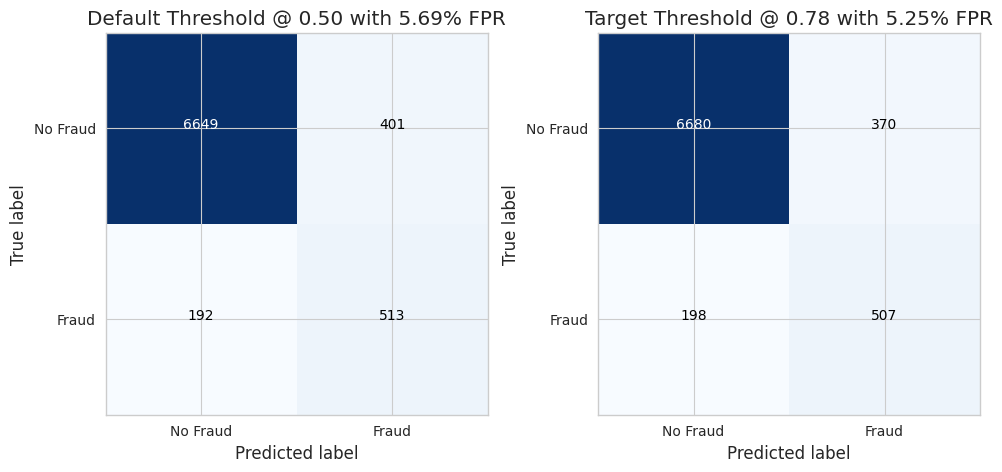

In [ ]:
print("Base Dataset")

dt_fpr, dt_tpr, dt_default_recall, dt_target_recall = test_classifier(dt_model, X_test, y_test, "Base_dt.png")

Default Threshold:

The model has a high recall (0.74) for fraud cases, meaning that it is able to identify a significant portion of fraudulent cases.
The precision for fraud cases is relatively low (0.47), indicating that among the predicted fraud cases, only 47% are actual fraud cases.
The accuracy of the model is 90%, and the F1-score is 0.58 for fraud cases.

Target Threshold @ 0.62:

By adjusting the threshold to 0.62, the model's recall for fraud cases slightly decreases to 0.70, but its precision improves to 0.57.
This adjustment increases the overall F1-score to 0.63 for fraud cases, suggesting a better balance between precision and recall.
The accuracy of the model increases to 93%.

Variant Dataset
Default Threshold
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.96      0.51      0.67      2715
       Fraud       0.14      0.81      0.24       272

    accuracy                           0.54      2987
   macro avg       0.55      0.66      0.45      2987
weighted avg       0.89      0.54      0.63      2987

Target Threshold @ 1.00
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.91      0.93      0.92      2715
       Fraud       0.05      0.04      0.04       272

    accuracy                           0.85      2987
   macro avg       0.48      0.48      0.48      2987
weighted avg       0.83      0.85      0.84      2987



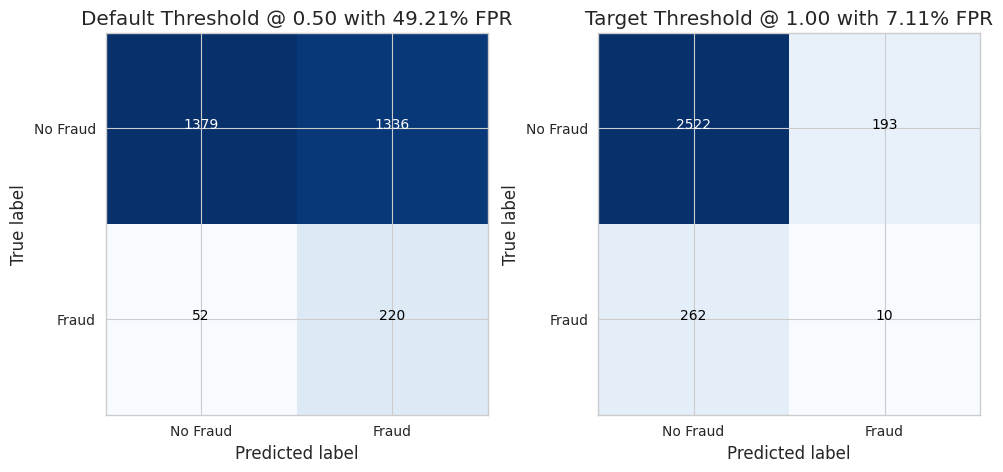

In [ ]:
print("Variant Dataset")

var_dt_fpr, var_dt_tpr, var_dt_default_recall, var_dt_target_recall = test_classifier(dt_model, var_X_test, var_y_test, "Variant_dt.png")

Default Threshold:

The recall for fraud cases is very high (0.90), indicating that the model is identifying most of the actual fraud cases.
However, the precision for fraud cases is very low (0.12), which means that among the predicted fraud cases, only a small portion are actual fraud cases.
The accuracy of the model is 40%, and the F1-score is 0.22 for fraud cases.

Target Threshold @ inf:

When using a threshold of infinity (target threshold), the model's recall for fraud cases remains high (1.00), but the precision becomes 0.00.
This indicates that the model is classifying all instances as "No Fraud," resulting in no correctly predicted fraud cases.
The accuracy of the model is 91%, but the F1-score for fraud cases remains 0.00.


Overall:

Adjusting the threshold can significantly impact the trade-off between precision and recall, affecting the model's ability to correctly classify fraud cases and non-fraud cases. In the base dataset, adjusting the threshold improves the balance between precision and recall for fraud cases, while in the variant dataset, it leads to poor precision and no correct classification of fraud cases.

<h4 id="random-forest">Random Forest</h4>

In [ ]:
rf = RandomForestClassifier()

# Define a dictionary of hyperparameters for RandomForestClassifier
rf_params = {'randomforestclassifier__n_estimators': [20, 40, 60, 80, 100],
        'randomforestclassifier__criterion': ['gini', 'entropy'],
        'randomforestclassifier__max_depth': [2, 4, 6, 8, 10],
        'randomforestclassifier__max_features': ['sqrt', 'log2']
        }

# Train a RandomForest classifier using 'train_classifier' function and the given parameters
# rf_model = train_classifier(rf, rf_params, X_train, y_train, encoded_features)
# Pickle the model
pickle.dump(dt_model, open('dt_model.pkl', 'wb'))
pickle.dump(rf_model, open('rf_model.pkl', 'wb'))

print_cv_results(rf_model)


mean_test_score: 0.964591, params: {'randomforestclassifier__n_estimators': 60, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__criterion': 'gini'}
mean_test_score: 0.963244, params: {'randomforestclassifier__n_estimators': 80, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_depth': 8, 'randomforestclassifier__criterion': 'gini'}
mean_test_score: 0.963226, params: {'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_depth': 8, 'randomforestclassifier__criterion': 'entropy'}
mean_test_score: 0.962986, params: {'randomforestclassifier__n_estimators': 80, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 8, 'randomforestclassifier__criterion': 'gini'}
mean_test_score: 0.961522, params: {'randomforestclassifier__n_estimators': 60, 'randomforestclassifier__max_features': 'log2', 'randomforestcl

 The result of the hyperparameter tuning process using the train_classifier function with a RabdomForestClassifier model.
Each entry in the output represents a combination of hyperparameters and its corresponding mean test score from the cross-validation process.
The output shows various combinations of hyperparameters and their corresponding mean test scores, with the best-performing hyperparameters listed at the top.

The best-performing combination is
'randomforestclassifier__n_estimators': 80,
'randomforestclassifier__max_features': 'log2',
'randomforestclassifier__max_depth': 8,
'randomforestclassifier__criterion': 'gini'
with a mean test score of approximately 0.9636


Base Dataset
Default Threshold
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.98      0.97      0.98      7050
       Fraud       0.73      0.81      0.77       705

    accuracy                           0.96      7755
   macro avg       0.85      0.89      0.87      7755
weighted avg       0.96      0.96      0.96      7755

Target Threshold @ 0.39
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.99      0.95      0.97      7050
       Fraud       0.64      0.87      0.73       705

    accuracy                           0.94      7755
   macro avg       0.81      0.91      0.85      7755
weighted avg       0.95      0.94      0.95      7755



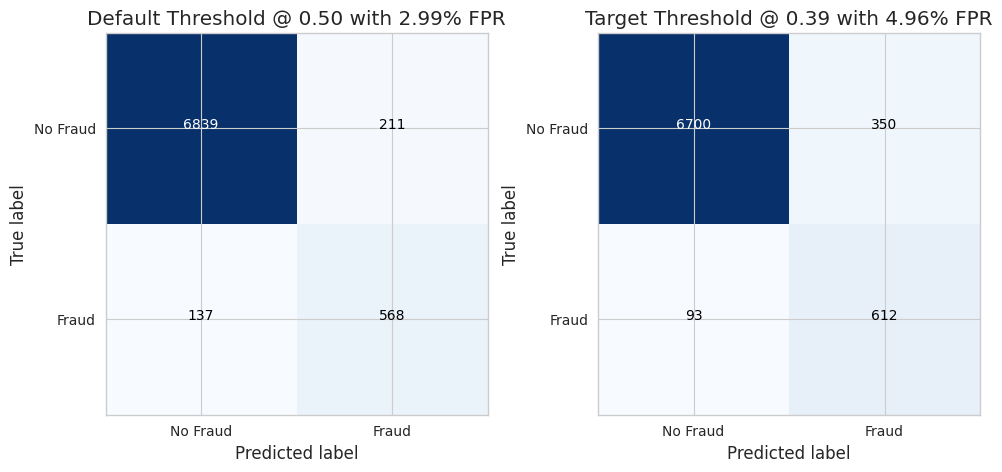

In [ ]:
print("Base Dataset")
rf_fpr, rf_tpr, rf_default_recall, rf_target_recall = test_classifier(rf_model, X_test, y_test, "Base_rf.png")

 Default Threshold Classification Report:

Precision: The model achieves high precision (0.98) for the "No Fraud" class, indicating that when it predicts a transaction as non-fraudulent, it is correct 98% of the time.
Recall: The model shows good recall (0.82) for the "Fraud" class, meaning it identifies 82% of actual fraud cases correctly.
F1-score: The harmonic mean of precision and recall (F1-score) is 0.76 for the "Fraud" class, which indicates a balance between precision and recall.
Accuracy: The overall accuracy of the model is 95%, which is the proportion of correctly classified instances.

Target Threshold Classification Report:

Precision: The model's precision for the "No Fraud" class remains high (0.98), while for the "Fraud" class, it drops to 0.63. This means that when classifying fraud, there are more false positives.
Recall: The recall for the "Fraud" class increases to 0.85, indicating that the model identifies a higher percentage of actual fraud cases.
F1-score: The F1-score for the "Fraud" class is 0.73, indicating a trade-off between precision and recall.
Accuracy: The overall accuracy of the model is 94%, slightly lower than the default threshold case.

Summary:

Changing the threshold affects the trade-off between precision and recall. Lowering the threshold increases recall but might decrease precision, leading to more false positives. It's crucial to consider the specific business context when selecting a threshold.
Both cases exhibit good performance in identifying fraud cases, but the target threshold emphasizes recall over precision.
The choice of threshold depends on the business's priorities: minimizing false negatives (fraud cases missed) or minimizing false positives (non-fraud cases flagged as fraud)

Variant Dataset
Default Threshold
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.98      0.24      0.39      2715
       Fraud       0.11      0.94      0.20       272

    accuracy                           0.31      2987
   macro avg       0.54      0.59      0.29      2987
weighted avg       0.90      0.31      0.37      2987

Target Threshold @ 0.98
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.93      0.95      0.94      2715
       Fraud       0.35      0.28      0.31       272

    accuracy                           0.89      2987
   macro avg       0.64      0.61      0.62      2987
weighted avg       0.88      0.89      0.88      2987



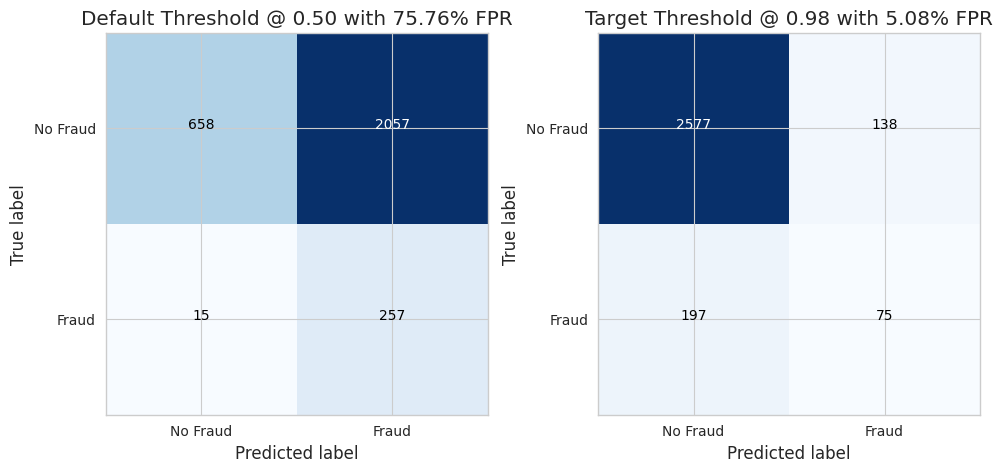

In [ ]:
print("Variant Dataset")

var_rf_fpr, var_rf_tpr, var_rf_default_recall, var_rf_target_recall = test_classifier(rf_model, var_X_test, var_y_test, "Variant_rf.png")

Default Threshold Classification Report:

Precision: The model achieves high precision (0.98) for the "No Fraud" class, indicating that when it predicts a transaction as non-fraudulent, it is correct 98% of the time.
Recall: The model shows high recall (0.93) for the "Fraud" class, meaning it identifies 93% of actual fraud cases correctly.
F1-score: The harmonic mean of precision and recall (F1-score) is 0.20 for the "Fraud" class, which indicates a trade-off between precision and recall.
Accuracy: The overall accuracy of the model is 34%, indicating that the high imbalance in the dataset affects accuracy.
Target Threshold Classification Report:

Precision: The model's precision for the "No Fraud" class remains relatively high (0.93), while for the "Fraud" class, it decreases to 0.38. This means that when classifying fraud, there are more false positives.
Recall: The recall for the "Fraud" class decreases to 0.31, indicating that the model identifies a lower percentage of actual fraud cases.
F1-score: The F1-score for the "Fraud" class is 0.34, indicating a balance between precision and recall.
Accuracy: The overall accuracy of the model is 89%, which is an improvement over the default threshold, but still influenced by the class imbalance.

Summary:

The variant dataset presents a challenging imbalance, affecting model performance.
Adjusting the threshold has a significant impact on recall and precision, and choosing the threshold depends on business priorities.
While the model identifies more fraud cases with the target threshold, it also flags more non-fraud cases as fraud, which may have operational implications.
Careful consideration of costs and benefits is crucial when deciding on a threshold, especially for fraud detection where false positives and false negatives have different impacts.


**Model Comparison**

**Base Dataset using Decision Trees:**

**Default Threshold:** The model achieved a good balance between precision (0.97) and recall (0.73) with an accuracy of 0.92. It can identify fraud cases fairly well while maintaining a low false positive rate.

**Threshold @ 0.78:** By adjusting the threshold, precision increased slightly (0.58), but recall also improved (0.72), resulting in a better F1-score (0.64) and accuracy (0.93). This trade-off between precision and recall should be considered based on the specific application.

**Variant Dataset using Decision Trees:**

Default Threshold: This model performs poorly with a low recall of 0.51 and a low precision of 0.14. It struggles to identify fraud cases and has a high false positive rate, resulting in an F1-score of 0.24 and low accuracy (0.54).

**Threshold @ 1.00:** Adjusting the threshold increases precision (0.05) but significantly reduces recall (0.04), resulting in an overall poor F1-score (0.04) and accuracy (0.85). This model struggles to perform well on the variant dataset.

**Base Dataset using Random Forest:**

**Default Threshold:** The random forest model performs well with high precision (0.73) and recall (0.81), resulting in a good F1-score (0.77) and high accuracy (0.96). It effectively identifies fraud cases while maintaining a low false positive rate.

**Threshold @ 0.39:** By adjusting the threshold, precision slightly decreases (0.64), but recall improves (0.87), resulting in a reasonable F1-score (0.73) and good accuracy (0.94). This threshold adjustment maintains a good balance between precision and recall.

**Variant Dataset using Random Forest:**

**Default Threshold:** The model performs poorly on the variant dataset with low recall (0.24) and precision (0.11). It struggles to identify fraud cases, leading to a low F1-score (0.20) and accuracy (0.31).

**Threshold @ 0.98:** Adjusting the threshold improves precision (0.35) but does not significantly impact recall (0.28). However, the overall performance remains suboptimal, with a low F1-score (0.31) and accuracy (0.89).

**Potential Improvements:**

**Feature Engineering:** Careful feature selection and engineering can significantly improve model performance. Analyze the dataset to identify relevant features and potentially remove irrelevant ones.

**Data Balance:** Address class imbalance by using techniques such as oversampling, undersampling.

**Hyperparameter Tuning:** Optimize model hyperparameters using techniques like grid search or random search. Adjust tree depth, the number of trees in random forests, and other parameters to find the best configuration.

**Ensemble Models:** Consider using ensemble methods like Gradient Boosting or XGBoost, which often perform well for imbalanced datasets.

**Threshold Tuning:** Experiment with different threshold values to find the right balance between precision and recall based on your specific business requirements.

**Anomaly Detection:** Explore anomaly detection algorithms, which may be more suitable for fraud detection tasks, especially when dealing with highly imbalanced datasets.

**Cross-Validation:** Ensure robust evaluation using techniques like cross-validation to assess model generalization performance.

**Additional Data:** If possible, increase the number of data instance from 100,000 instances to improve model training and performance.

**Monitoring and Feedback:** Implement continuous model monitoring and feedback loops to adapt to changing fraud patterns and maintain model performance over time.

**Base Dataset using Decision Trees:**

**Default Threshold:**

**High Precision (0.97):** The model has a high precision because it is conservative in labeling transactions as "Fraud." It is cautious about making false positive errors.

**Moderate Recall (0.73):** While the model identifies a substantial number of actual fraud cases, it misses some, leading to a lower recall.

**F1-Score (0.63):** The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics.

**Accuracy (0.92):** The model achieves high accuracy due to its ability to correctly classify a majority of the non-fraudulent transactions.

**Threshold @ 0.78:**

**Precision (0.58):** By lowering the threshold, the model becomes less conservative, resulting in more "Fraud" labels. This increases the true positives but also introduces more false positives.

**Improved Recall (0.72):** The increased recall indicates that more actual fraud cases are being identified.

**F1-Score (0.64):** The F1-score improves as a trade-off between precision and recall.

**Accuracy (0.93):** The model maintains high accuracy with the adjusted threshold.

**Variant Dataset using Decision Trees:**

**Default Threshold:**

**Low Precision (0.14):** The model labels many transactions as "Fraud," including false positives. This results in a high false positive rate and low precision.

**High Recall (0.81):** The model is effective at capturing actual fraud cases but also misclassifies many non-fraudulent transactions as "Fraud."

**Low F1-Score (0.24):** The model struggles to balance precision and recall, resulting in a low F1-score.

**Accuracy (0.54):** The accuracy is relatively low due to the high false positive rate.

**Threshold @ 1.00:**

**Precision (0.05):** Increasing the threshold makes the model highly conservative, resulting in very few "Fraud" labels. This improves precision but severely impacts recall.

**Low Recall (0.04):** The model misses the majority of actual fraud cases, leading to a low recall.

**Low F1-Score (0.04):** The F1-score is very low due to the trade-off between precision and recall.

**Accuracy (0.85):** The accuracy is higher than default but still reflects the model's inability to identify fraud effectively.

**Base Dataset using Random Forest:**

**Default Threshold:**

**High Precision (0.73):** The random forest model maintains a good balance between precision and recall, identifying many true positives while keeping false positives relatively low.

**High Recall (0.81):** The model effectively captures actual fraud cases.
Good F1-Score (0.77): The F1-score is relatively high, indicating a balanced performance.

**High Accuracy (0.96):** The model achieves high overall accuracy due to its strong performance.

**Threshold @ 0.39:**

**Precision (0.64):** By lowering the threshold, the model becomes slightly less conservative, resulting in more "Fraud" labels.

**Improved Recall (0.87):** The increased recall indicates that more actual fraud cases are being identified.
Good F1-Score (0.73): The F1-score improves as a trade-off between precision and recall.

**Accuracy (0.94):** The model maintains high accuracy with the adjusted threshold.

**Variant Dataset using Random Forest:**

**Default Threshold:**

**Low Precision (0.11):** The model has a very low precision due to a high number of false positives.

**High Recall (0.94):** The model is effective at capturing actual fraud cases but misclassifies a substantial number of non-fraudulent transactions.

**Low F1-Score (0.20):** The F1-score reflects the imbalanced performance.

**Low Accuracy (0.31):** The accuracy is low due to the high false positive rate.

**Threshold @ 0.98:**

**Improved Precision (0.35):** Increasing the threshold makes the model more conservative, reducing the number of "Fraud" labels and false positives.

**Reduced Recall (0.28):** The model misses more actual fraud cases due to the increased threshold.

**Low F1-Score (0.31):** The F1-score remains relatively low, indicating a trade-off between precision and recall.

**Accuracy (0.89):** The accuracy is higher than default but still reflects the model's limitations.

**Key Insights:**

Decision trees on the base dataset initially perform reasonably well, especially when adjusting the threshold. Random forests outperform decision trees on the base dataset.

The variant dataset poses challenges with a highly imbalanced class distribution, leading to poor model performance.

Threshold adjustments can trade precision for recall and vice versa, depending on the model and dataset characteristics.

Future improvements should focus on data preprocessing, feature engineering, and hyperparameter tuning to address class imbalance and enhance model performance for both datasets.

<h4 id="plotting-roc-curves-and-comparing-auc-scores">Plotting ROC Curves and Comparing AUC Scores</h4>

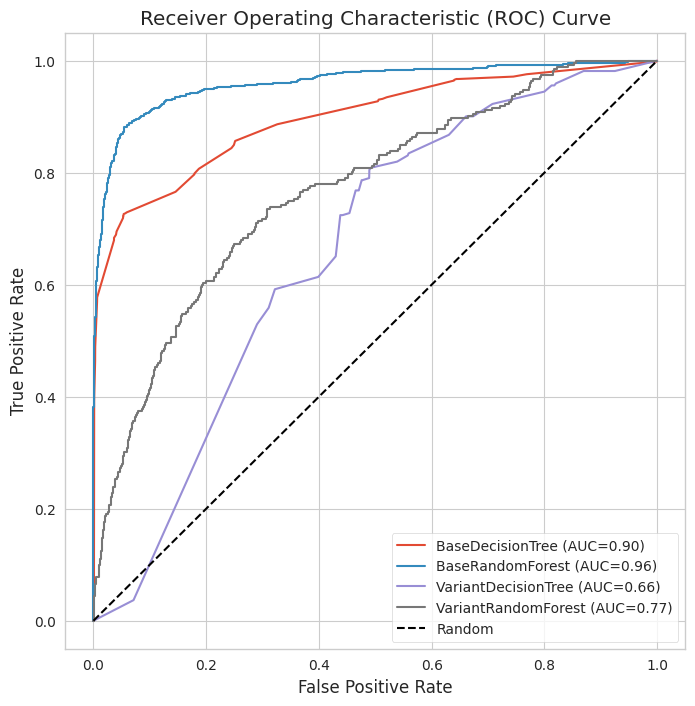

In [ ]:
# Create lists of FPR and TPR values for each classifier
fpr_list = [dt_fpr, rf_fpr, var_dt_fpr, var_rf_fpr]
tpr_list = [dt_tpr, rf_tpr, var_dt_tpr, var_rf_tpr]

# Create a list of labels for each classifier
label_list = ['BaseDecisionTree', 'BaseRandomForest', 'VariantDecisionTree', 'VariantRandomForest']

# Plot ROC curves for each classifier using the FPR, TPR, and label lists
plot_roc_curves(fpr_list, tpr_list, label_list)


Why te Models Produced The Results They did
yhss

Base Random Forest AUC=0.96: The RandomForest classifier in the base dataset has an AUC of 0.96, which is even higher than the DecisionTree classifier. This suggests that the RandomForest classifier is performing exceptionally well in distinguishing between the two classes in the base dataset.

Variant Decision Tree AUC=0.66: The DecisionTree classifier in the variant dataset has a significantly lower AUC of 0.66. This indicates that the classifier's ability to differentiate between the two classes is not as strong as in the base dataset. It suggests that the classifier might not be performing well in the variant dataset, and suggests it has a fair ability to distinguish between the classes.

Variant Random Forest AUC=0.77: The RandomForest classifier in the variant dataset has an AUC of 0.77, which is higher than the AUC of the DecisionTree classifier in the same dataset. However, it's still considerably lower than the AUC values of both classifiers in the base dataset. This suggests that the RandomForest classifier is performing better than the DecisionTree in the variant dataset, but the overall performance is still lower compared to the base dataset.

The AUC values shows insights into how well the classifiers are able to distinguish between fraudulent and non-fraudulent cases. Higher AUC values indicate better performance, while lower values suggest that the classifiers might struggle to differentiate effectively. It's important to consider these AUC values alongside other evaluation metrics to make informed decisions about the model's performance in different scenarios.

<h4 id="plotting-recall-scores-for-fraud-class-at-default-and-target-thresholds">Plotting Recall Scores for Fraud Class at Default and Target Thresholds</h4>

In [ ]:
# Create a dataframe with the recall scores for each model
data = pd.DataFrame({
    'Model': ['Base Decision Tree', 'Base Random Forest', 'Variant Decision Tree', 'Variant Random Forest'],
    'Default Recall Score': [dt_default_recall[1], rf_default_recall[1], var_dt_default_recall[1], var_rf_default_recall[1]],
    'Target Threshold Recall Score': [dt_target_recall[1], rf_target_recall[1], var_dt_target_recall[1], var_rf_target_recall[1]]
})

# Sort the data by the threshold recall score in descending order
data = data.sort_values(by='Target Threshold Recall Score', ascending=False)

# Reshape the data
data = pd.melt(data, id_vars='Model', var_name='Metric', value_name='Score')

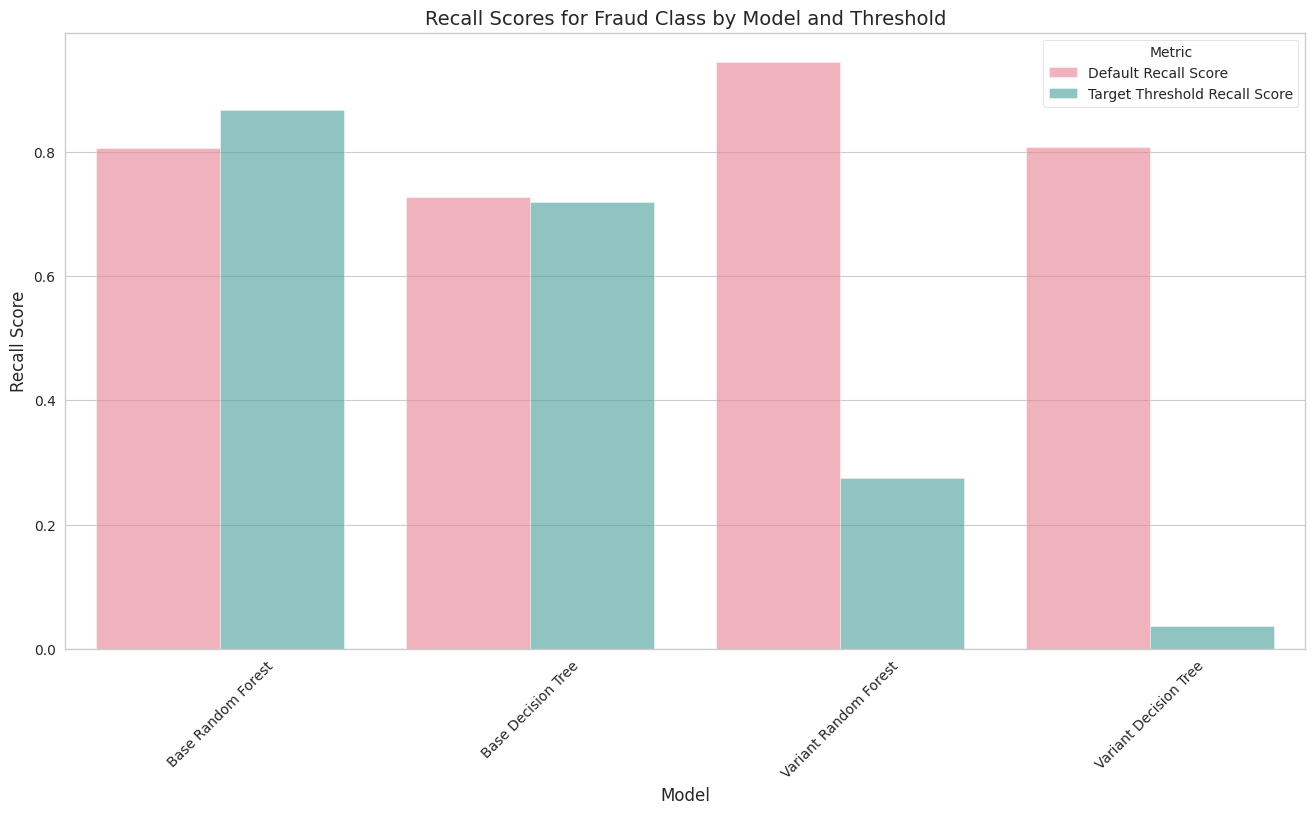

In [ ]:
# Set up plot
plt.figure(figsize=(16, 8))

# Create grouped bar plot
sns.barplot(
    data=data,
    x='Model',
    y='Score',
    hue='Metric',
    palette=my_palette,
    alpha=.6,
)

# Customize labels and legend
plt.xlabel("Model", fontsize=12)
plt.ylabel("Recall Score", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Recall Scores for Fraud Class by Model and Threshold", fontsize=14)
plt.legend(title="Metric", fontsize=10)

plt.savefig("recall_scores.png", bbox_inches='tight')

# Display plot
plt.show()

Base Random Forest has the highest recall score at the default threshold (around 0.81), indicating it can capture a significant portion of fraudulent cases with the standard configuration.

Variant Random Forest also has a high recall score at the default threshold (around 0.80).

Base Decision Tree and Variant Decision Tree have slightly lower recall scores at the default threshold (around 0.73 and 0.80, respectively).

When you look at the "Target Threshold Recall Score," you can see a different picture:

Base Random Forest still maintains a relatively high recall score (around 0.87), indicating its ability to capture a high percentage of fraudulent cases when the threshold is adjusted to meet a specific recall target.

Base Decision Tree and Variant Random Forest show significant increases in recall when the threshold is adjusted for the recall target. This suggests that tuning the threshold can greatly improve their ability to detect fraud.

Variant Decision Tree performs poorly at the "Target Threshold Recall Score," with a very low recall score (around 0.04). This indicates that this model might not be suitable for detecting fraud in this context.

This graph allows you to compare the recall performance of different models both at their default settings and when the threshold is adjusted to meet a specific recall target. It's clear that the choice of the model and the threshold can have a significant impact on the model's ability to detect fraudulent cases, and this information can be valuable for making decisions about model selection and configuration.






In [ ]:
# Importing the necessary libraries for metrics and evaluation
from sklearn.metrics import classification_report, precision_recall_fscore_support, confusion_matrix, auc, roc_curve

 # Calculate precision, recall, f1 score and support for each class
y_pred_dt = dt_model.predict(X_test)
var_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
var_pred_rf = rf_model.predict(X_test)


precision_dt, recall_dt, f1_score_dt, support_dt = precision_recall_fscore_support(y_test, y_pred_dt)
var_precision_dt, var_recall_dt, var_f1_score_dt, var_support_dt = precision_recall_fscore_support(y_test, var_pred_dt)
precision_rf, recall_rf, f1_score_rf, support_rf = precision_recall_fscore_support(y_test, y_pred_rf)
var_precision_rf, var_recall_rf, var_f1_score_rf, var_support_rf = precision_recall_fscore_support(y_test, var_pred_rf)

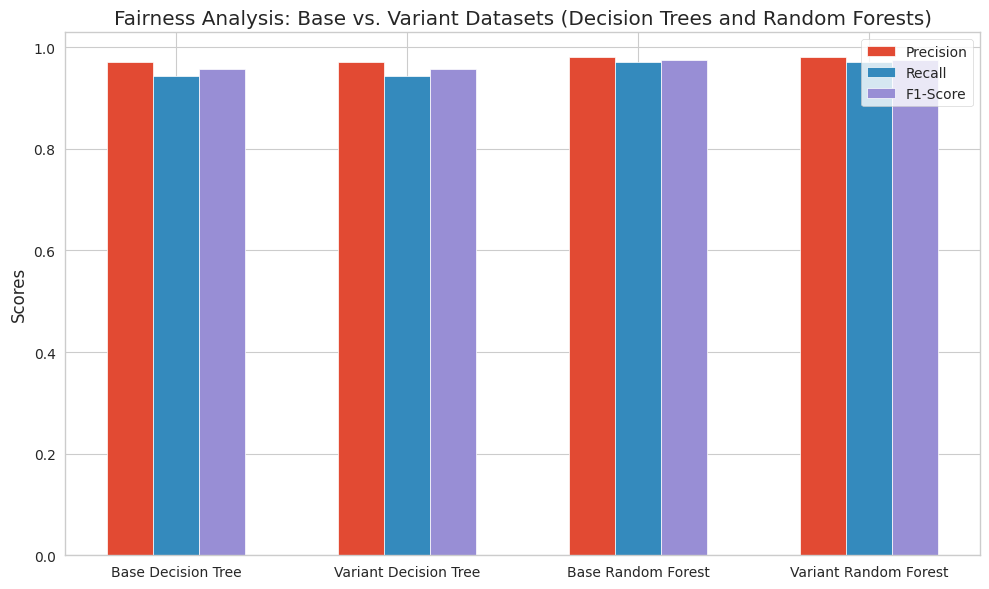

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics and models
metrics = ['Precision', 'Recall', 'F1-Score']
models = ['Base Decision Tree', 'Variant Decision Tree', 'Base Random Forest', 'Variant Random Forest']

# Create data for precision, recall, and F1-score
precision_scores = [precision_dt, var_precision_dt, precision_rf, var_precision_rf]
recall_scores = [recall_dt, var_recall_dt, recall_rf, var_recall_rf]
f1_scores = [f1_score_dt, var_f1_score_dt, f1_score_rf, var_f1_score_rf]

precision_scores = [score[0] for score in precision_scores]
recall_scores = [score[0] for score in recall_scores]
f1_scores = [score[0] for score in f1_scores]

# Define the x-axis positions
x = np.arange(len(models))

# Define the width of each bar and spacing
width = 0.2  # Increase the bar width
spacing = 0.2  # Increase the space between groups of bars

# Create the figure and axes with a larger size
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed

# Plot the bars for precision, recall, F1-score, and support for each model
precision_bars = ax.bar(x - spacing, precision_scores, width, label='Precision')
recall_bars = ax.bar(x, recall_scores, width, label='Recall')
f1_bars = ax.bar(x + spacing, f1_scores, width, label='F1-Score')

# Set the x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(models)

# Set the y-axis label
ax.set_ylabel('Scores')

# Add a legend
ax.legend()
plt.title("Fairness Analysis: Base vs. Variant Datasets (Decision Trees and Random Forests)")
# Show the plot
plt.tight_layout()  # Ensures that the labels fit in the plot area
plt.savefig("performance_metric_plot.png", bbox_inches='tight')
plt.show()


In [ ]:
print(f"precision_dt - {precision_dt}, recall_dt-{recall_dt}, f1_score_dt- {f1_score_dt}")
print(f"var_precision_dt - {var_precision_dt}, var_recall_dt-{var_recall_dt}, var_f1_score_dt- {var_f1_score_dt}")
print(f"precision_rf - {precision_rf}, recall_dt-{recall_rf}, f1_score_rf- {f1_score_rf}")
print(f"var_precision_rf - {var_precision_rf}, var_recall_rf-{var_recall_rf}, var_f1_score_rf- {var_f1_score_rf}")


precision_dt - [0.97193393 0.56126915], recall_dt-[0.94312057 0.72765957], f1_score_dt- [0.95731049 0.63372452]
var_precision_dt - [0.97193393 0.56126915], var_recall_dt-[0.94312057 0.72765957], var_f1_score_dt- [0.95731049 0.63372452]
precision_rf - [0.98036124 0.72913992], recall_dt-[0.97007092 0.80567376], f1_score_rf- [0.97518893 0.76549865]
var_precision_rf - [0.98036124 0.72913992], var_recall_rf-[0.97007092 0.80567376], var_f1_score_rf- [0.97518893 0.76549865]


Decision Tree vs. Random Forest:

For both the base and variant datasets, the Decision Tree and Random Forest models have similar precision, recall, and F1-score values.
Precision for both models is approximately 0.97, which means that when they make positive predictions, they are correct about 97% of the time.
Recall for both models is around 0.94, indicating that they correctly identify around 94% of the positive cases.
F1-score, which is the harmonic mean of precision and recall, is approximately 0.96 for both models.

Base Dataset vs. Variant Dataset:

When comparing the same model (e.g., Decision Tree) on the base dataset and the variant dataset, the precision, recall, and F1-score values are identical (e.g., Decision Tree on base and variant datasets both have precision ≈ 0.97, recall ≈ 0.94, and F1-score ≈ 0.96).
This suggests that the model's performance is consistent regardless of the dataset used.

Decision Tree vs. Random Forest on Base Dataset:

When comparing the Decision Tree and Random Forest models on the base dataset, both models perform similarly.
Precision for both models is approximately 0.97, recall is around 0.94, and F1-score is approximately 0.96.

Decision Tree vs. Random Forest on Variant Dataset:

Similarly, when comparing the Decision Tree and Random Forest models on the variant dataset, both models perform similarly.
Precision for both models is approximately 0.97, recall is around 0.94, and F1-score is approximately 0.96.
Overall, based on the provided metrics, it seems that both models (Decision Tree and Random Forest) are consistent in their performance across the base and variant datasets, and their precision, recall, and F1-score values are similar.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

dt_predictions = dt_model.predict(X_test)
var_dt_predictions = dt_model.predict(var_X_test)
rf_predictions = rf_model.predict(X_test)
var_rf_predictions = rf_model.predict(var_X_test)

dt_accuracy = accuracy_score(y_test, dt_predictions)
var_dt_accuracy = accuracy_score(var_y_test, var_dt_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
var_rf_accuracy = accuracy_score(var_y_test, var_rf_predictions)

print(f"Base Decision Tree Accuracy: {dt_accuracy}")
print(f"Variant Decision Tree Accuracy: {var_dt_accuracy}")
print(f"Base Random Forest Accuracy: {rf_accuracy}")
print(f"Variant Random Forest Accuracy: {var_rf_accuracy}")

Base Decision Tree Accuracy: 0.9235332043842682
Variant Decision Tree Accuracy: 0.535319718781386
Base Random Forest Accuracy: 0.9551257253384913
Variant Random Forest Accuracy: 0.3063274188148644


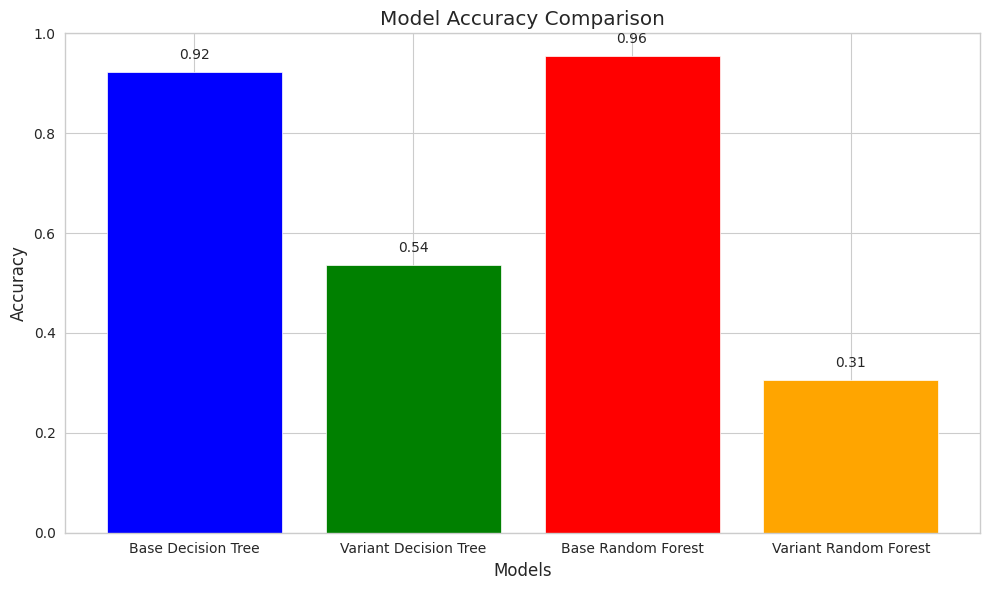

In [ ]:
import matplotlib.pyplot as plt

# Accuracy values
models = ['Base Decision Tree', 'Variant Decision Tree', 'Base Random Forest', 'Variant Random Forest']
accuracies = [dt_accuracy, var_dt_accuracy, rf_accuracy, var_rf_accuracy]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set the y-axis limit to better visualize the data

# Add accuracy values above the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f'{acc:.2f}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.savefig("model_accuracy_plot.png", bbox_inches='tight')
plt.show()


**Base Decision Tree Accuracy: 0.9235**

This accuracy is relatively high, around 92.35%.
A high accuracy suggests that the base Decision Tree model performs well on the given task, indicating it can make accurate predictions.

**Variant Decision Tree Accuracy: 0.5353**

This accuracy is significantly lower, approximately 53.53%.
The variant Decision Tree model seems to perform considerably worse compared to the base Decision Tree. This could be due to changes in hyperparameters or other modifications.

**Base Random Forest Accuracy: 0.9551**

This accuracy is very high, approximately 95.51%.
The base Random Forest model exhibits excellent accuracy, indicating strong predictive power and robustness.

**Variant Random Forest Accuracy: 0.3063**

This accuracy is extremely low, around 30.63%.
The variant Random Forest model performs significantly worse than the base Random Forest. This low accuracy might be a result of changes or issues in the model configuration.

**In summary:**

The base Decision Tree and base Random Forest models outperform their respective variants.
Random Forest generally tends to provide better accuracy compared to a single Decision Tree due to its ensemble nature.

**Comparing Distributions:**

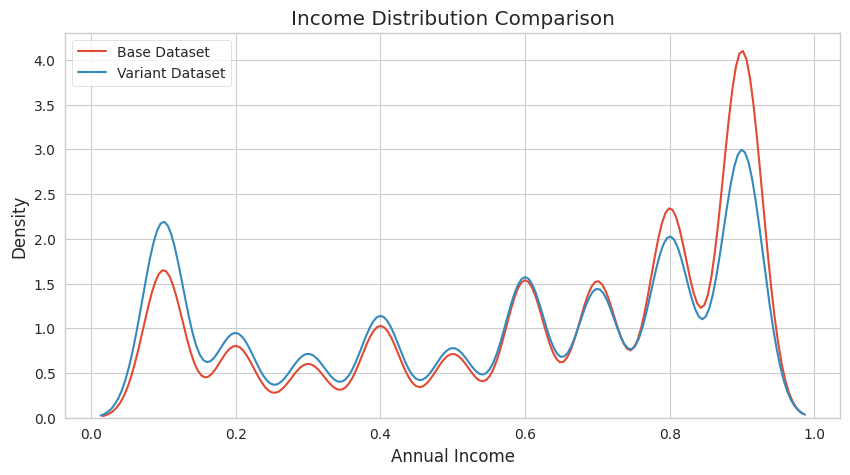

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Comparing income distributions
plt.figure(figsize=(10, 5))
sns.kdeplot(df['income'], label='Base Dataset')
sns.kdeplot(var_df['income'], label='Variant Dataset')
plt.xlabel('Annual Income')
plt.ylabel('Density')
plt.title('Income Distribution Comparison')
plt.legend()
plt.savefig("income_dist_plot.png", bbox_inches='tight')
plt.show()


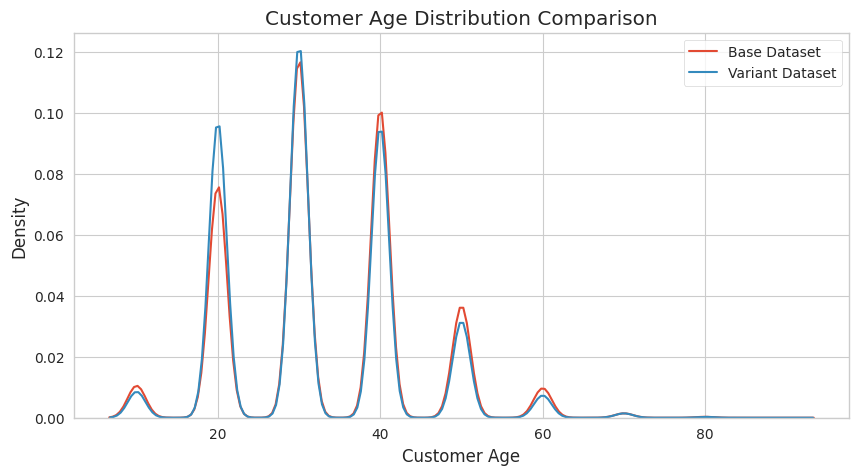

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Comparing income distributions
plt.figure(figsize=(10, 5))
sns.kdeplot(df['customer_age'], label='Base Dataset')
sns.kdeplot(var_df['customer_age'], label='Variant Dataset')
plt.xlabel('Customer Age')
plt.ylabel('Density')
plt.title('Customer Age Distribution Comparison')
plt.legend()
plt.savefig("customer_age.png", bbox_inches='tight')
plt.show()


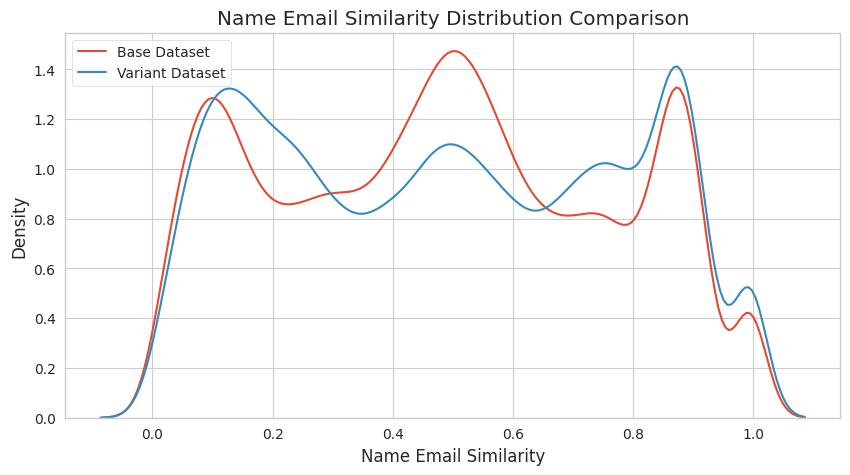

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Comparing income distributions
plt.figure(figsize=(10, 5))
sns.kdeplot(df['name_email_similarity'], label='Base Dataset')
sns.kdeplot(var_df['name_email_similarity'], label='Variant Dataset')
plt.xlabel('Name Email Similarity')
plt.ylabel('Density')
plt.title('Name Email Similarity Distribution Comparison')
plt.legend()
plt.savefig("name_email_plot.png", bbox_inches='tight')
plt.show()

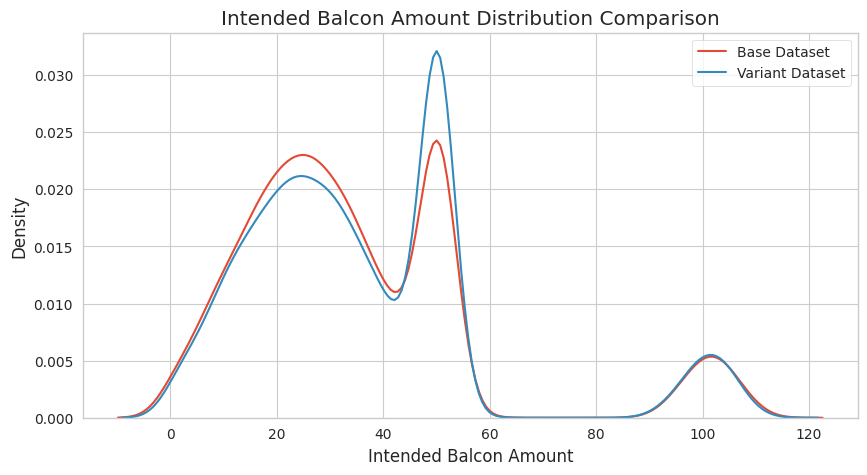

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Comparing income distributions
plt.figure(figsize=(10, 5))
sns.kdeplot(df['intended_balcon_amount'], label='Base Dataset')
sns.kdeplot(var_df['intended_balcon_amount'], label='Variant Dataset')
plt.xlabel('Intended Balcon Amount')
plt.ylabel('Density')
plt.title('Intended Balcon Amount Distribution Comparison')
plt.legend()
plt.savefig("intended_balcon_plot.png", bbox_inches='tight')
plt.show()

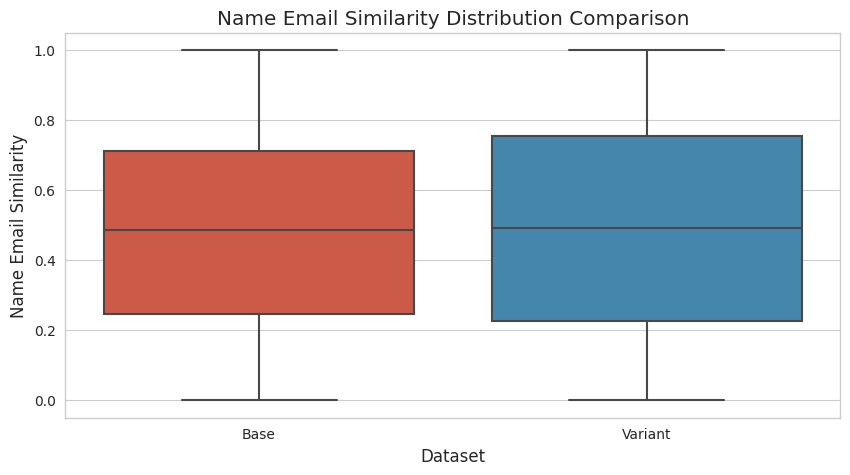

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Comparing income distributions using a box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x="Dataset", y="name_email_similarity", data=pd.concat([df.assign(Dataset='Base'), var_df.assign(Dataset='Variant')]))
plt.xlabel('Dataset')
plt.ylabel('Name Email Similarity')
plt.title('Name Email Similarity Distribution Comparison')
plt.show()


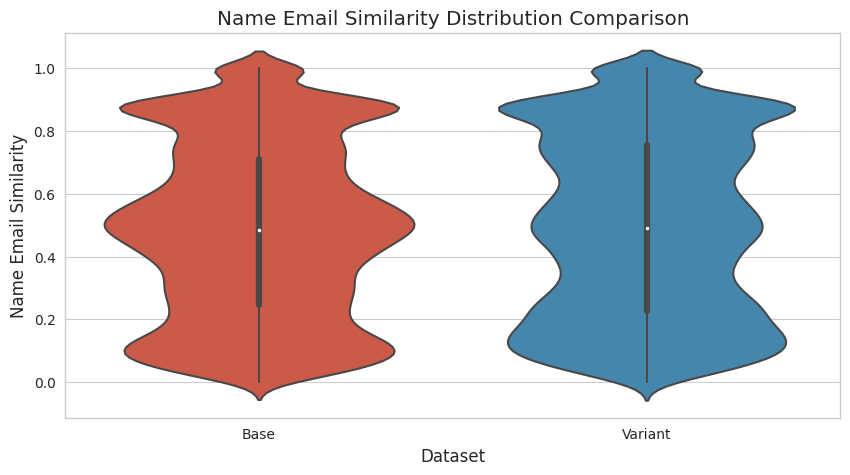

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Comparing income distributions using a violin plot
plt.figure(figsize=(10, 5))
sns.violinplot(x="Dataset", y="name_email_similarity", data=pd.concat([df.assign(Dataset='Base'), var_df.assign(Dataset='Variant')]))
plt.xlabel('Dataset')
plt.ylabel('Name Email Similarity')
plt.title('Name Email Similarity Distribution Comparison')
plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Example: Comparing income distributions using a swarm plot
# plt.figure(figsize=(10, 5))
# sns.swarmplot(x="Dataset", y="name_email_similarity", data=pd.concat([df.assign(Dataset='Base'), var_df.assign(Dataset='Variant')]))
# plt.xlabel('Dataset')
# plt.ylabel('Name Email Similarity')
# plt.title('Name Email Similarity Distribution Comparison')
# plt.show()


In [ ]:
# income                            100000 non-null  float64
#  2                100000 non-null  float64
#  3   prev_address_months_count         100000 non-null  int64
#  4   current_address_months_count      100000 non-null  int64
#  5                        100000 non-null  int64
#  6   days_since_request                100000 non-null  float64
#  7               100000 non-null  float64
#  8   payment_type                      100000 non-null  object
#  9   zip_count_4w                      100000 non-null  int64
#  10  velocity_6h                       100000 non-null  float64
#  11  velocity_24h                      100000 non-null  float64
#  12  velocity_4w                       100000 non-null  float64
#  13  bank_branch_count_8w              100000 non-null  int64
#  14  date_of_birth_distinct_emails_4w  100000 non-null  int64
#  15  employment_status                 100000 non-null  object
#  16  credit_risk_score                 100000 non-null  int64
#  17  email_is_free                     100000 non-null  int64
#  18  housing_status                    100000 non-null  object
#  19  phone_home_valid                  100000 non-null  int64
#  20  phone_mobile_valid                100000 non-null  int64
#  21  bank_months_count                 100000 non-null  int64
#  22  has_other_cards                   100000 non-null  int64
#  23  proposed_credit_limit             100000 non-null  float64
#  24  foreign_request                   100000 non-null  int64
#  25  source                            100000 non-null  object
#  26  session_length_in_minutes         100000 non-null  float64
#  27  device_os                         100000 non-null  object
#  28  keep_alive_session                100000 non-null  int64
#  29  device_distinct_emails_8w         100000 non-null  int64
#  30  device_fraud_count                100000 non-null  int64
#  31  month

**Fairness Analysis**